# Olfactory Candidate Genes

In [1]:
# Import packages.
import allel
import numcodecs
import zarr
from functools import reduce
import gzip
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
import re
import math
# Intialize the matplolib styling.
plt.rcParams.update({
    'figure.constrained_layout.use': True,
    'figure.facecolor': 'white',
    'font.family': 'serif',
})

## PBS Results

In [2]:
# Load the PBS results.
san_pbs_df = pd.read_csv(
    './tables/san_olfactory_orthologs_pbs.txt', sep='\t',
)
yak_pbs_df = pd.read_csv(
    './tables/yak_olfactory_orthologs_pbs.txt', sep='\t',
)

In [3]:
# Define the configuration list.
config_list = [
    'san:yak:tei', 'san:yak-symp:yak-allo',
    'san:yak-symp:tei', 'san:yak-allo:tei',
    'yak-symp:yak-allo:tei',
]
# Define a list of ortho columns.
ortho_cols = ['gene_id', 'chr', 'start', 'end', 'gene']
# Define an olfactory gene famaly list.
olfactory_gene_list = ['obp', 'or', 'gr', 'ir']
# Define a significance list.
sig_list = ['ortho', 'bs']

In [4]:
# Intialize an outlier dictionary.
san_outlier_dicc = {}
# For every configuration.
for config in config_list:
    # Intialize the subdictionary.
    san_outlier_dicc[config] = {}
    # For every significance type...
    for sig in sig_list:
        # Intialize the subdictionary.
        san_outlier_dicc[config][sig] = {}
        # Subset the data frame.
        subset_df = san_pbs_df[ortho_cols+[config+'_pbs', config+f'_pval_{sig}']].dropna()
        # Determine the significance threshold.
        threshold = 0.05
        # Extract the outlier dataframe.
        outlier_df = subset_df[subset_df[config+f'_pval_{sig}'].values < threshold]
        # Fill the dictionary.
        san_outlier_dicc[config][sig]['df'] = outlier_df
        san_outlier_dicc[config][sig]['gene'] = outlier_df['gene'].values

In [5]:
# Intialize an outlier dictionary.
yak_outlier_dicc = {}
# For every configuration.
for config in config_list:
    # Intialize the subdictionary.
    yak_outlier_dicc[config] = {}
    # For every significance type...
    for sig in sig_list:
        # Intialize the subdictionary.
        yak_outlier_dicc[config][sig] = {}
        # Subset the data frame.
        subset_df = yak_pbs_df[ortho_cols+[config+'_pbs', config+f'_pval_{sig}']].dropna()
        # Determine the significance threshold.
        threshold = 0.05
        # Extract the outlier dataframe.
        outlier_df = subset_df[subset_df[config+f'_pval_{sig}'].values < threshold]
        # Fill the dictionary.
        yak_outlier_dicc[config][sig]['df'] = outlier_df
        yak_outlier_dicc[config][sig]['gene'] = outlier_df['gene'].values

In [6]:
# Intialize a shared outlier dictionary.
shared_outlier_dicc = {}
# For every configuration.
for config in config_list:
    # Find the shared outliers.
    outliers = reduce(
        np.intersect1d, 
        (san_outlier_dicc[config]['ortho']['gene'], yak_outlier_dicc[config]['ortho']['gene'],
        san_outlier_dicc[config]['bs']['gene'], yak_outlier_dicc[config]['bs']['gene']),
    )
    # Subset the dtaframes.
    san_df = san_pbs_df[np.in1d(san_pbs_df['gene'].values, outliers)]
    yak_df = yak_pbs_df[np.in1d(yak_pbs_df['gene'].values, outliers)]
    # Intialize the sub dictionary.
    shared_outlier_dicc[config] = {}
    # Fill the dictionary.
    shared_outlier_dicc[config]['san'] = san_df[
        ortho_cols+[config+'_pbs', config+'_pval_ortho', config+'_pval_bs']
    ]
    shared_outlier_dicc[config]['yak'] = yak_df[
        ortho_cols+[config+'_pbs', config+'_pval_ortho', config+'_pval_bs']
    ]

In [7]:
# For every configuration.
for config in config_list:
    # Display the results.
    print(config+' - san')
    display(shared_outlier_dicc[config]['san'])
    print(config+' - yak')
    display(shared_outlier_dicc[config]['yak'])

san:yak:tei - san


gene_id chr     start       end   gene  san:yak:tei_pbs  \
18  LOC120453978  2L   4191982   4196982  Or24a         0.880467   
20  LOC120458133  2L  16668286  16673286  Or43b         0.871882   

    san:yak:tei_pval_ortho  san:yak:tei_pval_bs  
18                0.007569             0.005485  
20                0.012405             0.014146

san:yak:tei - yak


gene_id chr     start       end   gene  san:yak:tei_pbs  \
21  LOC6526797  2L   4269809   4274810  Or24a         0.880467   
23  LOC6528495  2L  16609727  16614728  Or43b         0.871882   

    san:yak:tei_pval_ortho  san:yak:tei_pval_bs  
21                0.011679             0.009257  
23                0.023983             0.024279

san:yak-symp:yak-allo - san


gene_id chr    start      end   gene  san:yak-symp:yak-allo_pbs  \
85  LOC120452183  3R  5564917  5569918  Ir93a                   0.581037   

    san:yak-symp:yak-allo_pval_ortho  san:yak-symp:yak-allo_pval_bs  
85                          0.012893                       0.018126

san:yak-symp:yak-allo - yak


gene_id chr    start      end   gene  san:yak-symp:yak-allo_pbs  \
86  LOC6535859  3R  7353569  7358570  Ir93a                    0.55872   

    san:yak-symp:yak-allo_pval_ortho  san:yak-symp:yak-allo_pval_bs  
86                          0.014159                       0.014989

san:yak-symp:tei - san


gene_id chr     start       end   gene  san:yak-symp:tei_pbs  \
18  LOC120453978  2L   4191982   4196982  Or24a              0.880467   
20  LOC120458133  2L  16668286  16673286  Or43b              0.883562   

    san:yak-symp:tei_pval_ortho  san:yak-symp:tei_pval_bs  
18                     0.005838                  0.002728  
20                     0.002162                  0.002728

san:yak-symp:tei - yak


gene_id chr     start       end   gene  san:yak-symp:tei_pbs  \
21  LOC6526797  2L   4269809   4274810  Or24a              0.880467   
23  LOC6528495  2L  16609727  16614728  Or43b              0.883562   

    san:yak-symp:tei_pval_ortho  san:yak-symp:tei_pval_bs  
21                     0.007323                  0.005475  
23                     0.004308                  0.005442

san:yak-allo:tei - san


gene_id chr     start       end   gene  san:yak-allo:tei_pbs  \
18  LOC120453978  2L   4191982   4196982  Or24a              0.880467   
20  LOC120458133  2L  16668286  16673286  Or43b              0.862135   

    san:yak-allo:tei_pval_ortho  san:yak-allo:tei_pval_bs  
18                     0.007890                  0.001930  
20                     0.021815                  0.024174

san:yak-allo:tei - yak


gene_id chr     start       end   gene  san:yak-allo:tei_pbs  \
21  LOC6526797  2L   4269809   4274810  Or24a              0.880467   
23  LOC6528495  2L  16609727  16614728  Or43b              0.862135   

    san:yak-allo:tei_pval_ortho  san:yak-allo:tei_pval_bs  
21                     0.009261                  0.002374  
23                     0.032878                  0.035927

yak-symp:yak-allo:tei - san


gene_id chr     start       end   gene  yak-symp:yak-allo:tei_pbs  \
33  LOC120452249  3R   5206885   5211886  Or92a                   0.081865   
45  LOC120450059  2L  16159919  16164919  Gr43a                   0.078174   
55  LOC120449167  3L  19876992  19881993  Gr77a                   0.089560   

    yak-symp:yak-allo:tei_pval_ortho  yak-symp:yak-allo:tei_pval_bs  
33                          0.034842                       0.043778  
45                          0.036899                       0.045487  
55                          0.030985                       0.038216

yak-symp:yak-allo:tei - yak


gene_id chr     start       end   gene  yak-symp:yak-allo:tei_pbs  \
34   LOC6539949  3R   6993394   6998395  Or92a                   0.115150   
47   LOC6528411  2L  16097345  16102345  Gr43a                   0.078174   
59  LOC26535958  3L  19860858  19865859  Gr77a                   0.139126   

    yak-symp:yak-allo:tei_pval_ortho  yak-symp:yak-allo:tei_pval_bs  
34                          0.020657                       0.019100  
47                          0.042084                       0.042002  
59                          0.013472                       0.013897

In [8]:
# Define a list of candidate genes.
san_cans = np.array(['Or24a', 'Or43b', 'Ir93a'])
yak_cans = np.array(['Or92a', 'Gr43a', 'Gr77a'])

## PAML Results

In [9]:
# Load the PAML results.
paml_df = pd.read_csv(
    './tables/annotated_paml_results_mel_san_yak_tei.txt', sep='\t',
)

In [10]:
# Subset the results to only include the candidate genes.
san_cans_paml_df = paml_df[
    np.in1d(paml_df['gene_id'].values, san_cans)
]
yak_cans_paml_df = paml_df[
    np.in1d(paml_df['gene_id'].values, yak_cans)
]

In [11]:
# Show the san results.
san_cans_paml_df

orthogroup gene_id gene_type        san_id  san_conting   san_start  \
7273  OG0011537   Ir93a        Ir  LOC120452183  NC_053019.2   5565567.0   
8009  OG0003269   Or24a        Or  LOC120453978  NC_053016.2   4193748.0   
8018  OG0005168   Or43b        Or  LOC120458133  NC_053016.2  16669898.0   

         san_end      yak_id  yak_conting   yak_start  ...  \
7273   5569268.0  LOC6535859  NC_052530.2   7354072.0  ...   
8009   4195216.0  LOC6526797  NC_052527.2   4271595.0  ...   
8018  16671674.0  LOC6528495  NC_052527.2  16611415.0  ...   

                                              gene_tree    P_val_M0M3  \
7273  (Dmel:0.1134703008,(Dsan:0.0054452180,Dyak:0.0...  2.800410e-03   
8009  (Dmel:0.1310881874,(Dsan:0.0055154290,Dyak:0.0...  6.130000e-22   
8018  (Dmel:0.0625054287,(Dsan:0.0100965166,Dyak:0.0...  6.166167e-04   

      P_val_M1M2  P_val_M7M8  P_val_Dmel    P_val_Dsan  P_val_Dtei  \
7273    0.520885    0.409282    1.000000  1.874152e-02         1.0   
8009    0.000033    0.000020    0.001303  1.380000e-08         1.0   
8018    1.000000    1.000000    0.205773  5.698130e-02         1.0   

      P_val_DsanDyak  P_val_Dyak    ps_scenario  
7273    1.874152e-02    0.938929  PS_spill_Dsan  
8009    1.380000e-08    0.998872  PS_spill_Dsan  
8018    5.698130e-02    0.331411          No_PS  

[3 rows x 75 columns]

In [12]:
# Show the sympatric yak results.
yak_cans_paml_df

orthogroup gene_id gene_type        san_id  san_conting   san_start  \
6949  OG0005094   Gr43a        Gr  LOC120450059  NC_053016.2  16161210.0   
6969  OG0009549   Gr77a        Gr  LOC120449167  NC_053018.2  19878544.0   
8044  OG0011489   Or92a        Or  LOC120452249  NC_053019.2   5208645.0   

         san_end       yak_id  yak_conting   yak_start  ...  \
6949  16163628.0   LOC6528411  NC_052527.2  16098523.0  ...   
6969  19880441.0  LOC26535958  NC_052529.2  19860878.0  ...   
8044   5210126.0   LOC6539949  NC_052530.2   6994695.0  ...   

                                              gene_tree  P_val_M0M3  \
6949  (Dmel:0.0356537913,(Dsan:0.0037948277,Dyak:0.0...    0.026138   
6969  (Dmel:0.0287549442,(Dsan:0.0052143776,Dyak:0.0...    0.000006   
8044  (Dmel:0.0642567219,(Dsan:0.0079923465,Dyak:0.0...    0.077034   

      P_val_M1M2  P_val_M7M8  P_val_Dmel  P_val_Dsan  P_val_Dtei  \
6949    0.976851    0.889926    0.058902    0.002288    0.383891   
6969    0.251263    0.217062    0.032640    1.000000    0.032638   
8044    1.000000    1.000000    1.000000    0.020200    1.000000   

      P_val_DsanDyak  P_val_Dyak    ps_scenario  
6949        0.003465    0.383899  PS_spill_Dsan  
6969        0.023035    0.523561   PS_ancestral  
8044        0.020200    0.828696  PS_spill_Dsan  

[3 rows x 75 columns]

## Population Structure

In [13]:
# Define a function to load genotyope and positions arrays.
def load_callset_pos(prefix, chrom):
    # Intialize the file path.
    path = f'../zarrs/{prefix}/chr{chrom}.zarr'
    # Load the vcf file.
    callset = zarr.open_group(path, mode='r')
    # Extract the genotypes.
    geno = callset[f'{chrom}/calldata/GT']
    # Load the positions.
    pos = allel.SortedIndex(callset[f'{chrom}/variants/POS'])
    return geno, pos

In [14]:
# Define a function to calculate alternative allele frequencies.
def calc_alt_freqs(gt):
    # If there are no altenative alleles...
    if (gt.count_alleles().shape[1] == 1):
        # Calculate alternative allele frequencies.
        alt_freqs = gt.count_alleles().to_frequencies()[:, 0] - 1
    # Else...
    else:
        # Calculate alternative allele frequencies.
        alt_freqs = gt.count_alleles().to_frequencies()[:, 1]
    return alt_freqs

In [15]:
# Intialize candidate gene dictionaries.
cans_map_san_dicc = {
    'Or24a': ['2L', 4191982, 4196982],
    'Or43b': ['2L', 16668286, 16673286],
    'Ir93a': ['3R', 5564917, 5569918],
    'Or92a': ['3R', 5206885, 5211886],
    'Gr43a': ['2L', 16159919, 16164919],
    'Gr77a': ['3L', 19876992, 19881993],
}
cans_map_yak_dicc = {
    'Or24a': ['2L', 4269809, 4274810],
    'Or43b': ['2L', 16609727, 16614728],
    'Ir93a': ['3R', 7353569, 7358570],
    'Or92a': ['3R', 6993394, 6998395],
    'Gr43a': ['2L', 16097345, 16102345],
    'Gr77a': ['3L', 19860858, 19865859],
}

In [16]:
def plot_can_genes(gene, spc, can_dicc):
    # Read in meta data has a pandas dataframe.
    meta_df = pd.read_csv(
        './matute_meta_data.txt',
        sep='\t',
        names=['strain', 'population'],
    )
    # Intialize dictionaries.
    idx_dicc = {}
    samp_dicc = {}
    # For all populations.
    for pop in ['san', 'yak_symp', 'yak_allo', 'tei']:
        # Fill the dictionaries.
        idx_dicc[pop] = meta_df[meta_df['population'] == pop].index.values
        samp_dicc[pop] = meta_df[meta_df['population'] == pop]['strain'].values
    # Fill the dictionary for the last population.
    idx_dicc['yak'] = np.concatenate((idx_dicc['yak_allo'], idx_dicc['yak_symp']))
    samp_dicc['yak'] = np.concatenate((samp_dicc['yak_allo'], samp_dicc['yak_symp']))
    # Define a population list.
    pop_list = ['tei', 'yak', 'yak_allo', 'yak_symp', 'san']
    # Concatenate the indcies and sample ids.
    all_idx = np.concatenate((
        idx_dicc['tei'],
        idx_dicc['yak_allo'],
        idx_dicc['yak_symp'],
        idx_dicc['san'],
    ))
    all_samp = np.concatenate((
        samp_dicc['tei'],
        samp_dicc['yak_allo'],
        samp_dicc['yak_symp'],
        samp_dicc['san'],
    ))
    # Load the genotypes and positions.
    callset_chr, pos_chr = load_callset_pos(
        spc, can_dicc[gene][0],
    )
    # Extract the gene location.
    gene_loc = pos_chr.locate_range(
        can_dicc[gene][1],
        can_dicc[gene][2],
    )
    # Extract the genotype matrix.
    gene_gt = allel.GenotypeArray(callset_chr[gene_loc])
    # Determine the indicies where we have varibale sites.
    var_mask = gene_gt.count_alleles().is_variant()
    # Subset the genotype matrix.
    var_gt = gene_gt.compress(var_mask, axis=0)
    # Intialize a matrix for plotting.
    plot_mat = np.empty((len(pop_list), var_gt.shape[0]))
    # For every population.
    for i in range(len(pop_list)):
        # Extract the population.
        pop = pop_list[i]
        # Fill the matrix.
        plot_mat[i, :] = calc_alt_freqs(var_gt.take(idx_dicc[pop], axis=1))
    # Intialize matricies for plotting.
    tei_plot_mat = var_gt.take(idx_dicc['tei'], axis=1).to_n_alt(fill=np.nan, dtype=np.float64)
    yak_allo_plot_mat = var_gt.take(idx_dicc['yak_allo'], axis=1).to_n_alt(fill=np.nan, dtype=np.float64)
    yak_symp_plot_mat = var_gt.take(idx_dicc['yak_symp'], axis=1).to_n_alt(fill=np.nan, dtype=np.float64)
    san_plot_mat = var_gt.take(idx_dicc['san'], axis=1).to_n_alt(fill=np.nan, dtype=np.float64)
    # Intialize the figure.
    fig = plt.figure(
        figsize=(10, 4), dpi=300,
    )
    # Intialize the axes.
    ax = fig.add_subplot(111)
    # Plot the weird haplotypes.
    im = ax.imshow(plot_mat, aspect='auto')
    # Label the rows.
    ax.set_yticks(
        np.arange(len(pop_list)),
        labels=pop_list,
    )
    # Remove the ticks.
    ax.tick_params(bottom=False, labelbottom=False)
    ax.tick_params(which='minor', left=False, bottom=False, labelbottom=False)
    # Seperate each box.
    ax.set_xticks(np.arange(0, var_gt.shape[0], 1))
    ax.set_yticks(np.arange(0, len(pop_list), 1))
    ax.set_xticks(np.arange(-0.5, var_gt.shape[0], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(pop_list), 1), minor=True)
    ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
    # Despine the axes.
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Intialize the positions for the colobar.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    # Plot the color bar.
    cbar = fig.colorbar(
        im, cax=cax, ticks=[0, 0.5, 1],
    )
    # Annotate the colobar.
    cbar.set_label('Alternative Allele Frequency')
    cbar.ax.set_yticklabels(['0', '0.5', '1'])
    # Label the plot.
    ax.set_title(f'{gene} (mapped to {spc})')
    plt.savefig(
        f'./figures/{gene}_pop_mat_map2{spc}.png', format='png',
        facecolor='white', bbox_inches='tight', dpi=300,
    )
    # Show the plot.
    plt.show()
    # Intialize the figure and axes.
    fig, axes = plt.subplots(
        4, 1, figsize=(15, 9), dpi=300,
        sharex=True, sharey=False,
        gridspec_kw={'height_ratios':[
            tei_plot_mat.shape[1],
            yak_allo_plot_mat.shape[1],
            yak_symp_plot_mat.shape[1],
            san_plot_mat.shape[1],
        ]}
    )
    # Intialize color map.
    cmap = matplotlib.cm.get_cmap('viridis', 3)
    # Intialize the bounds for the color map.
    bounds = np.linspace(0, 2, 4)
    # Intialzie the cmap and bounds normalization.
    norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
    # Plot the tei results.
    im = axes[0].imshow(
        tei_plot_mat.T, cmap=cmap, norm=norm, aspect='auto',
    )
    # Seperate each box.
    axes[0].set_xticks(np.arange(0, tei_plot_mat.shape[0], 1))
    axes[0].set_yticks(np.arange(0, tei_plot_mat.shape[1], 1))
    axes[0].set_xticks(np.arange(-0.5, tei_plot_mat.shape[0], 1), minor=True)
    axes[0].set_yticks(np.arange(-0.5, tei_plot_mat.shape[1], 1), minor=True)
    axes[0].grid(which='minor', color='w', linestyle='-', linewidth=1)
    # Plot the allopatric yak results.
    im = axes[1].imshow(
        yak_allo_plot_mat.T, cmap=cmap, norm=norm, aspect='auto', 
    )
    # Seperate each box.
    axes[1].set_xticks(np.arange(0, yak_allo_plot_mat.shape[0], 1))
    axes[1].set_yticks(np.arange(0, yak_allo_plot_mat.shape[1], 1))
    axes[1].set_xticks(np.arange(-0.5, yak_allo_plot_mat.shape[0], 1), minor=True)
    axes[1].set_yticks(np.arange(-0.5, yak_allo_plot_mat.shape[1], 1), minor=True)
    axes[1].grid(which='minor', color='w', linestyle='-', linewidth=1)
    # Plot the sympatric yak results.
    im = axes[2].imshow(
        yak_symp_plot_mat.T, cmap=cmap, norm=norm, aspect='auto',
    )
    # Seperate each box.
    axes[2].set_xticks(np.arange(0, yak_symp_plot_mat.shape[0], 1))
    axes[2].set_yticks(np.arange(0, yak_symp_plot_mat.shape[1], 1))
    axes[2].set_xticks(np.arange(-0.5, yak_symp_plot_mat.shape[0], 1), minor=True)
    axes[2].set_yticks(np.arange(-0.5, yak_symp_plot_mat.shape[1], 1), minor=True)
    axes[2].grid(which='minor', color='w', linestyle='-', linewidth=1)
    # Plot the san results.
    im = axes[3].imshow(
        san_plot_mat.T, cmap=cmap, norm=norm, aspect='auto',
    )
    # Seperate each box.
    axes[3].set_xticks(np.arange(0, san_plot_mat.shape[0], 1))
    axes[3].set_yticks(np.arange(0, san_plot_mat.shape[1], 1))
    axes[3].set_xticks(np.arange(-0.5, san_plot_mat.shape[0], 1), minor=True)
    axes[3].set_yticks(np.arange(-0.5, san_plot_mat.shape[1], 1), minor=True)
    axes[3].grid(which='minor', color='w', linestyle='-', linewidth=1)
    # Set the y-ticks for each plot.
    axes[0].set_yticks(
        np.arange(samp_dicc['tei'].size),
        labels=samp_dicc['tei'].astype(str), size=8,
    )
    axes[1].set_yticks(
        np.arange(samp_dicc['yak_allo'].size),
        labels=samp_dicc['yak_allo'].astype(str), size=8,
    )
    axes[2].set_yticks(
        np.arange(samp_dicc['yak_symp'].size),
        labels=samp_dicc['yak_symp'].astype(str), size=8,
    )
    axes[3].set_yticks(
        np.arange(samp_dicc['san'].size),
        labels=samp_dicc['san'].astype(str), size=8,
    )
    # Set and label the x-axis ticks.
    axes[3].set_xticks(
        np.arange(san_plot_mat.shape[0]), labels='',
    )
    # Remove the tick marks on the first three subplots.
    for i in range(3):
        axes[i].tick_params(bottom=False, labelbottom=False)
    # Remove the border.
    for i in range(4):
        axes[i].spines['top'].set_visible(False)
        axes[i].spines['bottom'].set_visible(False)
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['left'].set_visible(False)
        axes[i].tick_params(which='minor', left=False, bottom=False, labelbottom=False)
    # Plot the color bar.
    cbar = fig.colorbar(
        im, ax=axes.ravel().tolist(), pad=0.01,
        cmap=cmap, norm=norm, boundaries=bounds,
        ticks=[(bounds[idx] + bounds[idx+1])/2 for idx in range(bounds.size - 1)],
    )
    # Annotate the colobar.
    cbar.set_label('Genotype', size=10)
    cbar.ax.set_yticklabels(['Hom. Ref.', 'Het.', 'Hom. Alt.'])
    # Set the title.
    axes[0].set_title(f'{gene} (mapped to {spc})')
    # Show the plot.
    plt.savefig(
        f'./figures/{gene}_ind_mat_map2{spc}.png', format='png',
        facecolor='white', bbox_inches='tight', dpi=300,
    )
    plt.show()
    return

In [17]:
# Intialize a list of candidate genes.
can_genes = [
    'Or24a', 'Or43b', 'Ir93a',
    'Or92a', 'Gr43a', 'Gr77a',
]

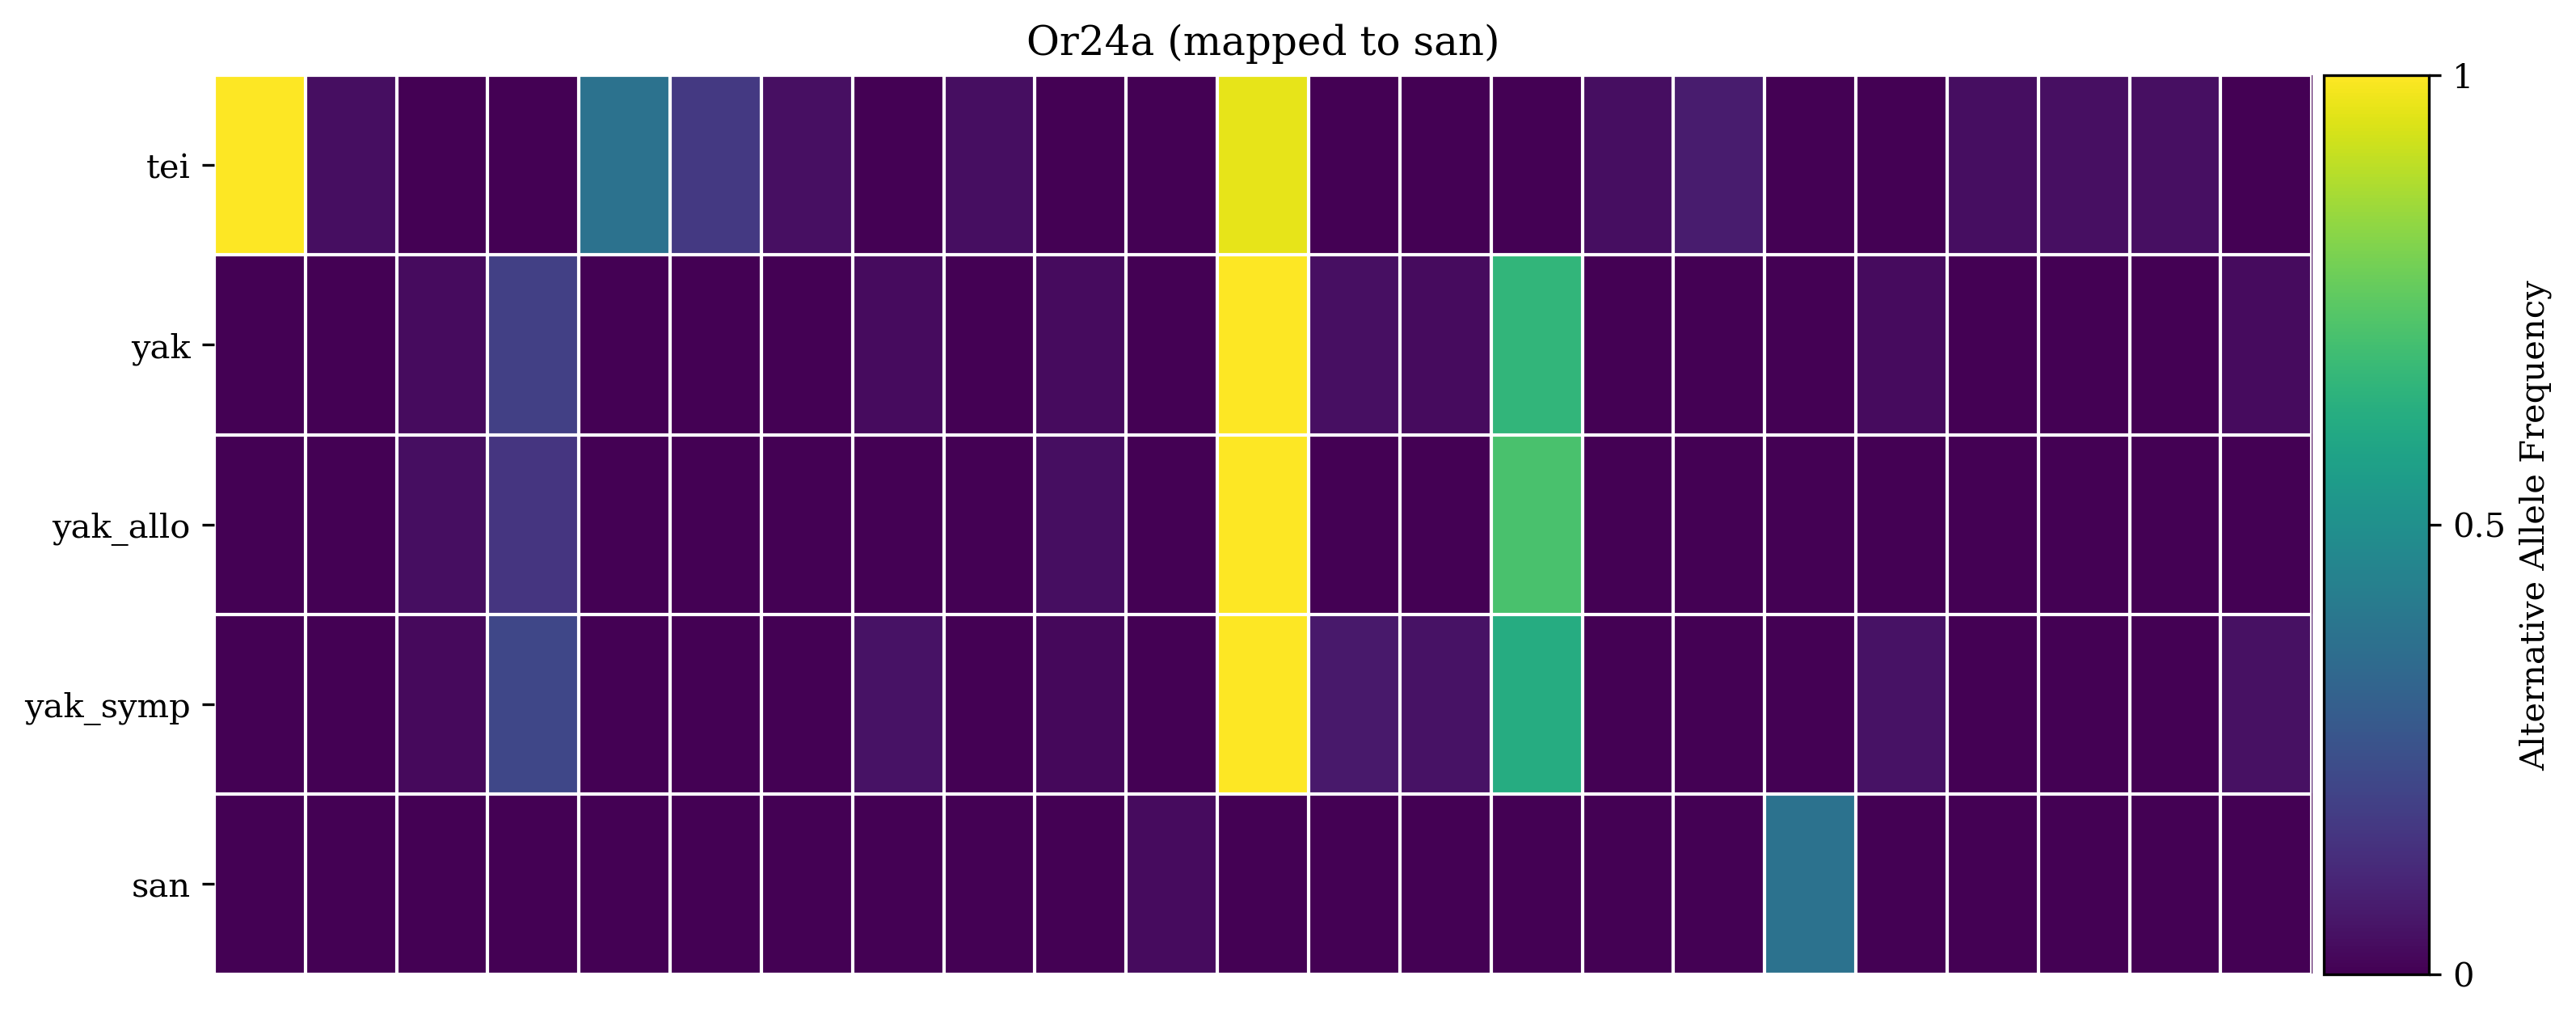

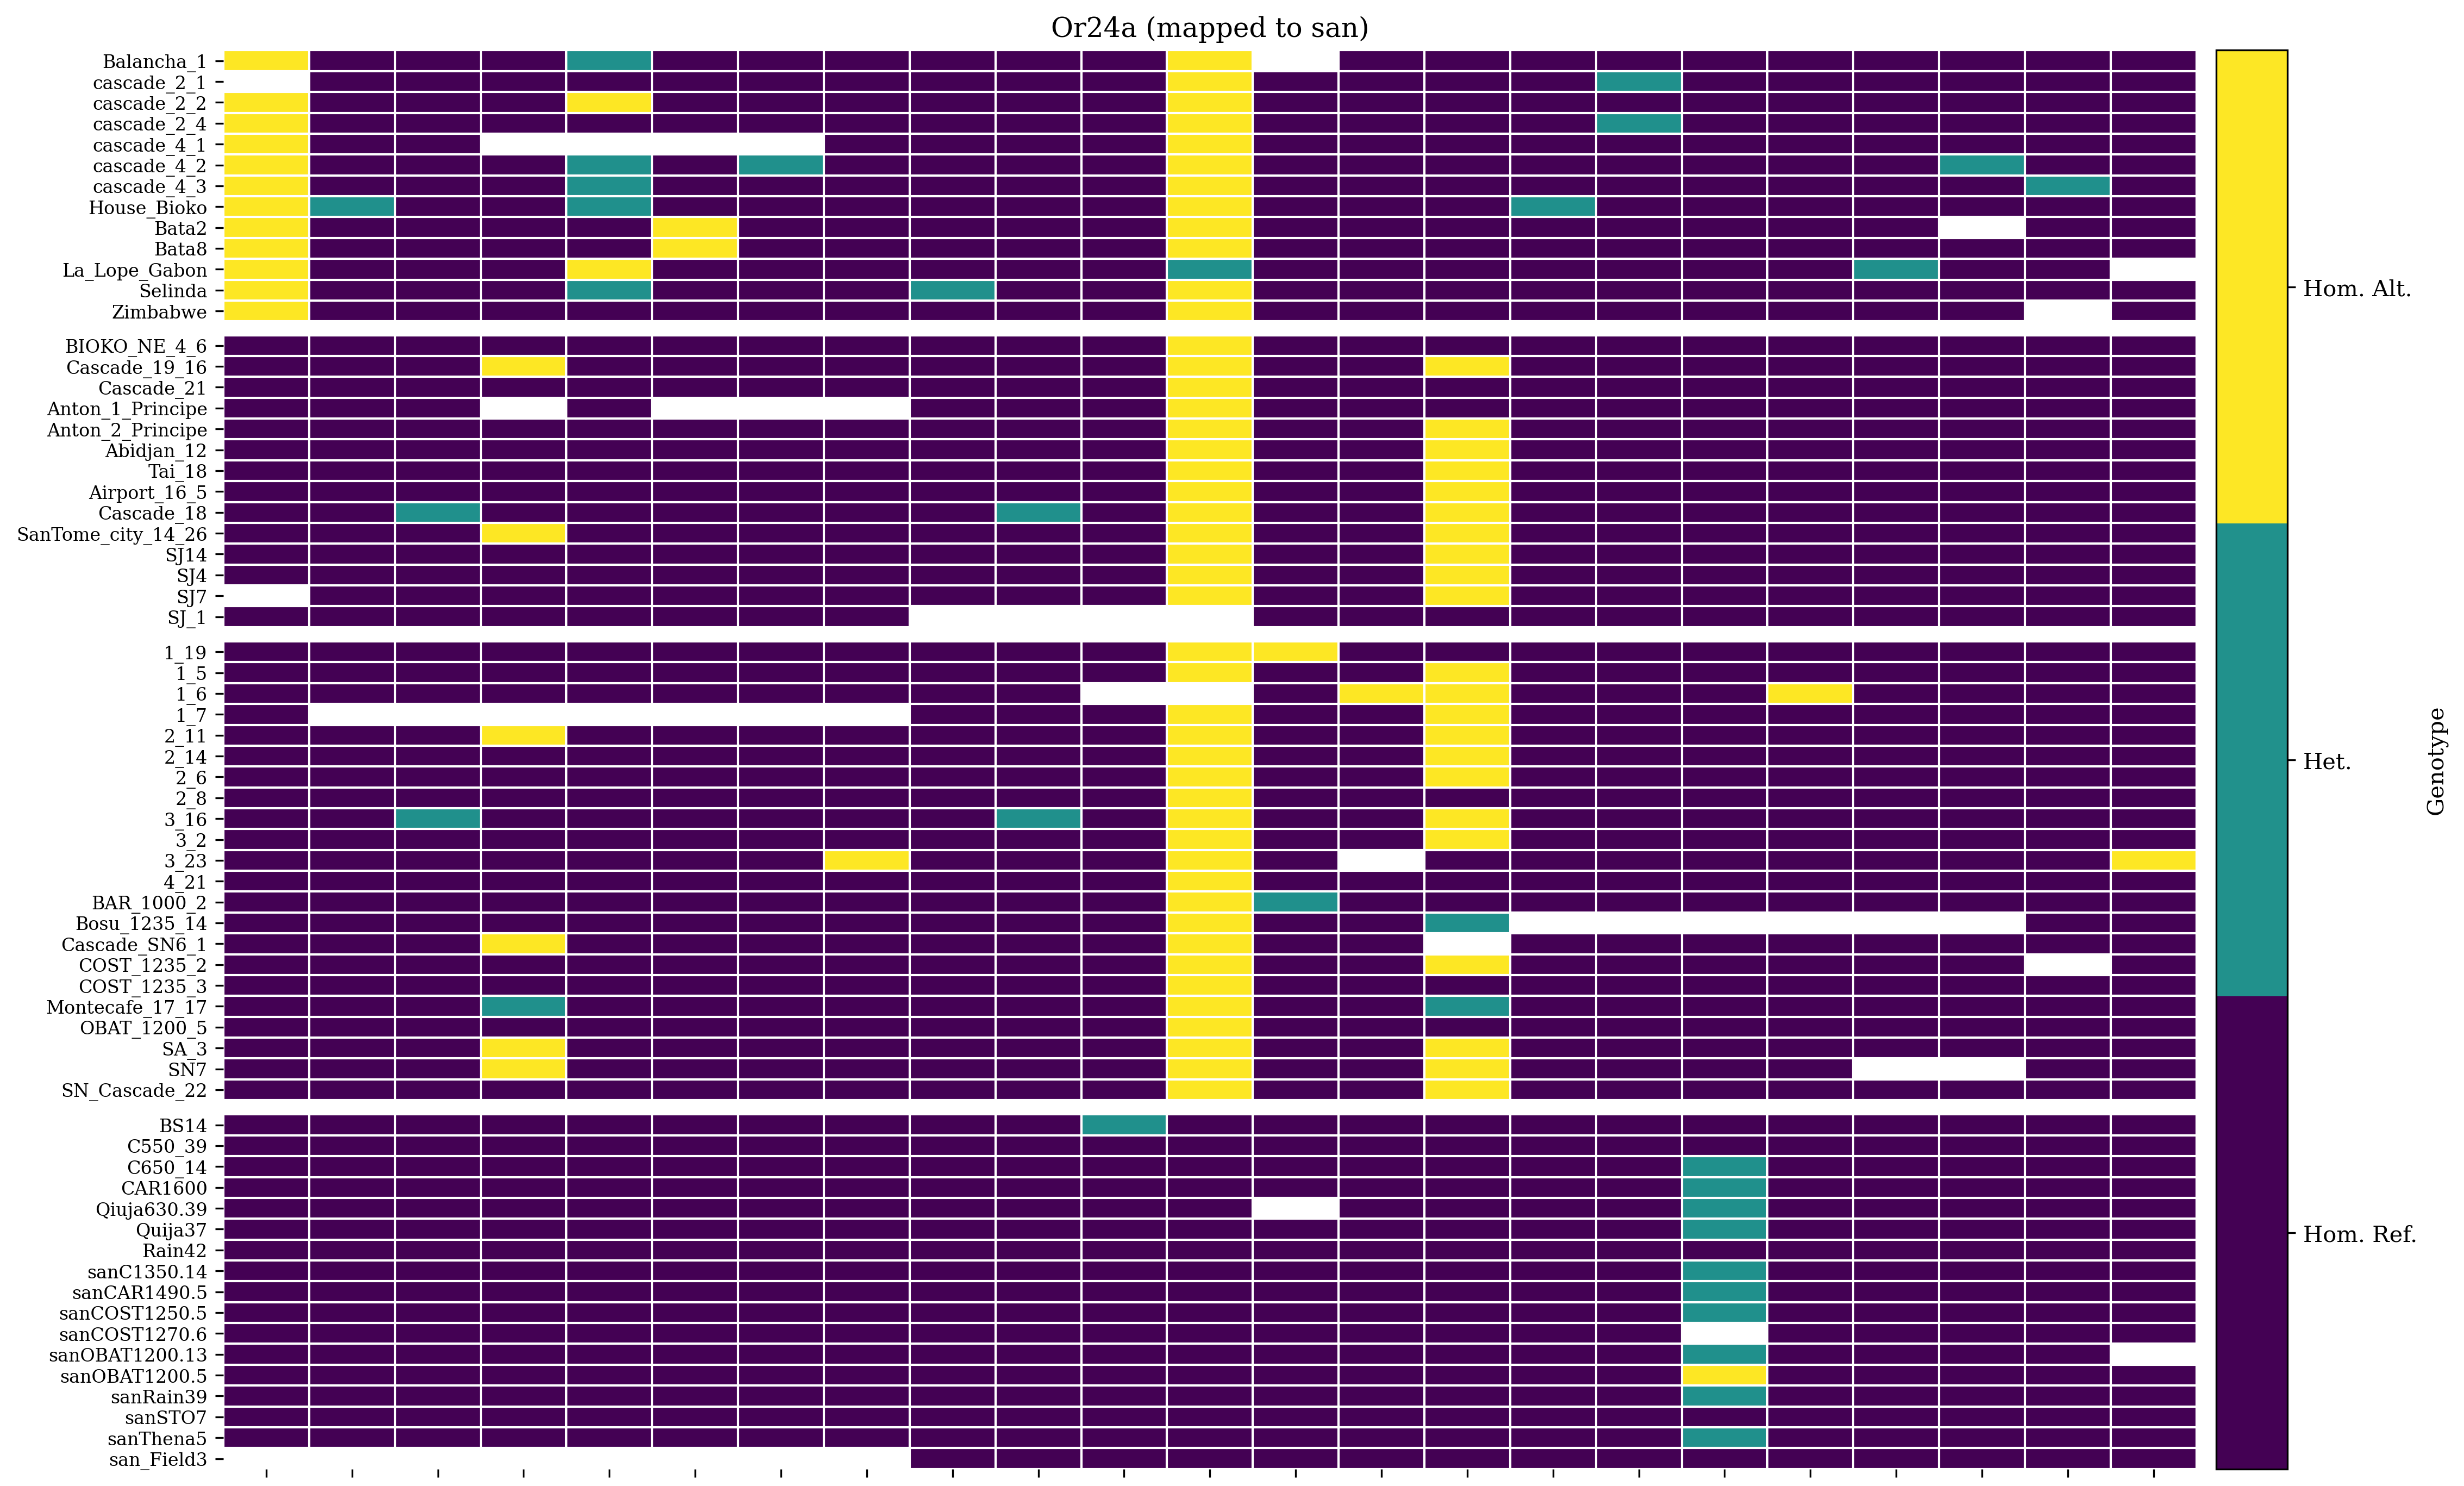

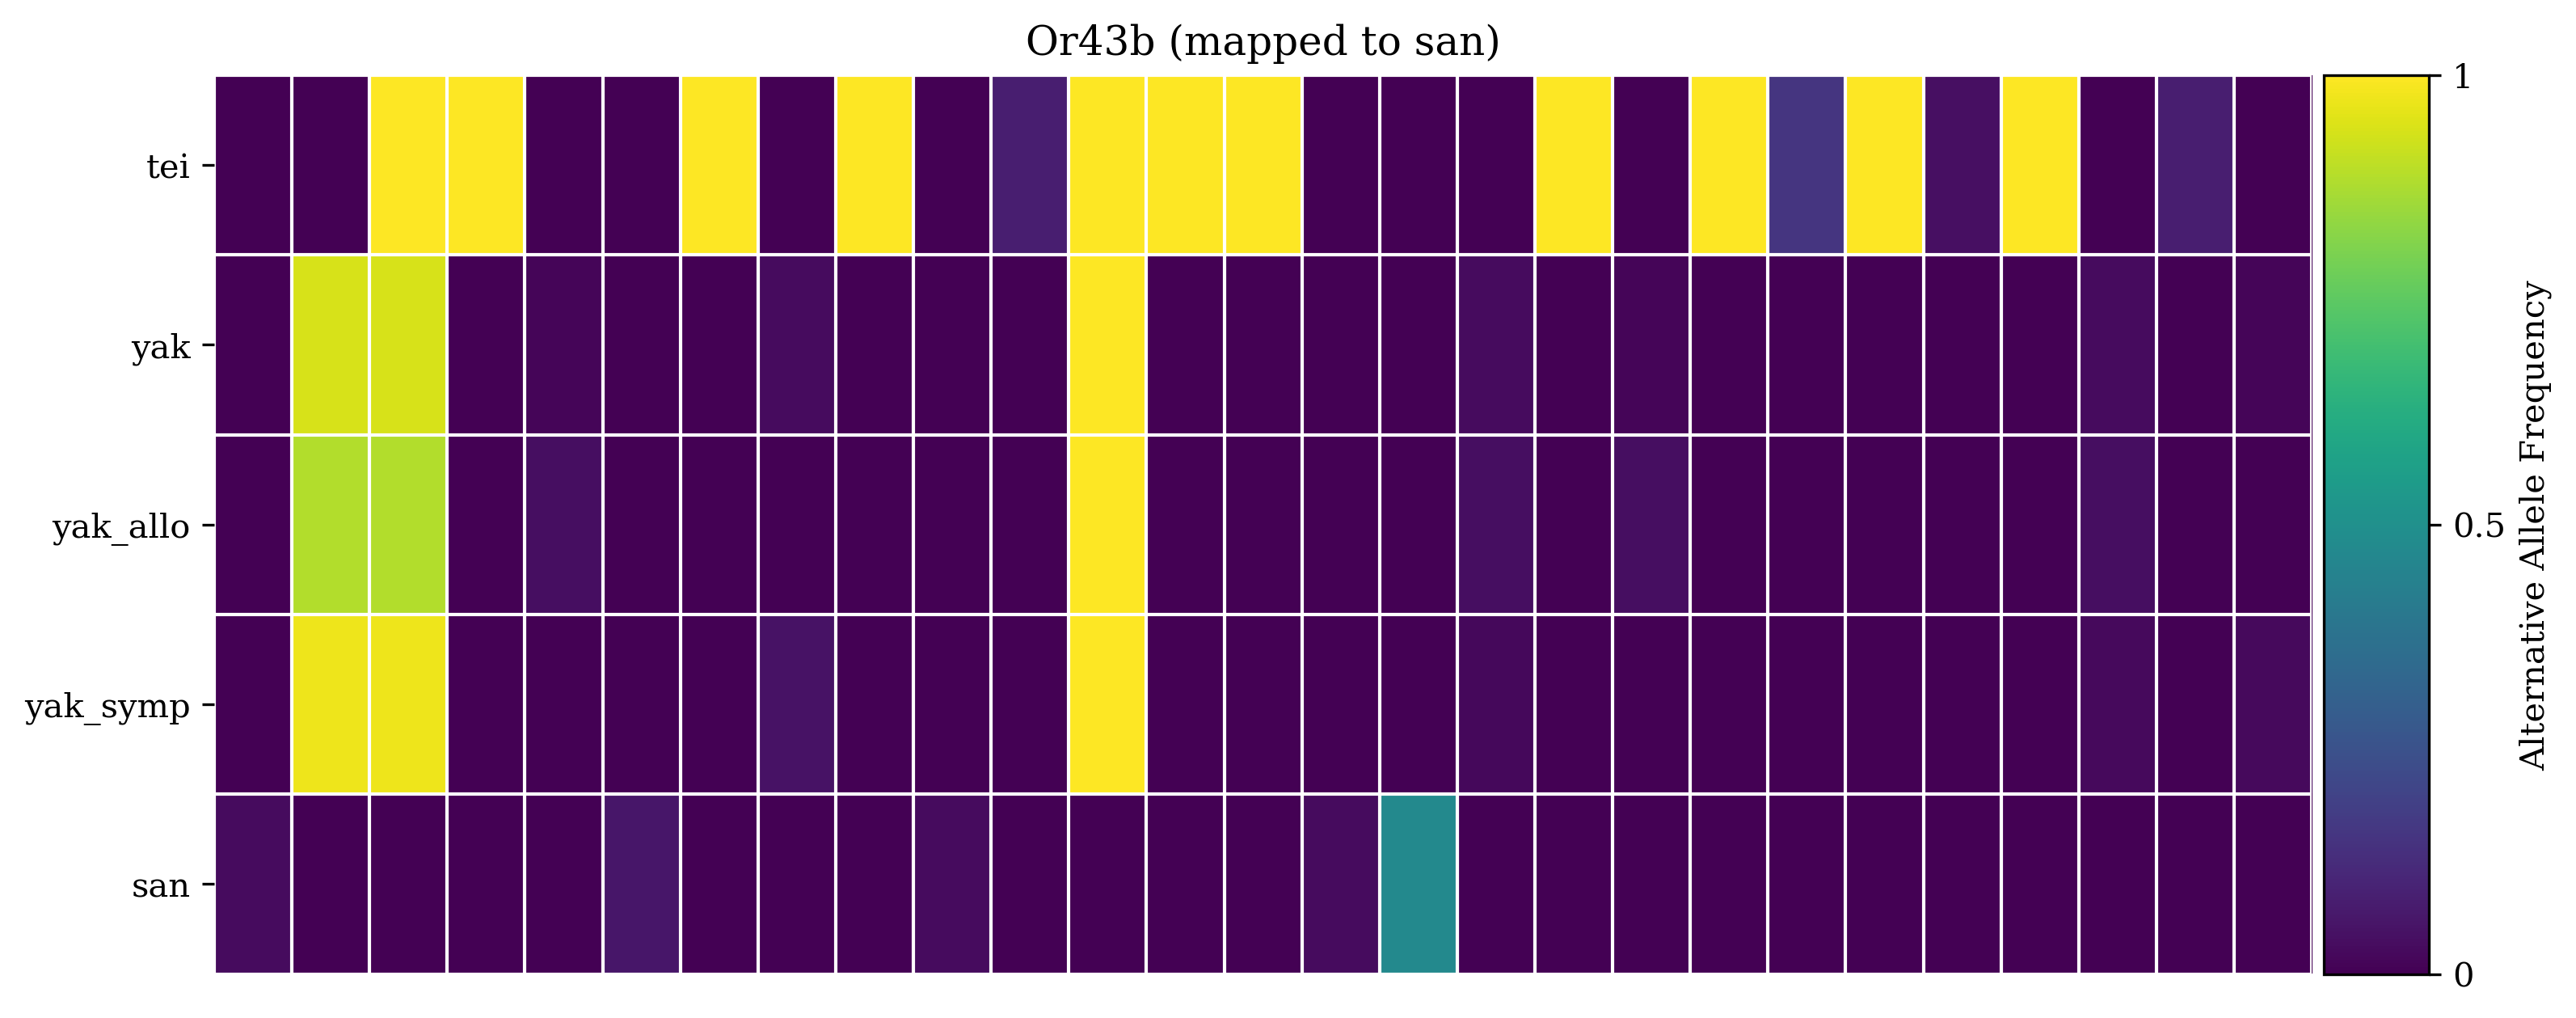

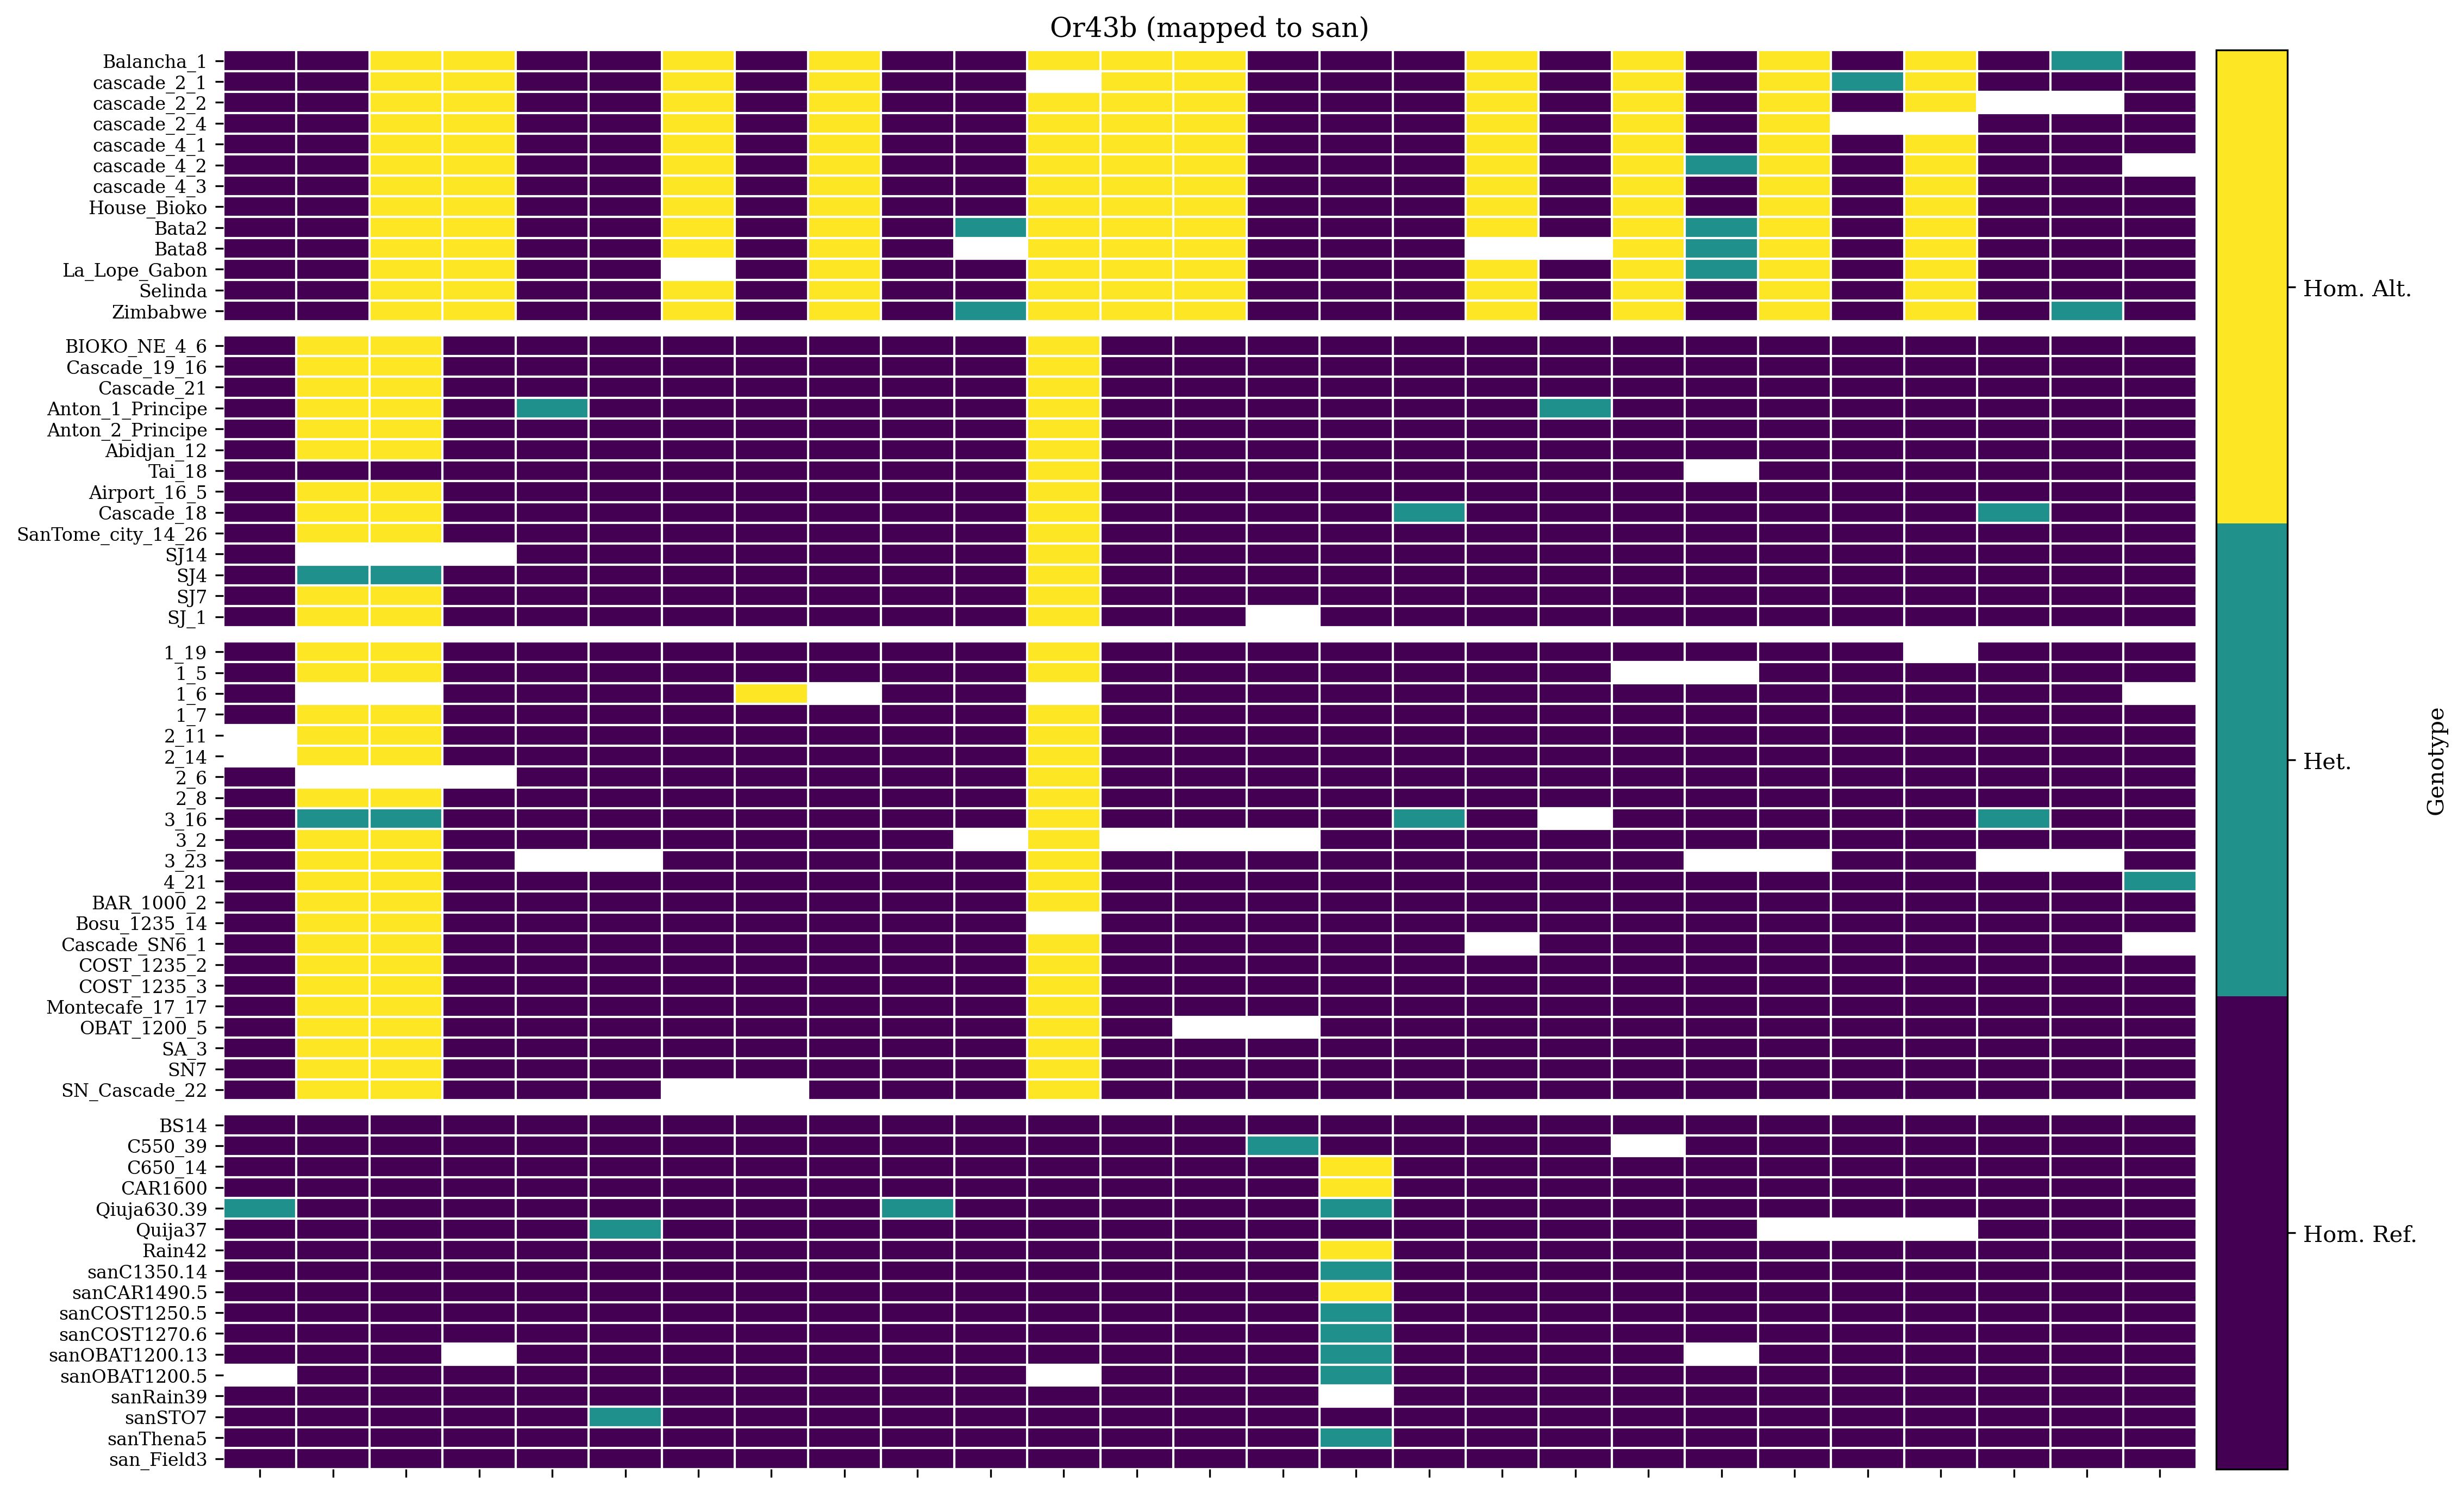

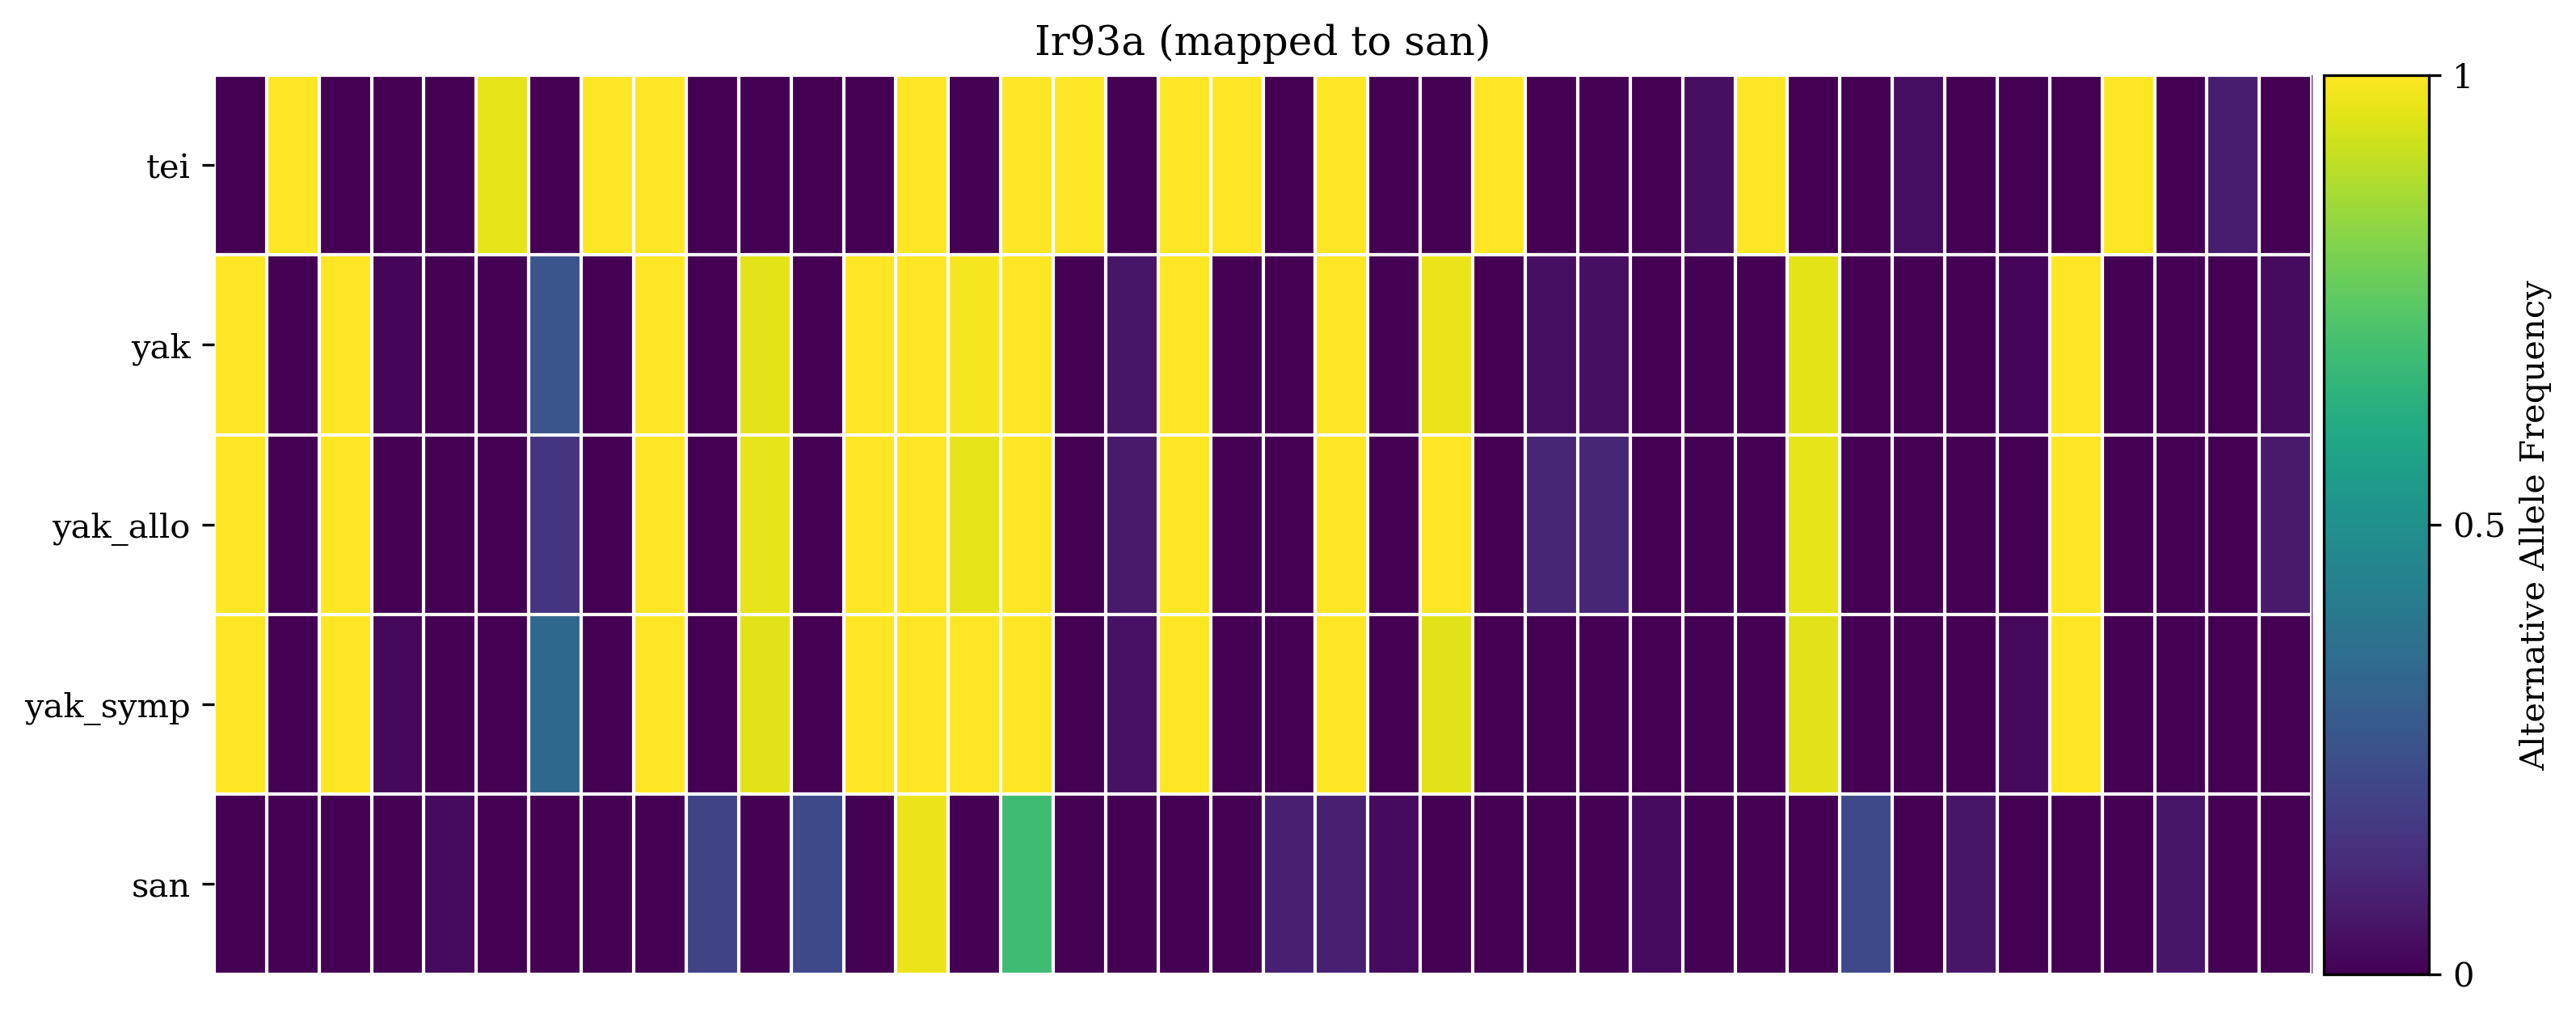

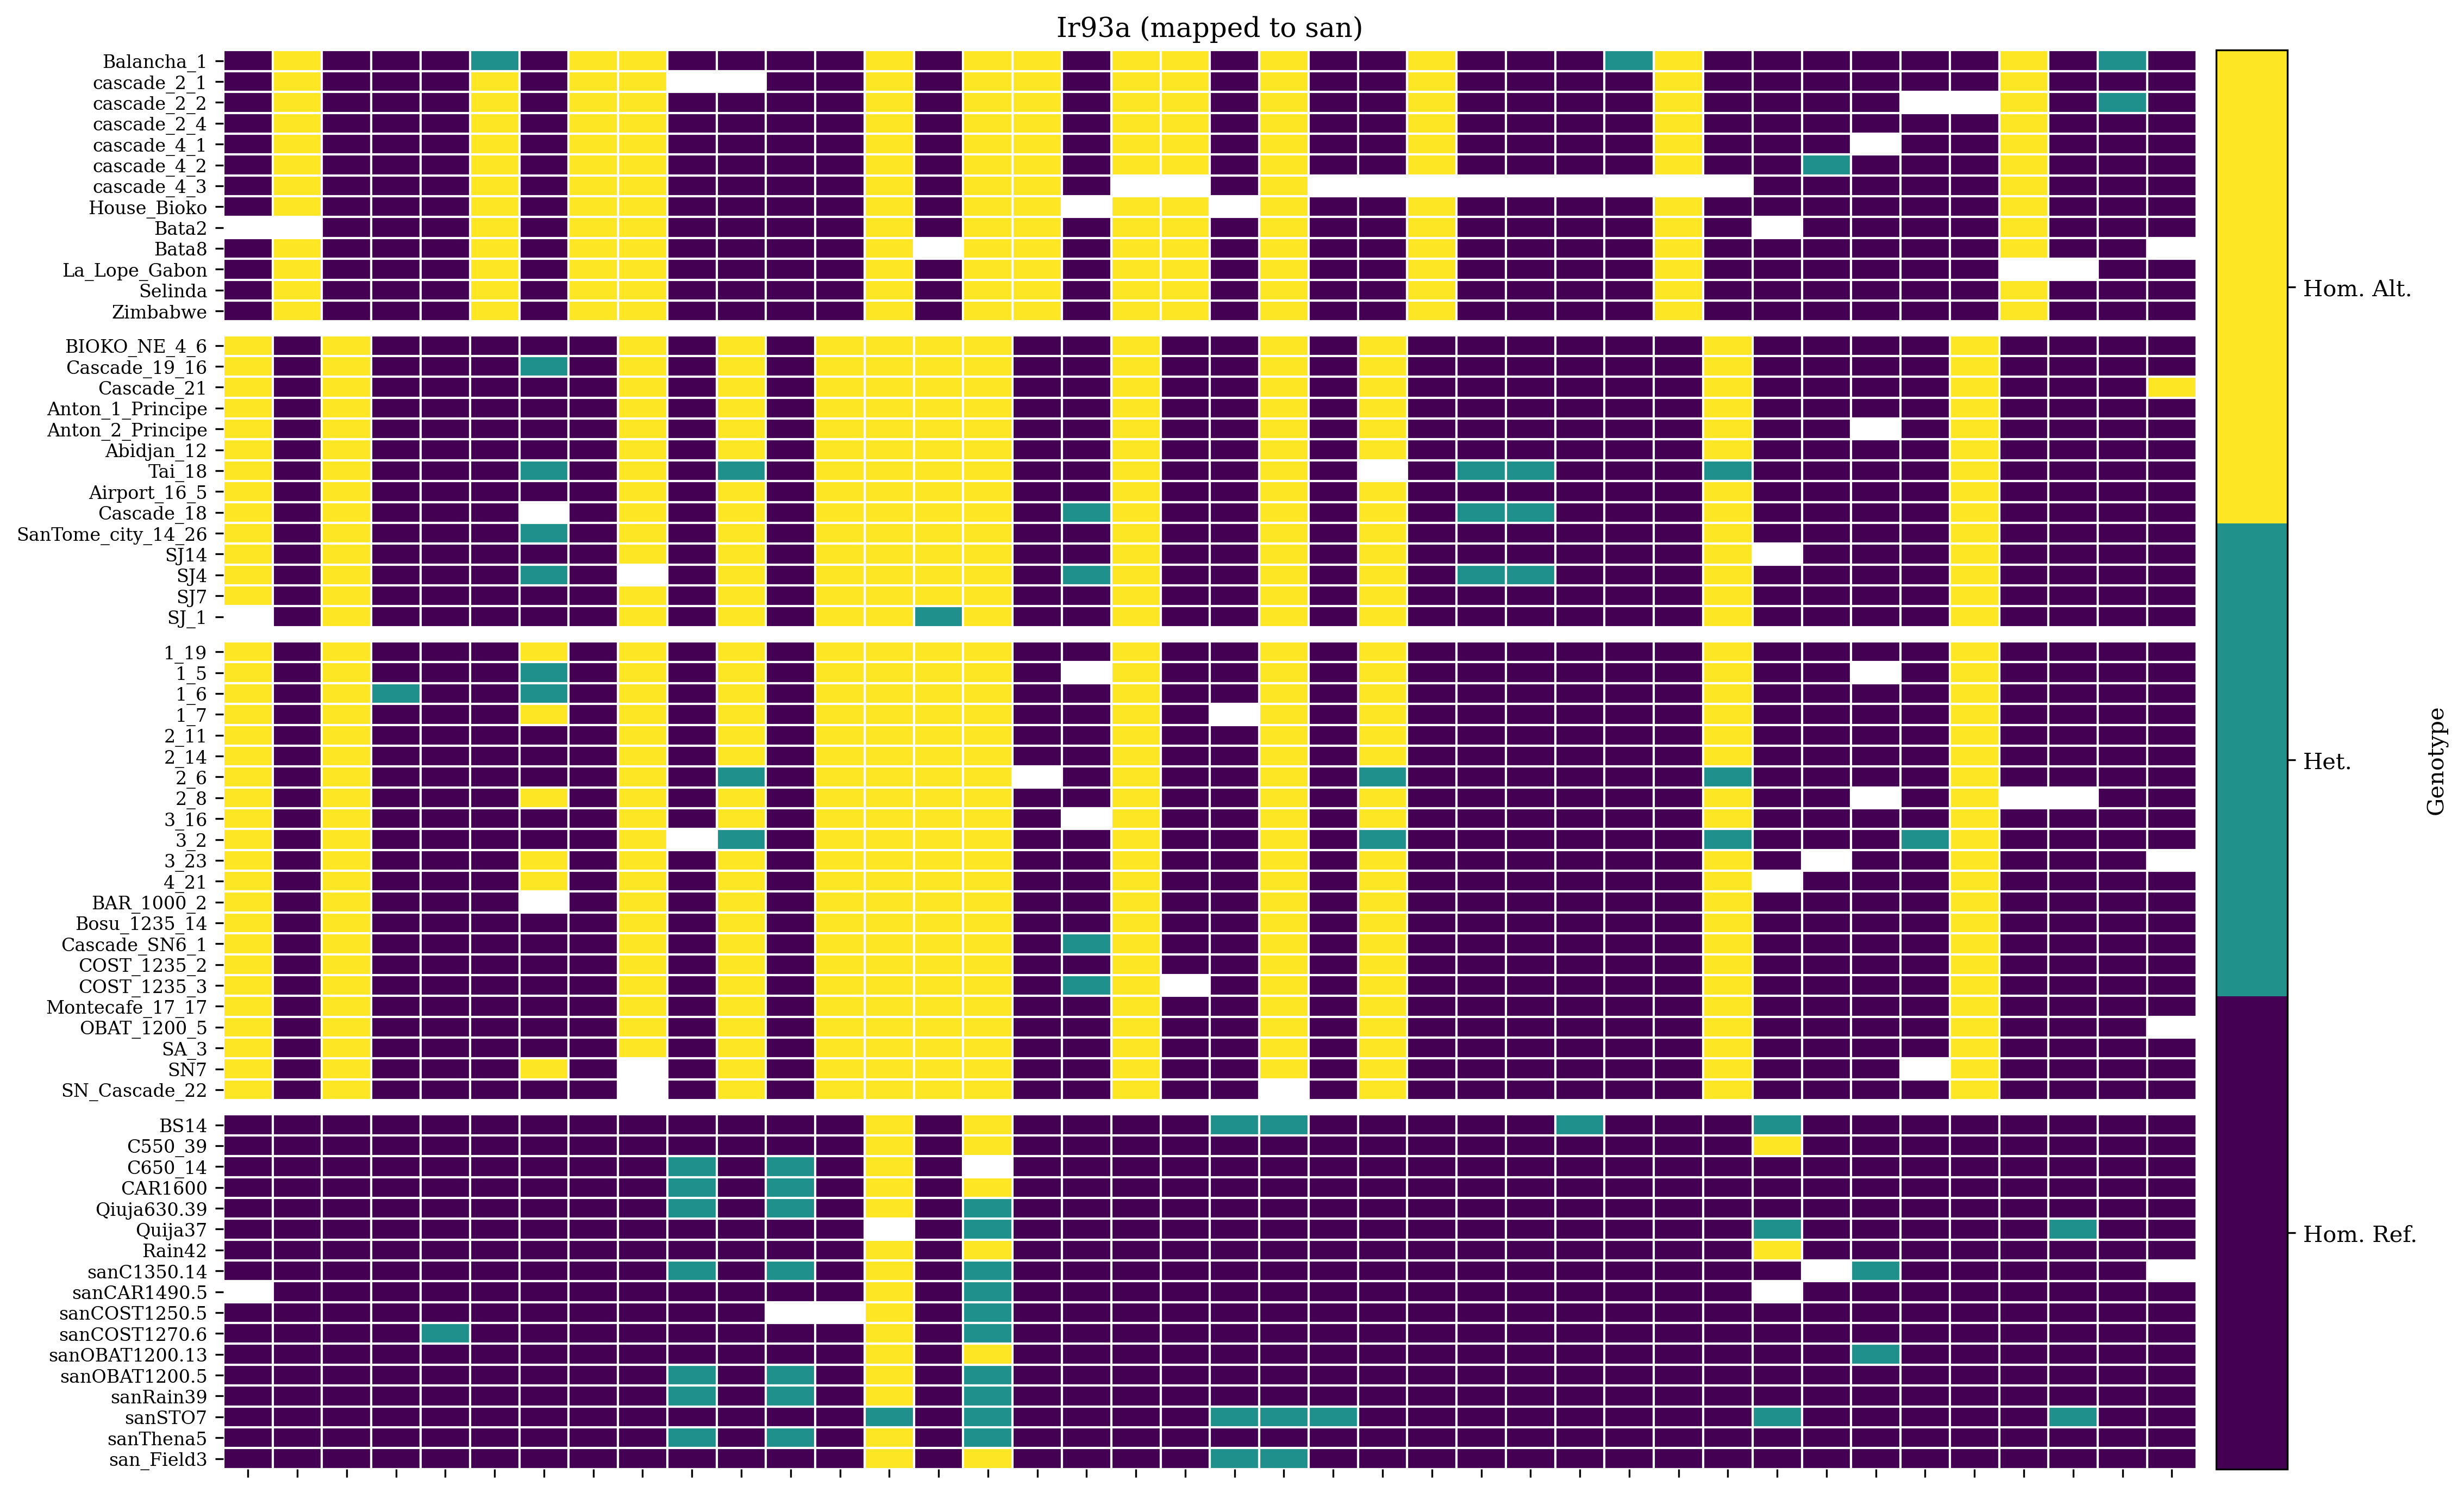

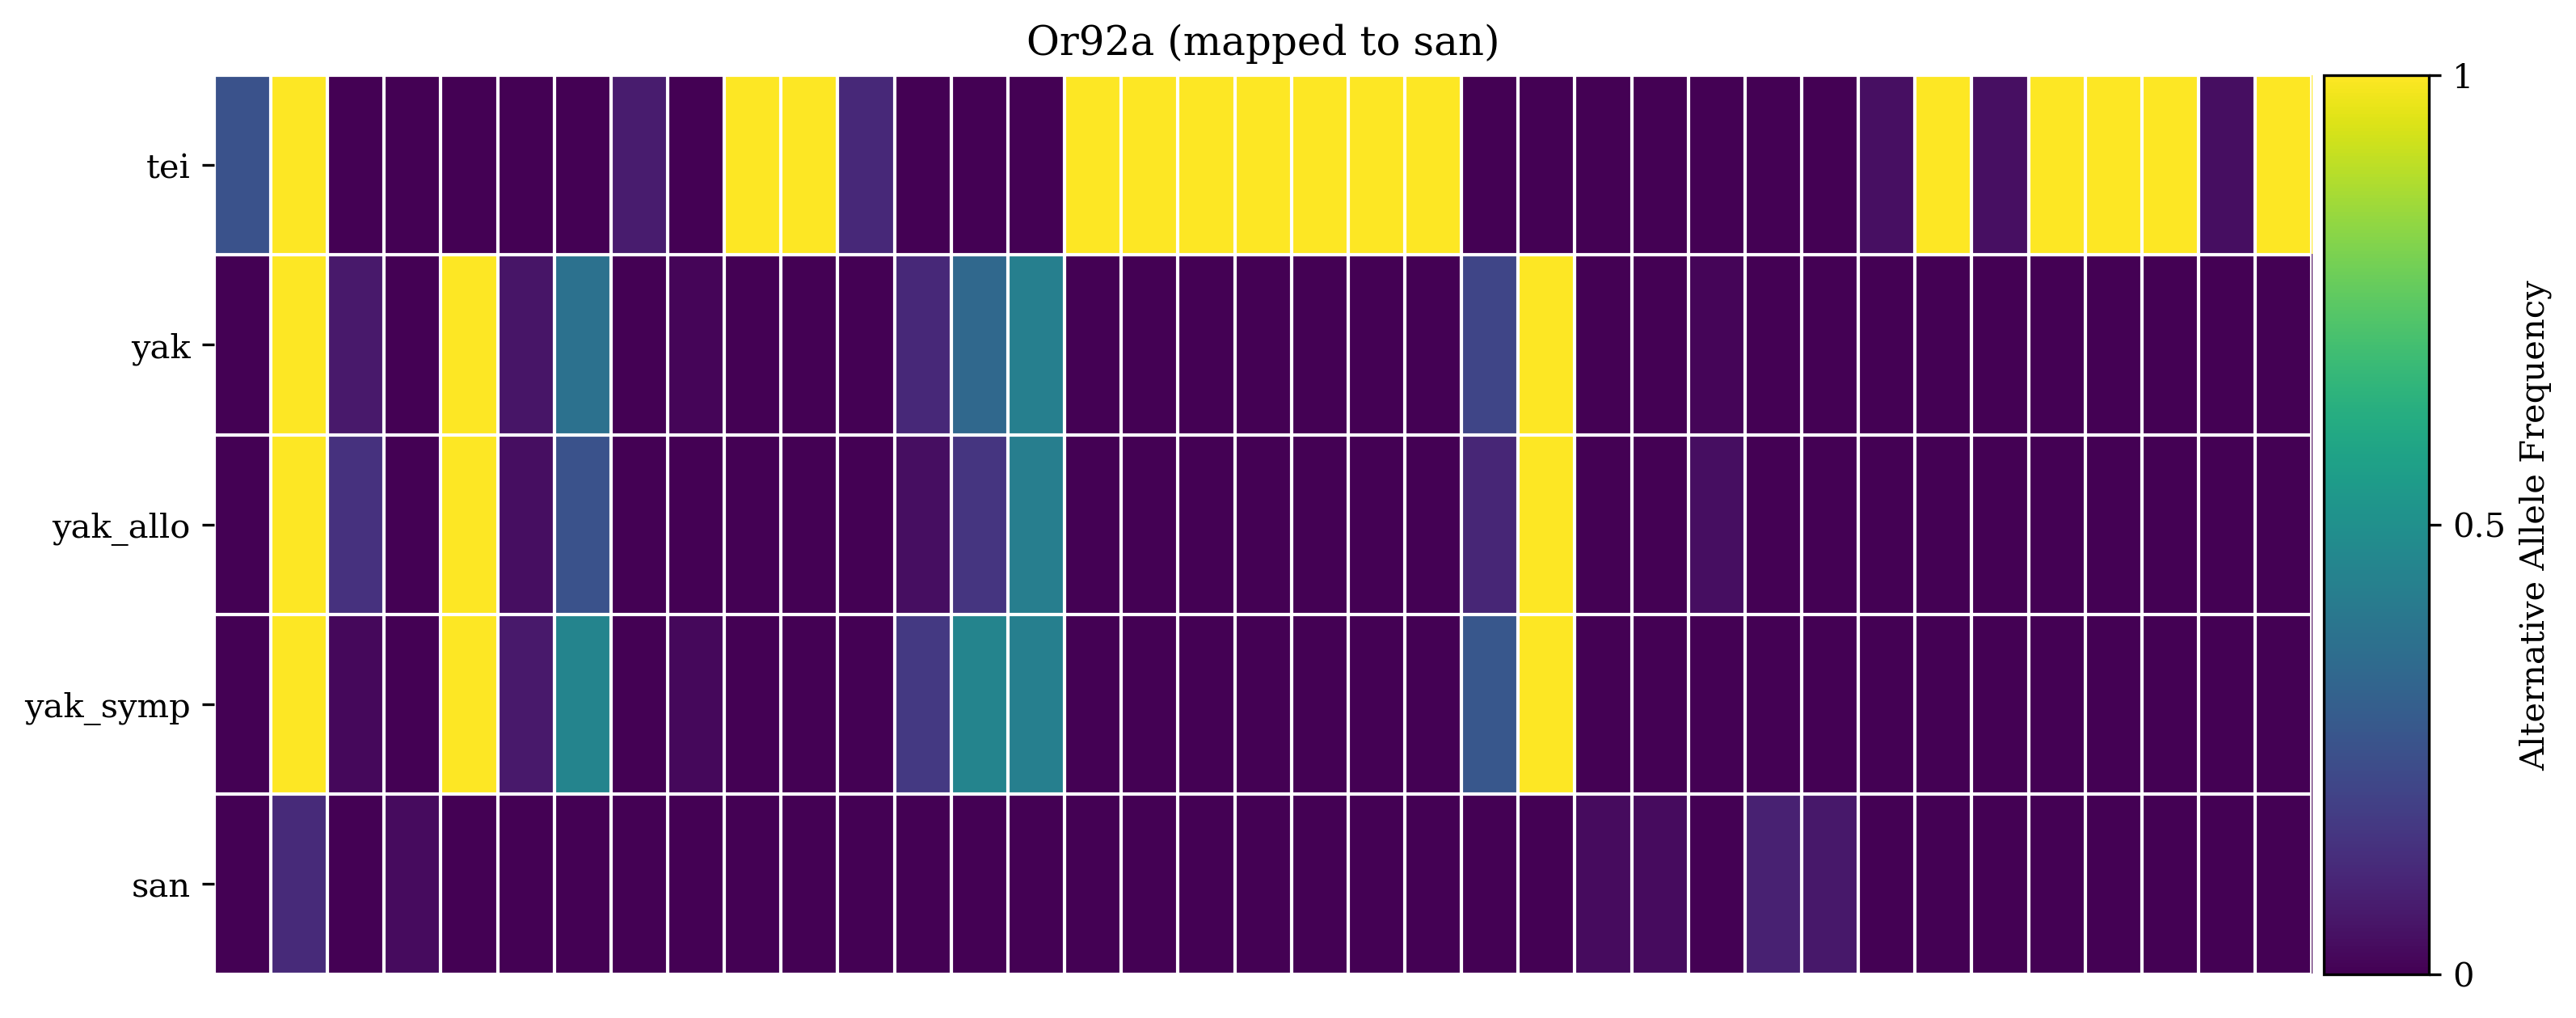

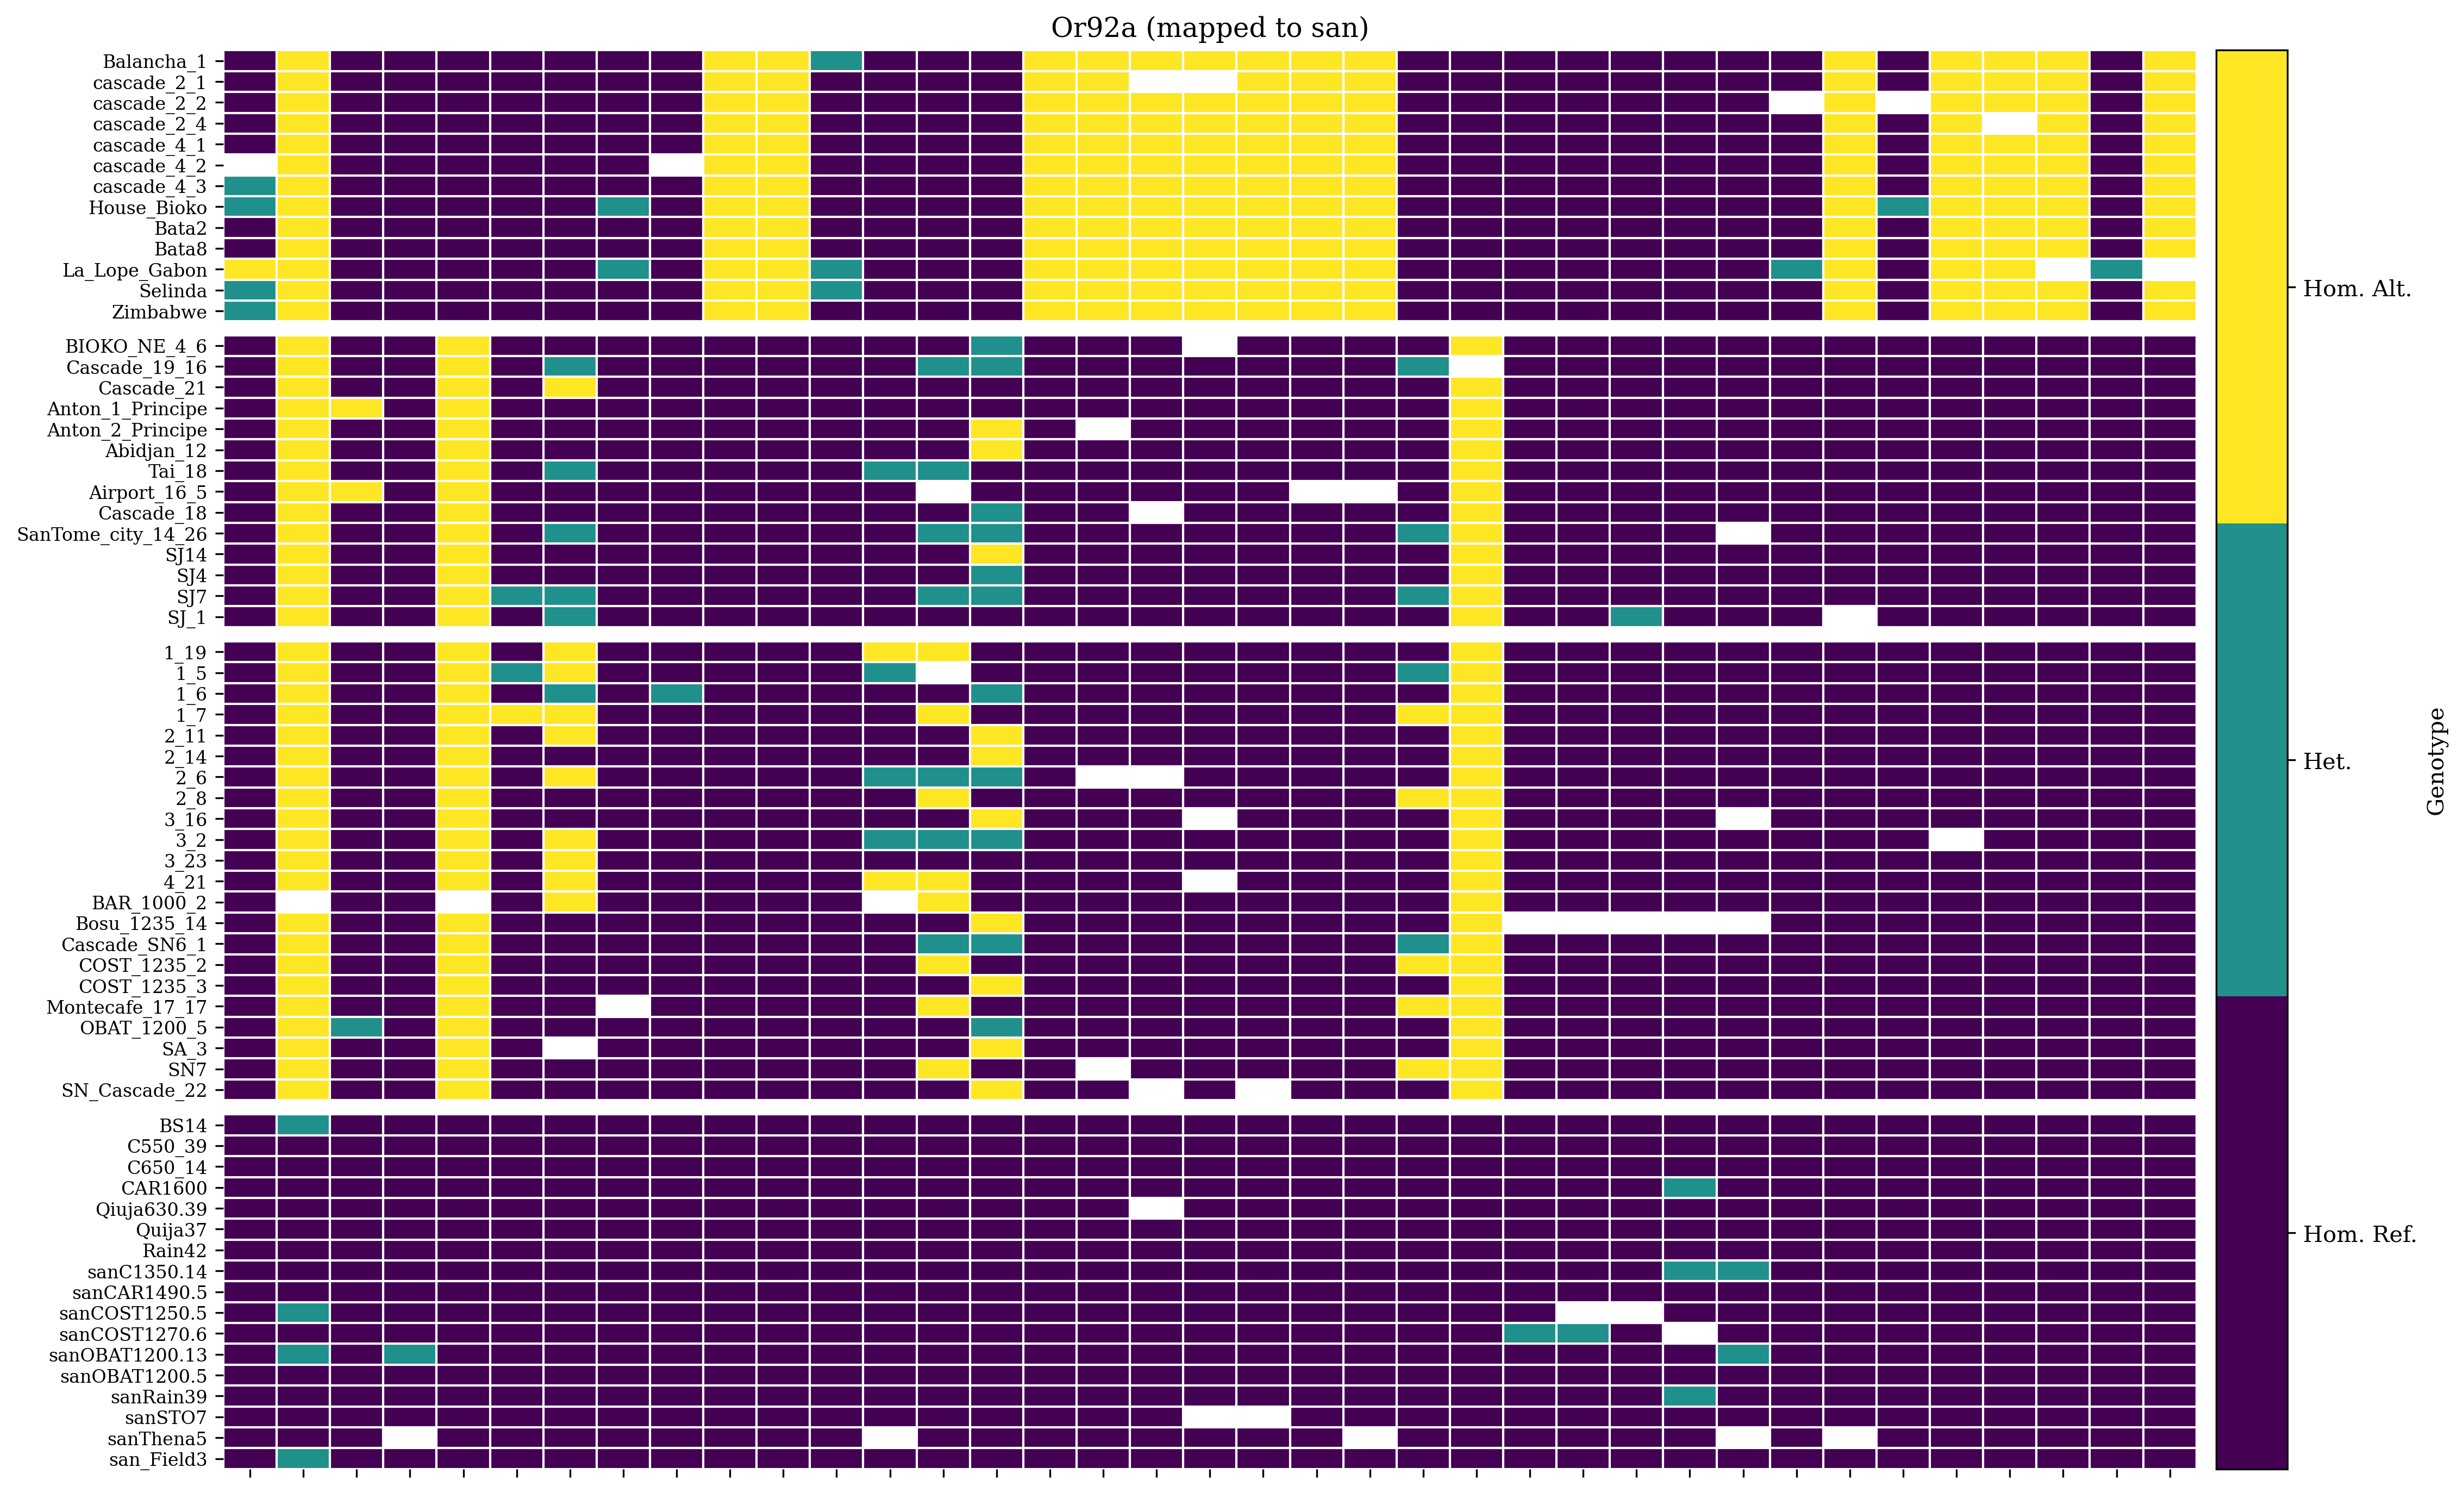

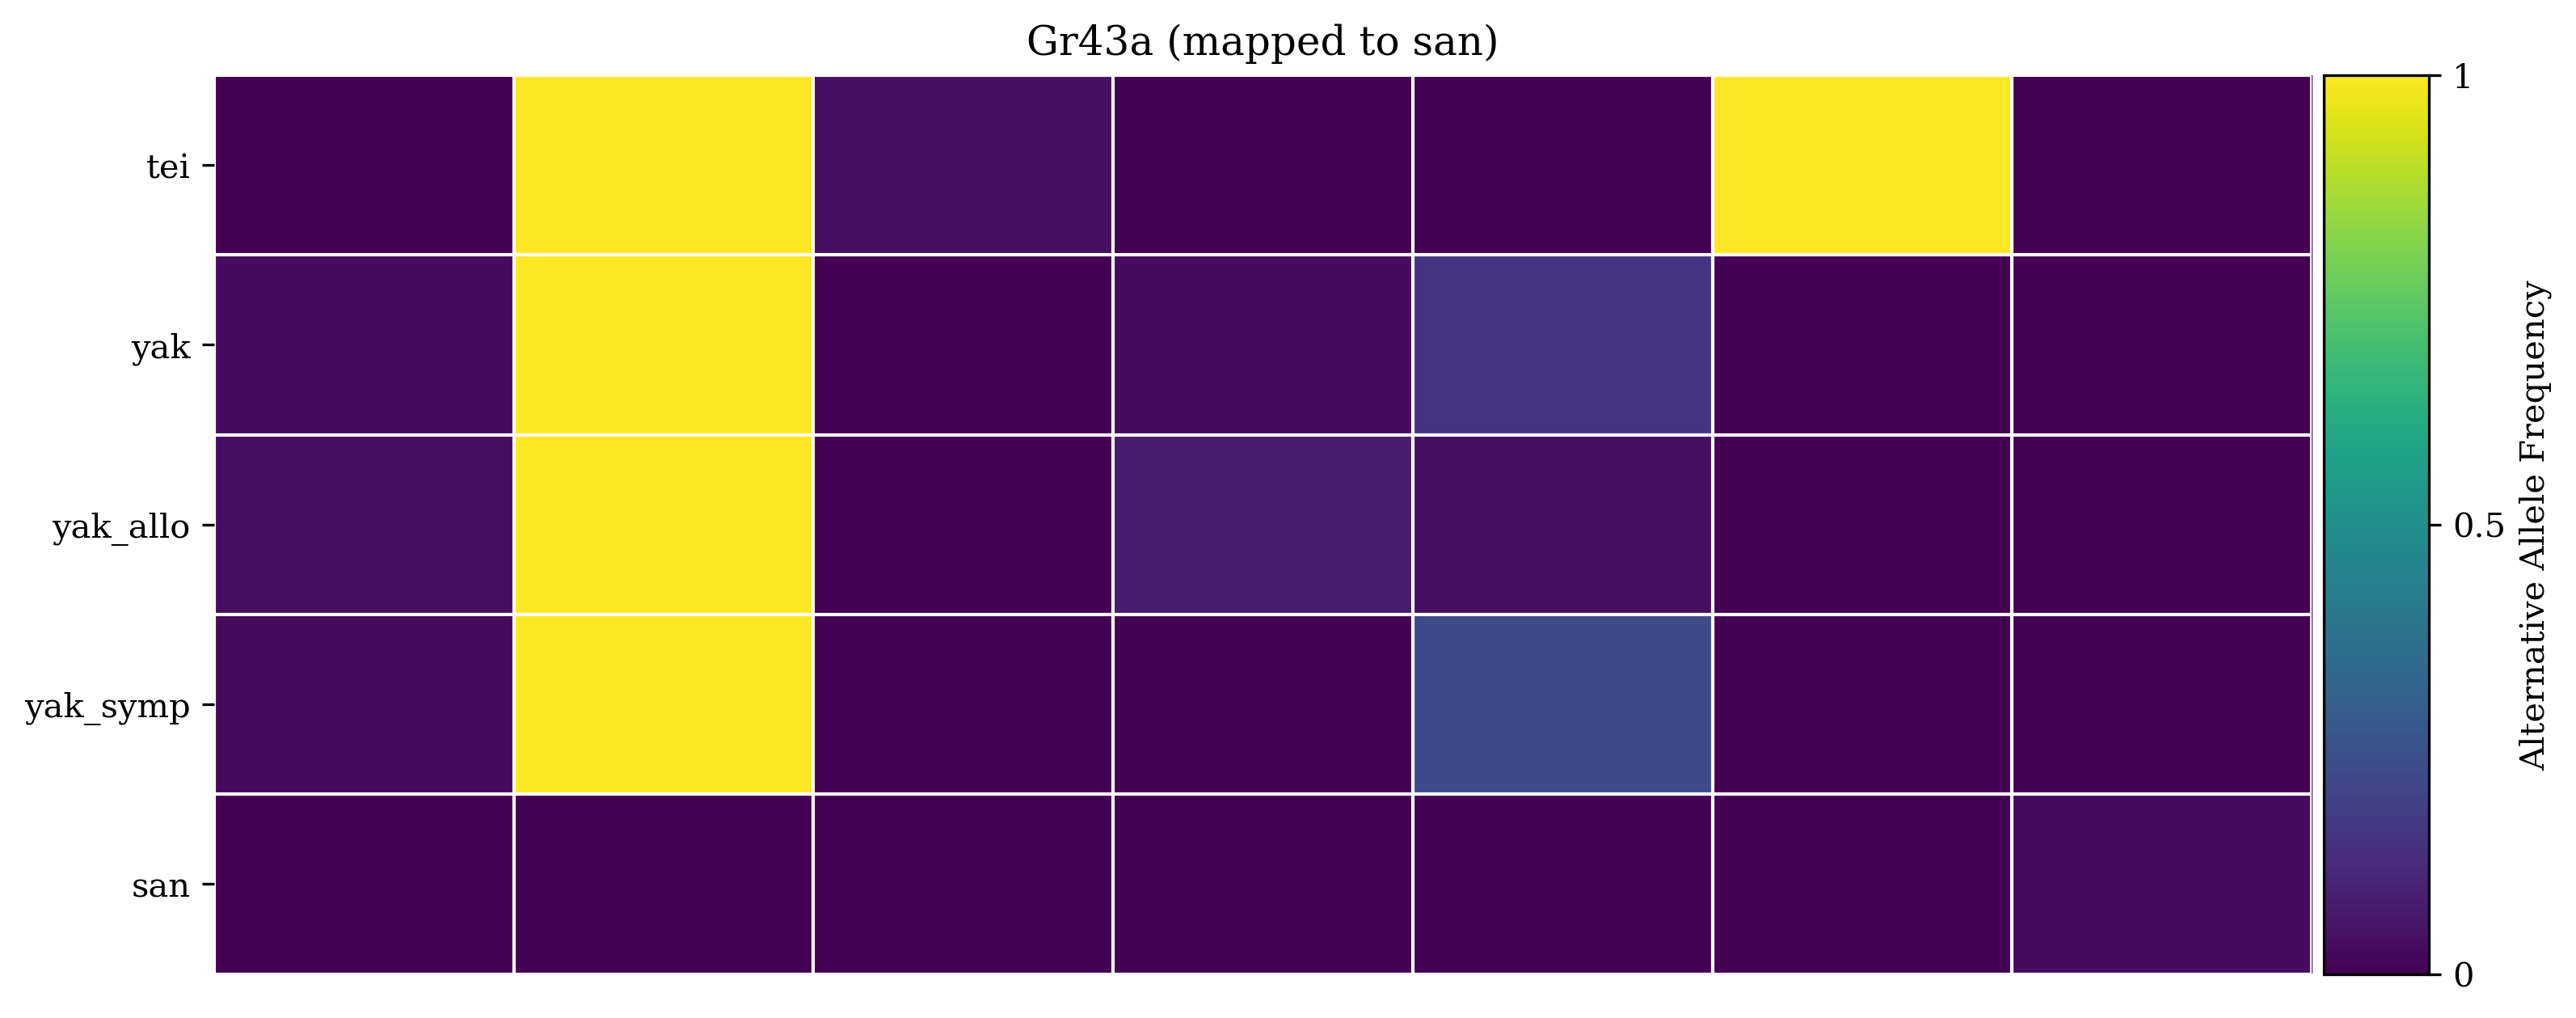

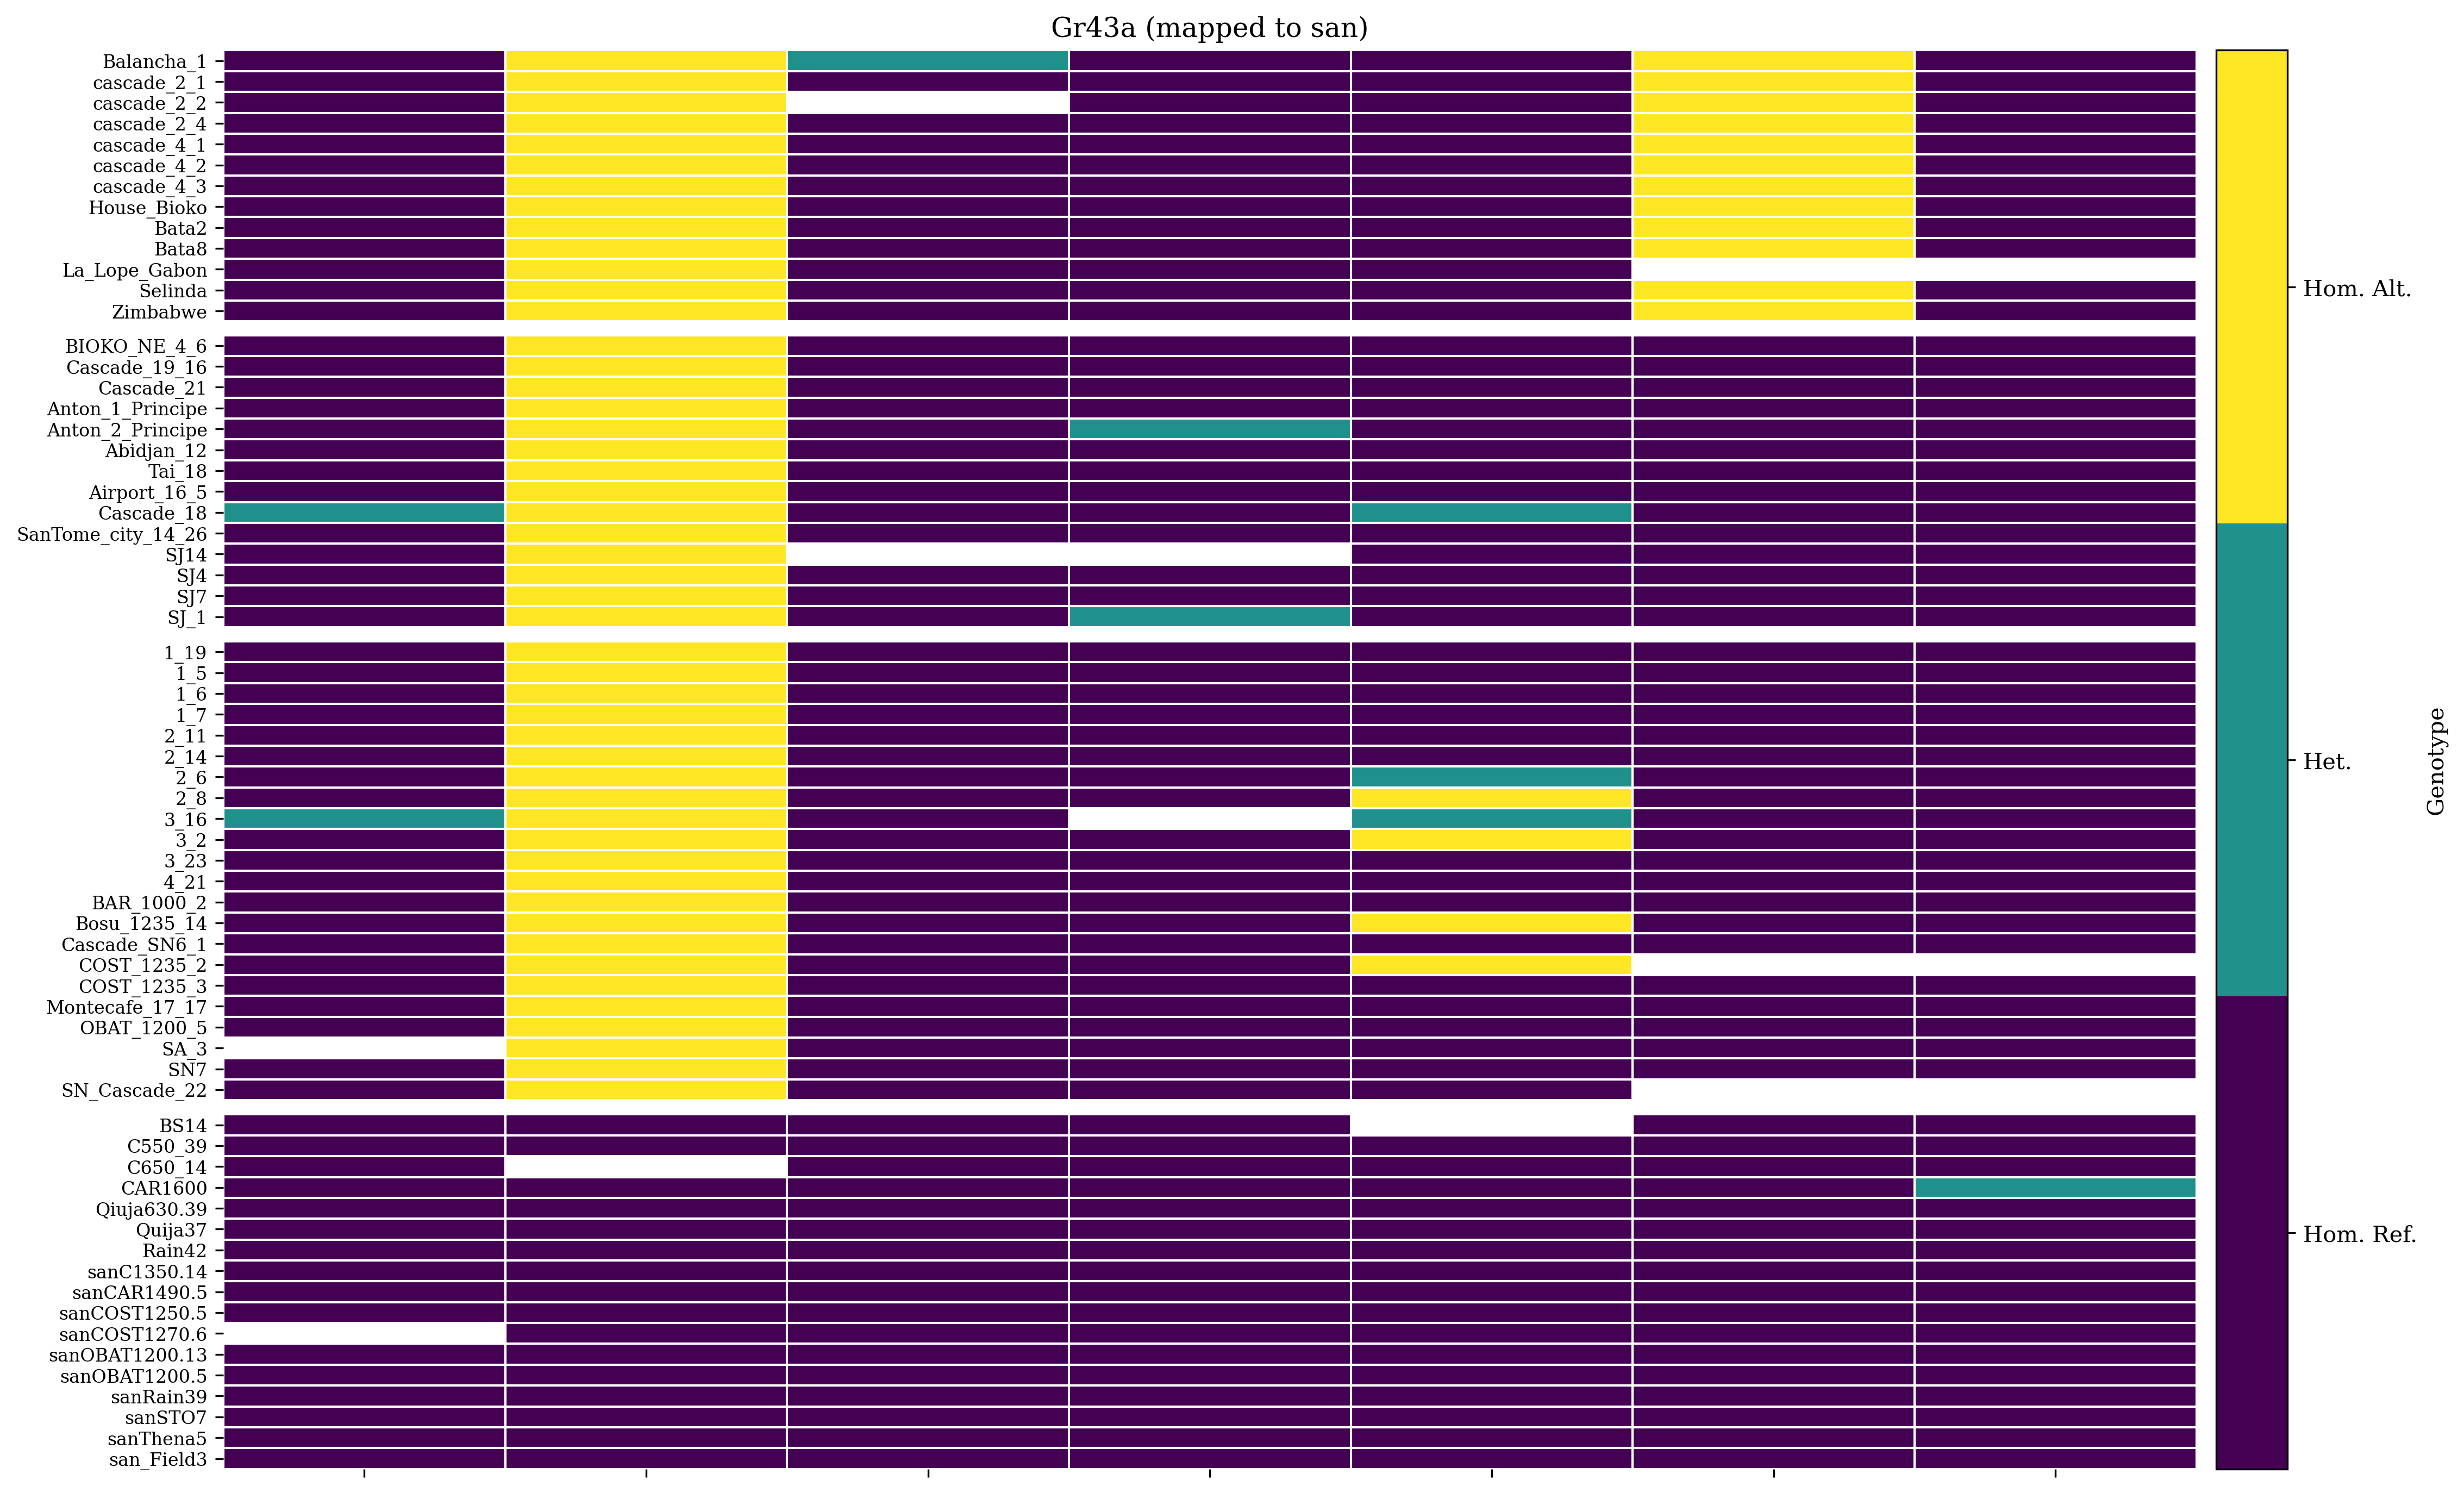

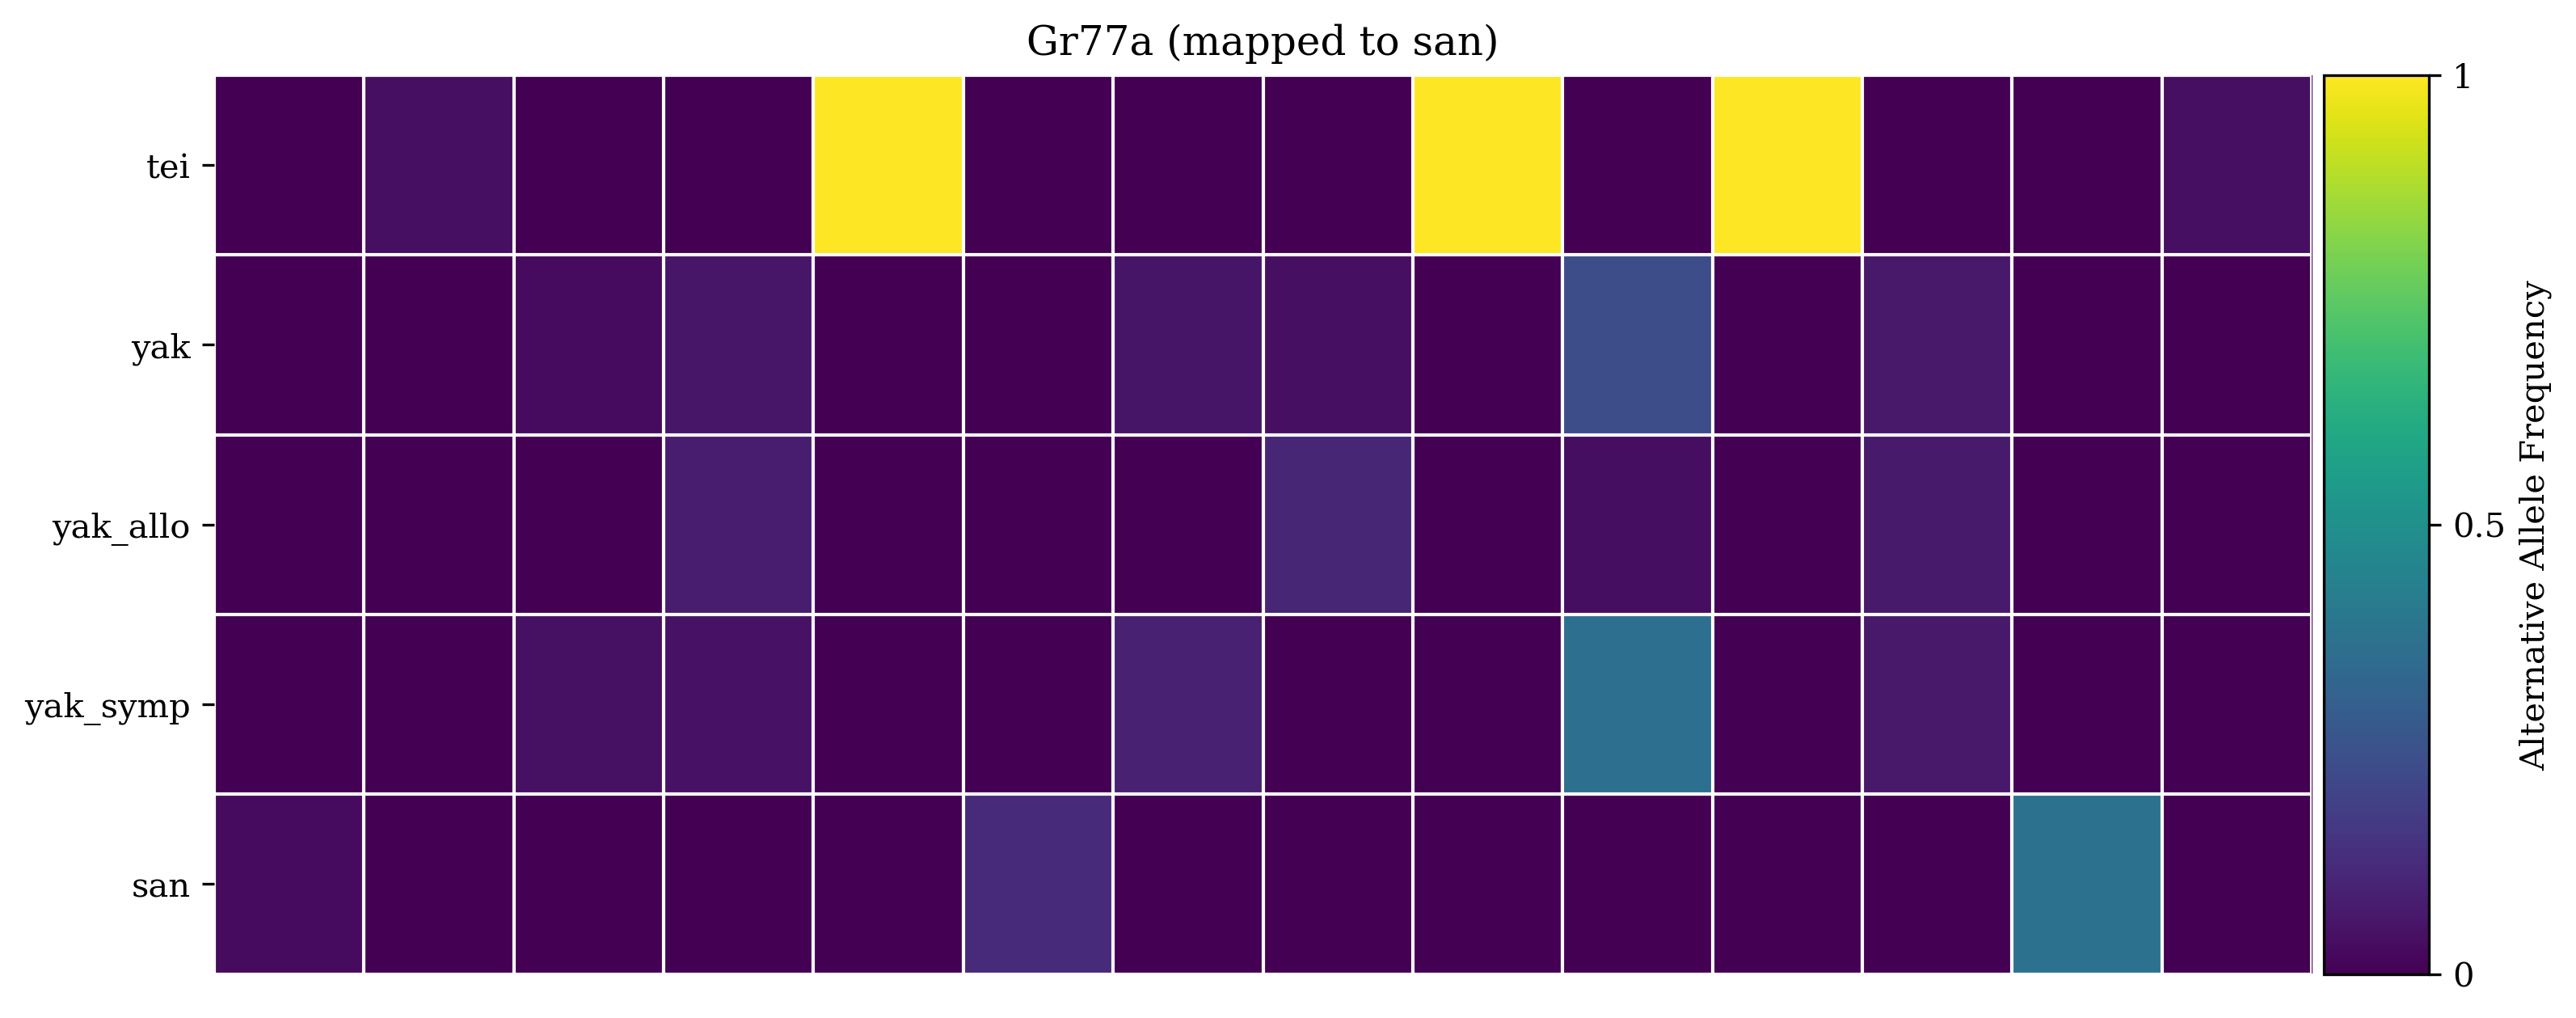

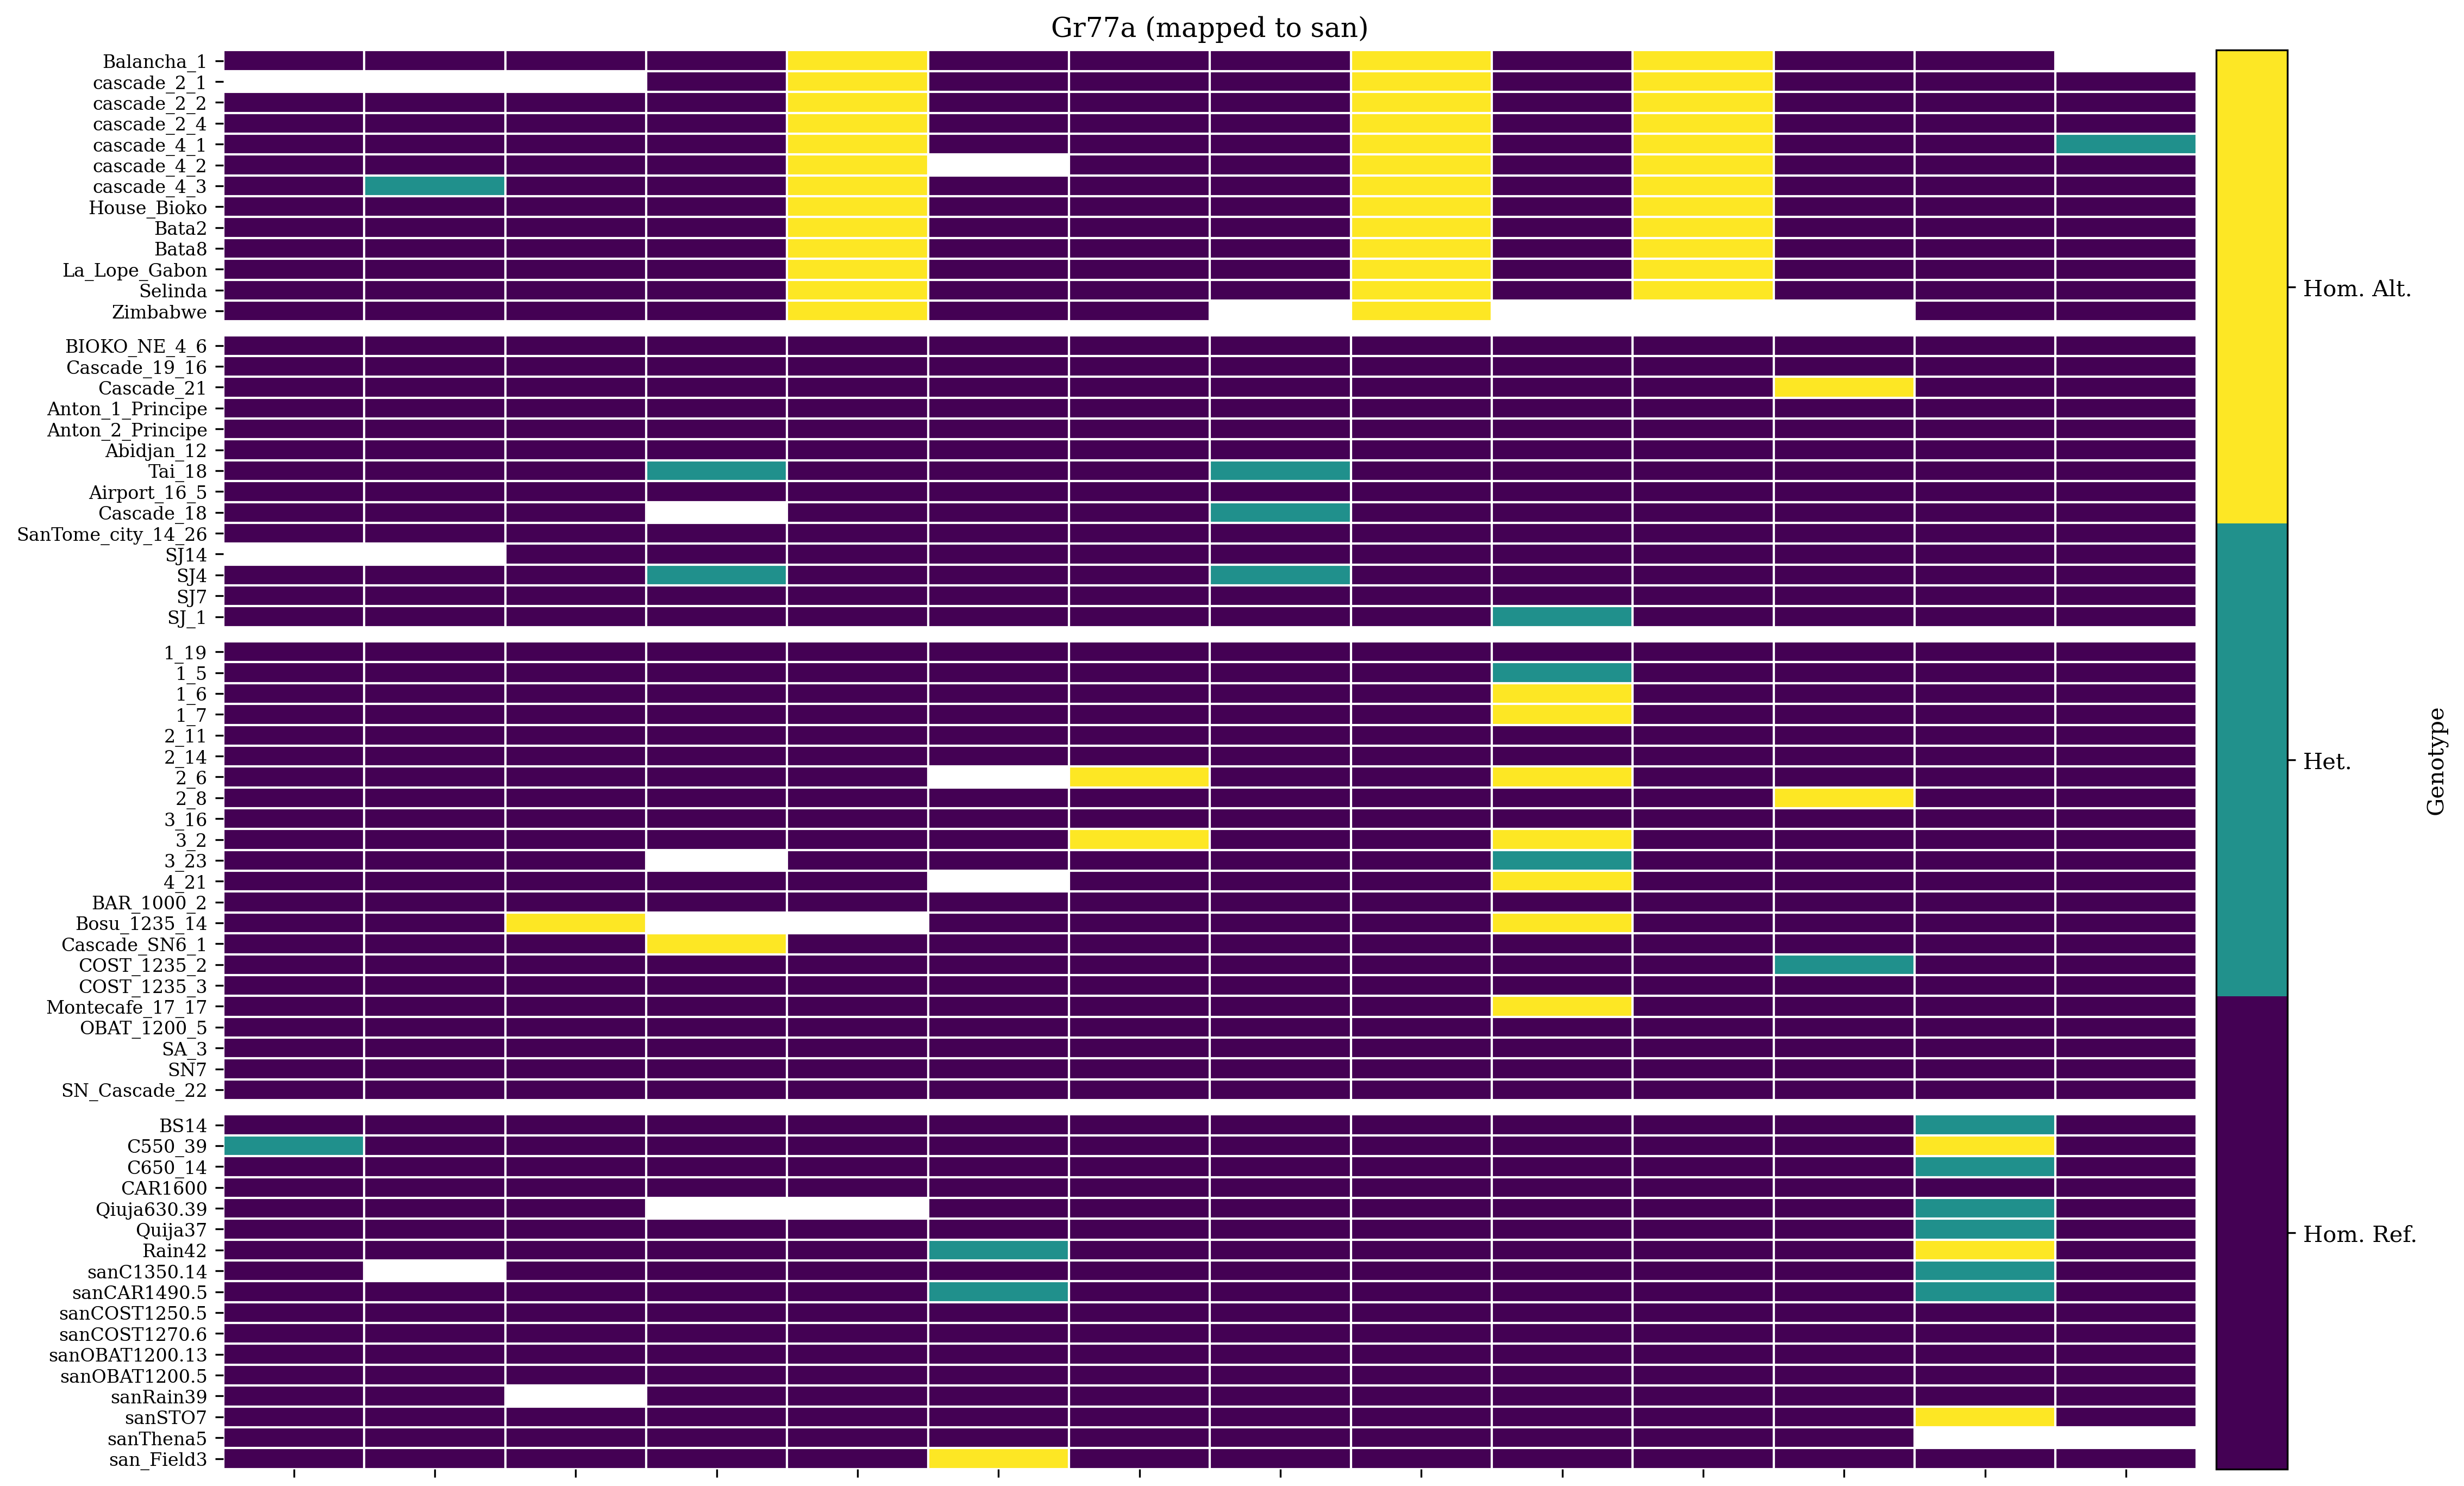

In [18]:
# For every canidate gene...
for can in can_genes:
    # Plot the results.
    plot_can_genes(can, 'san', cans_map_san_dicc)

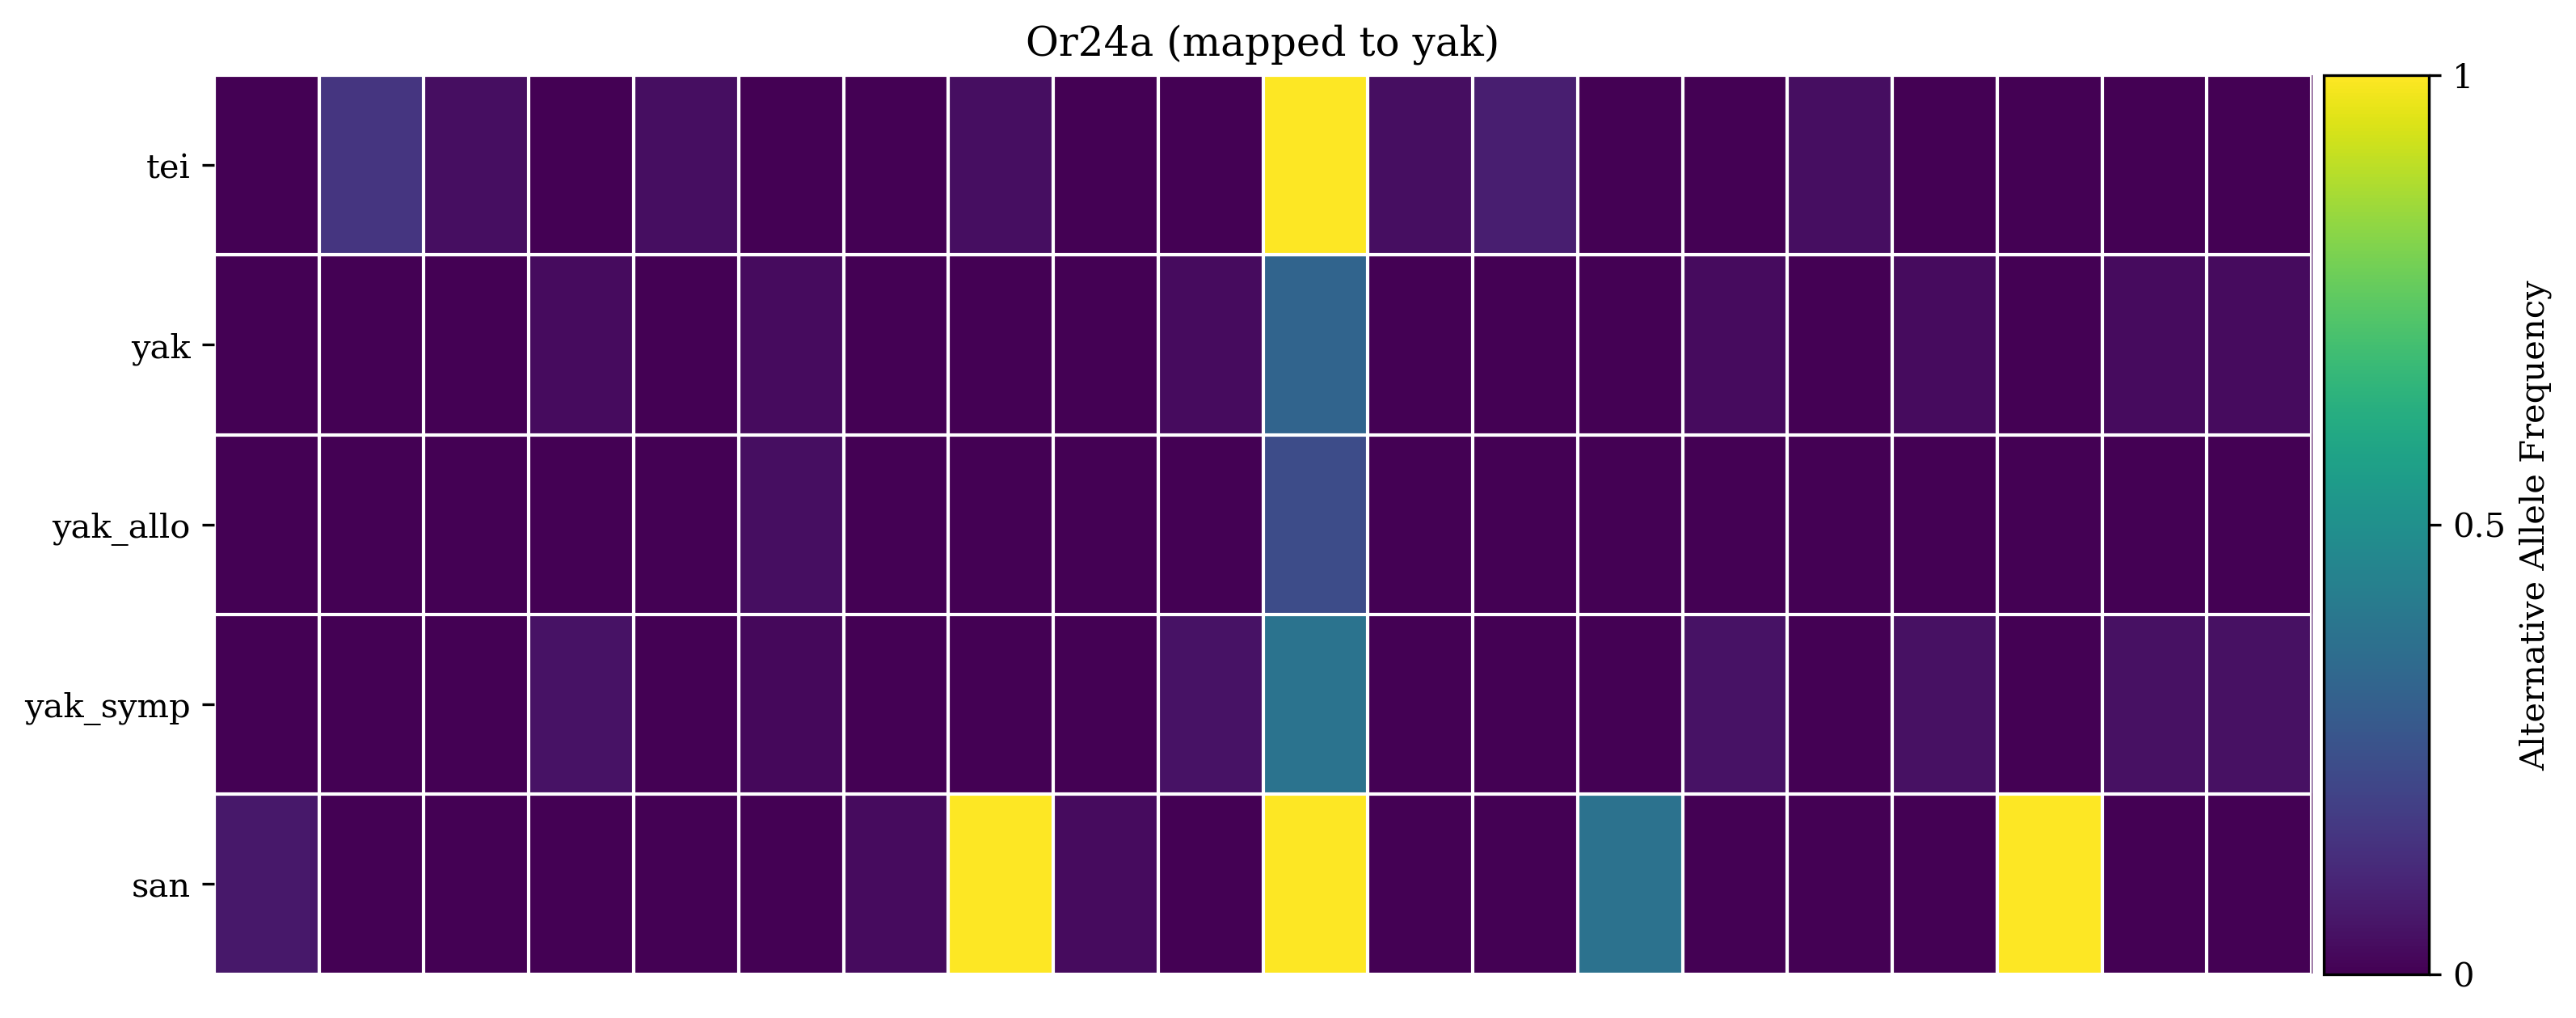

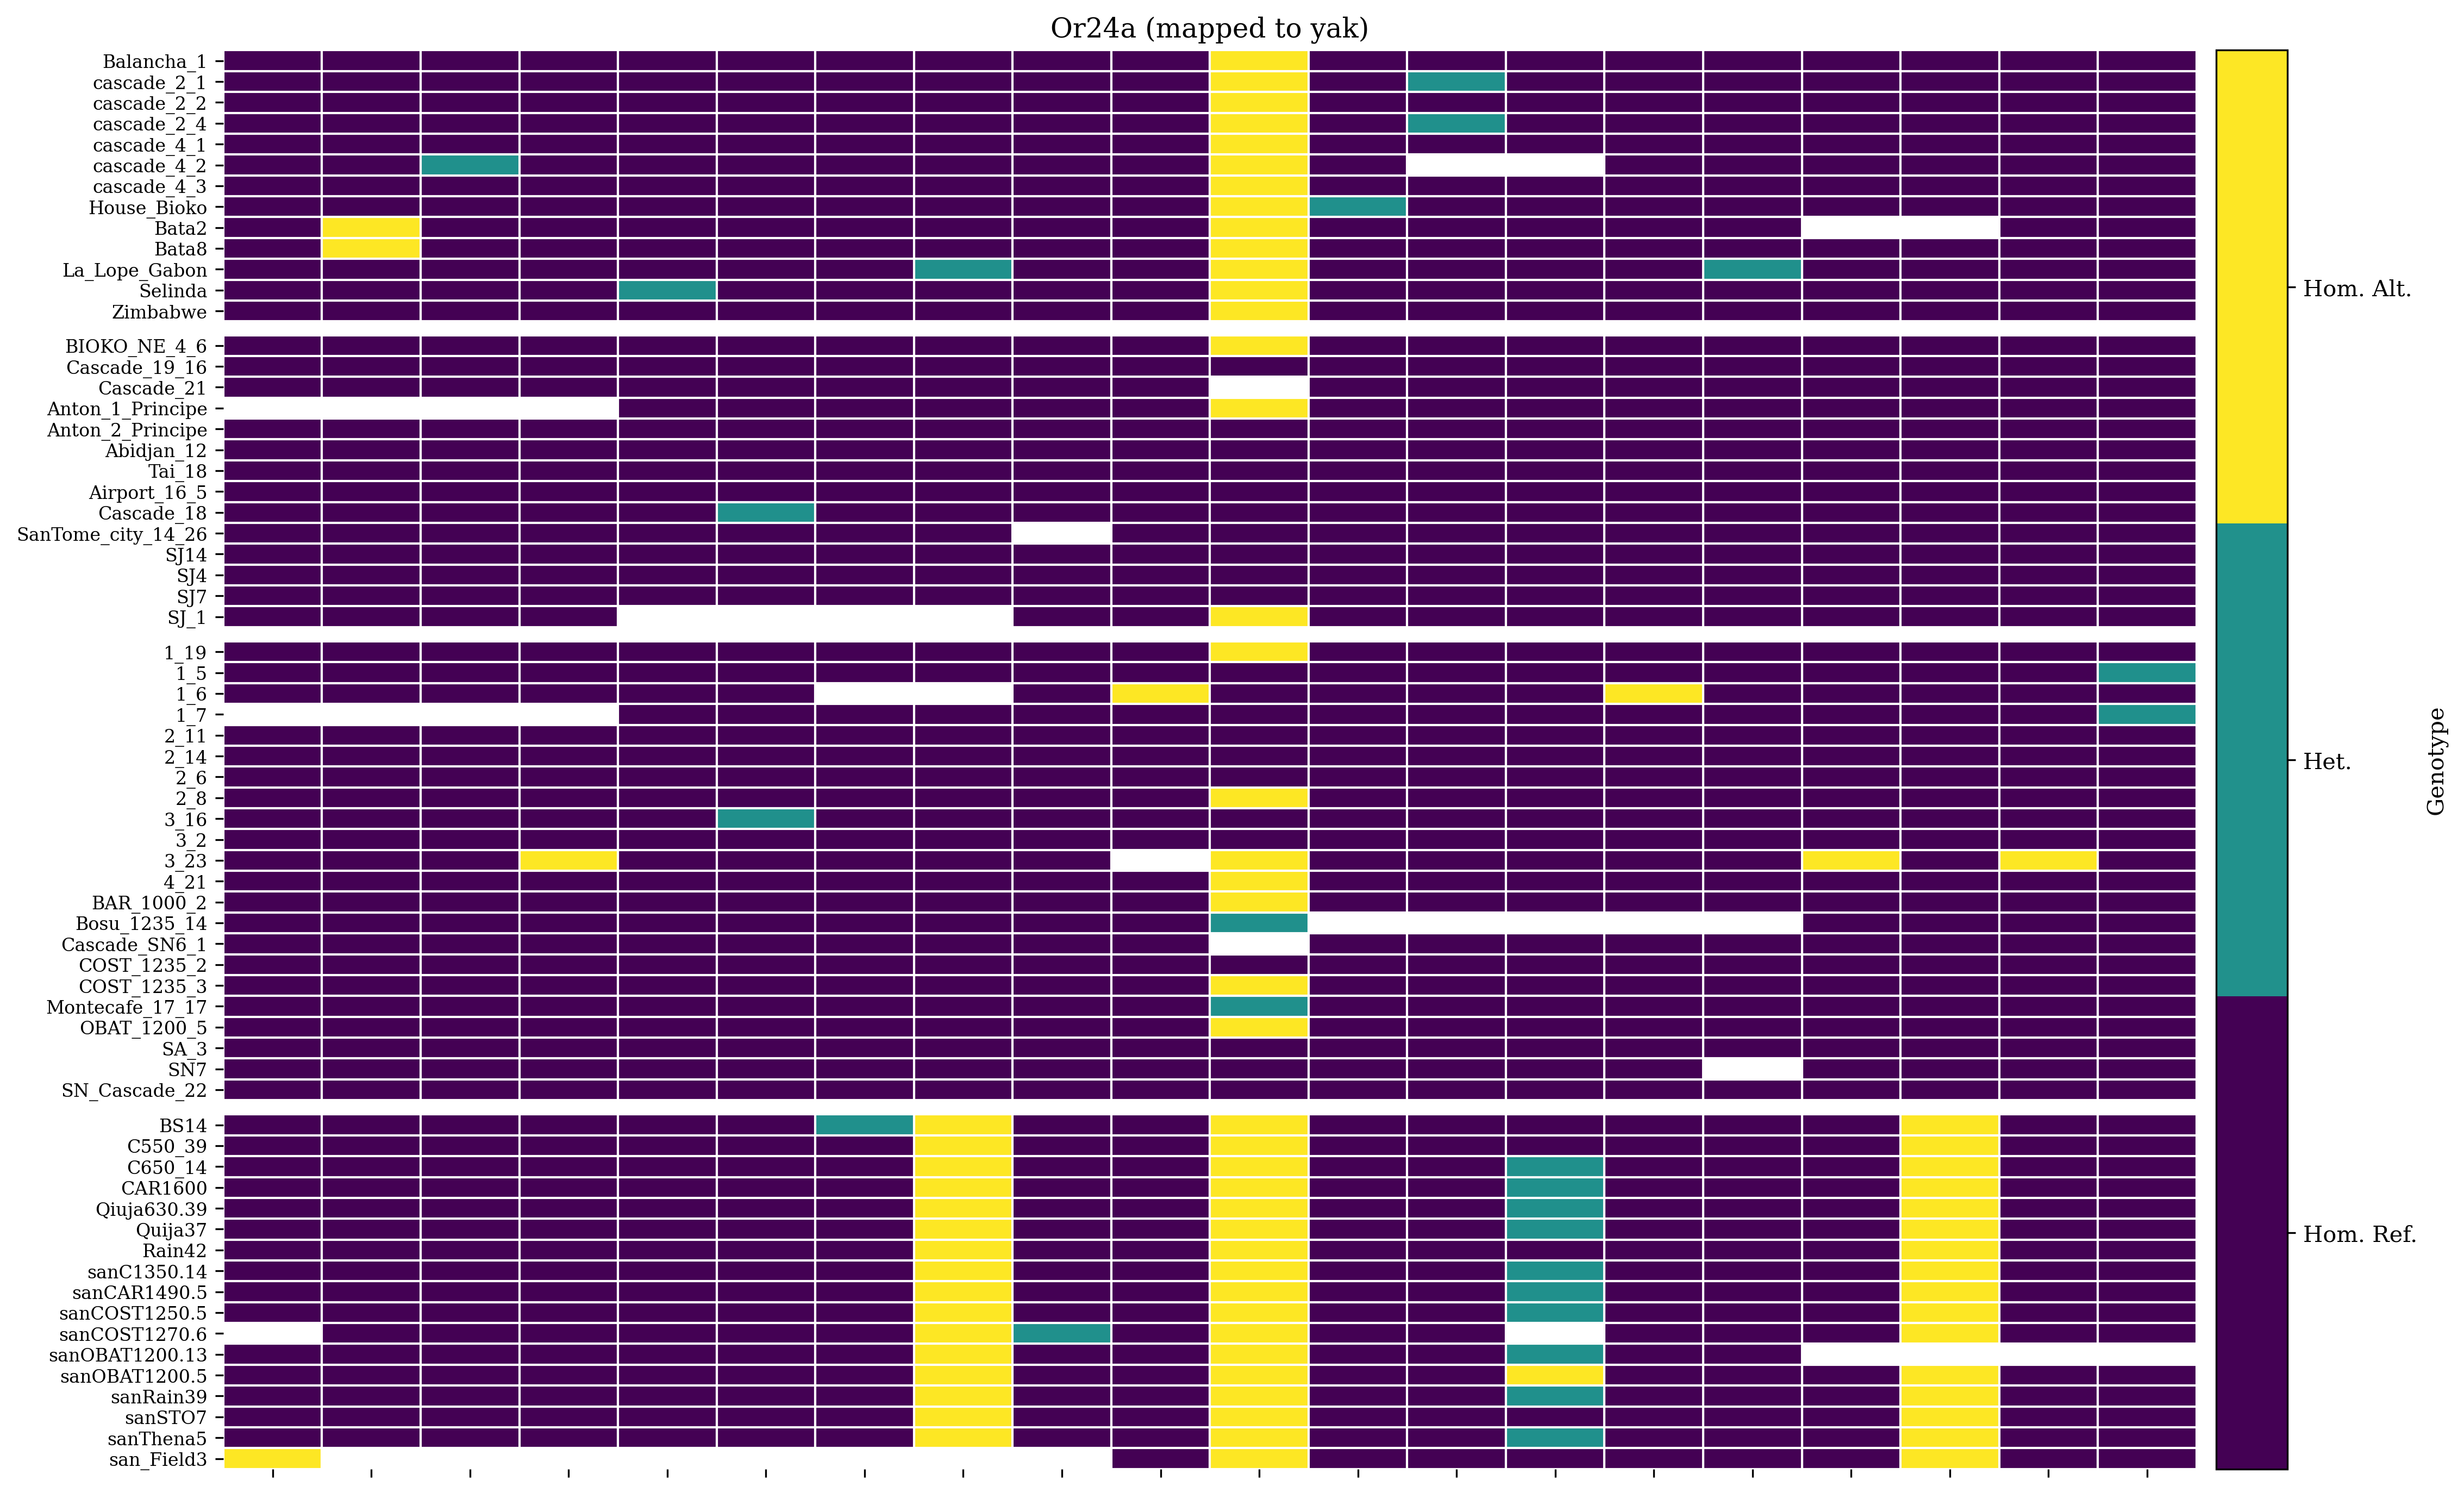

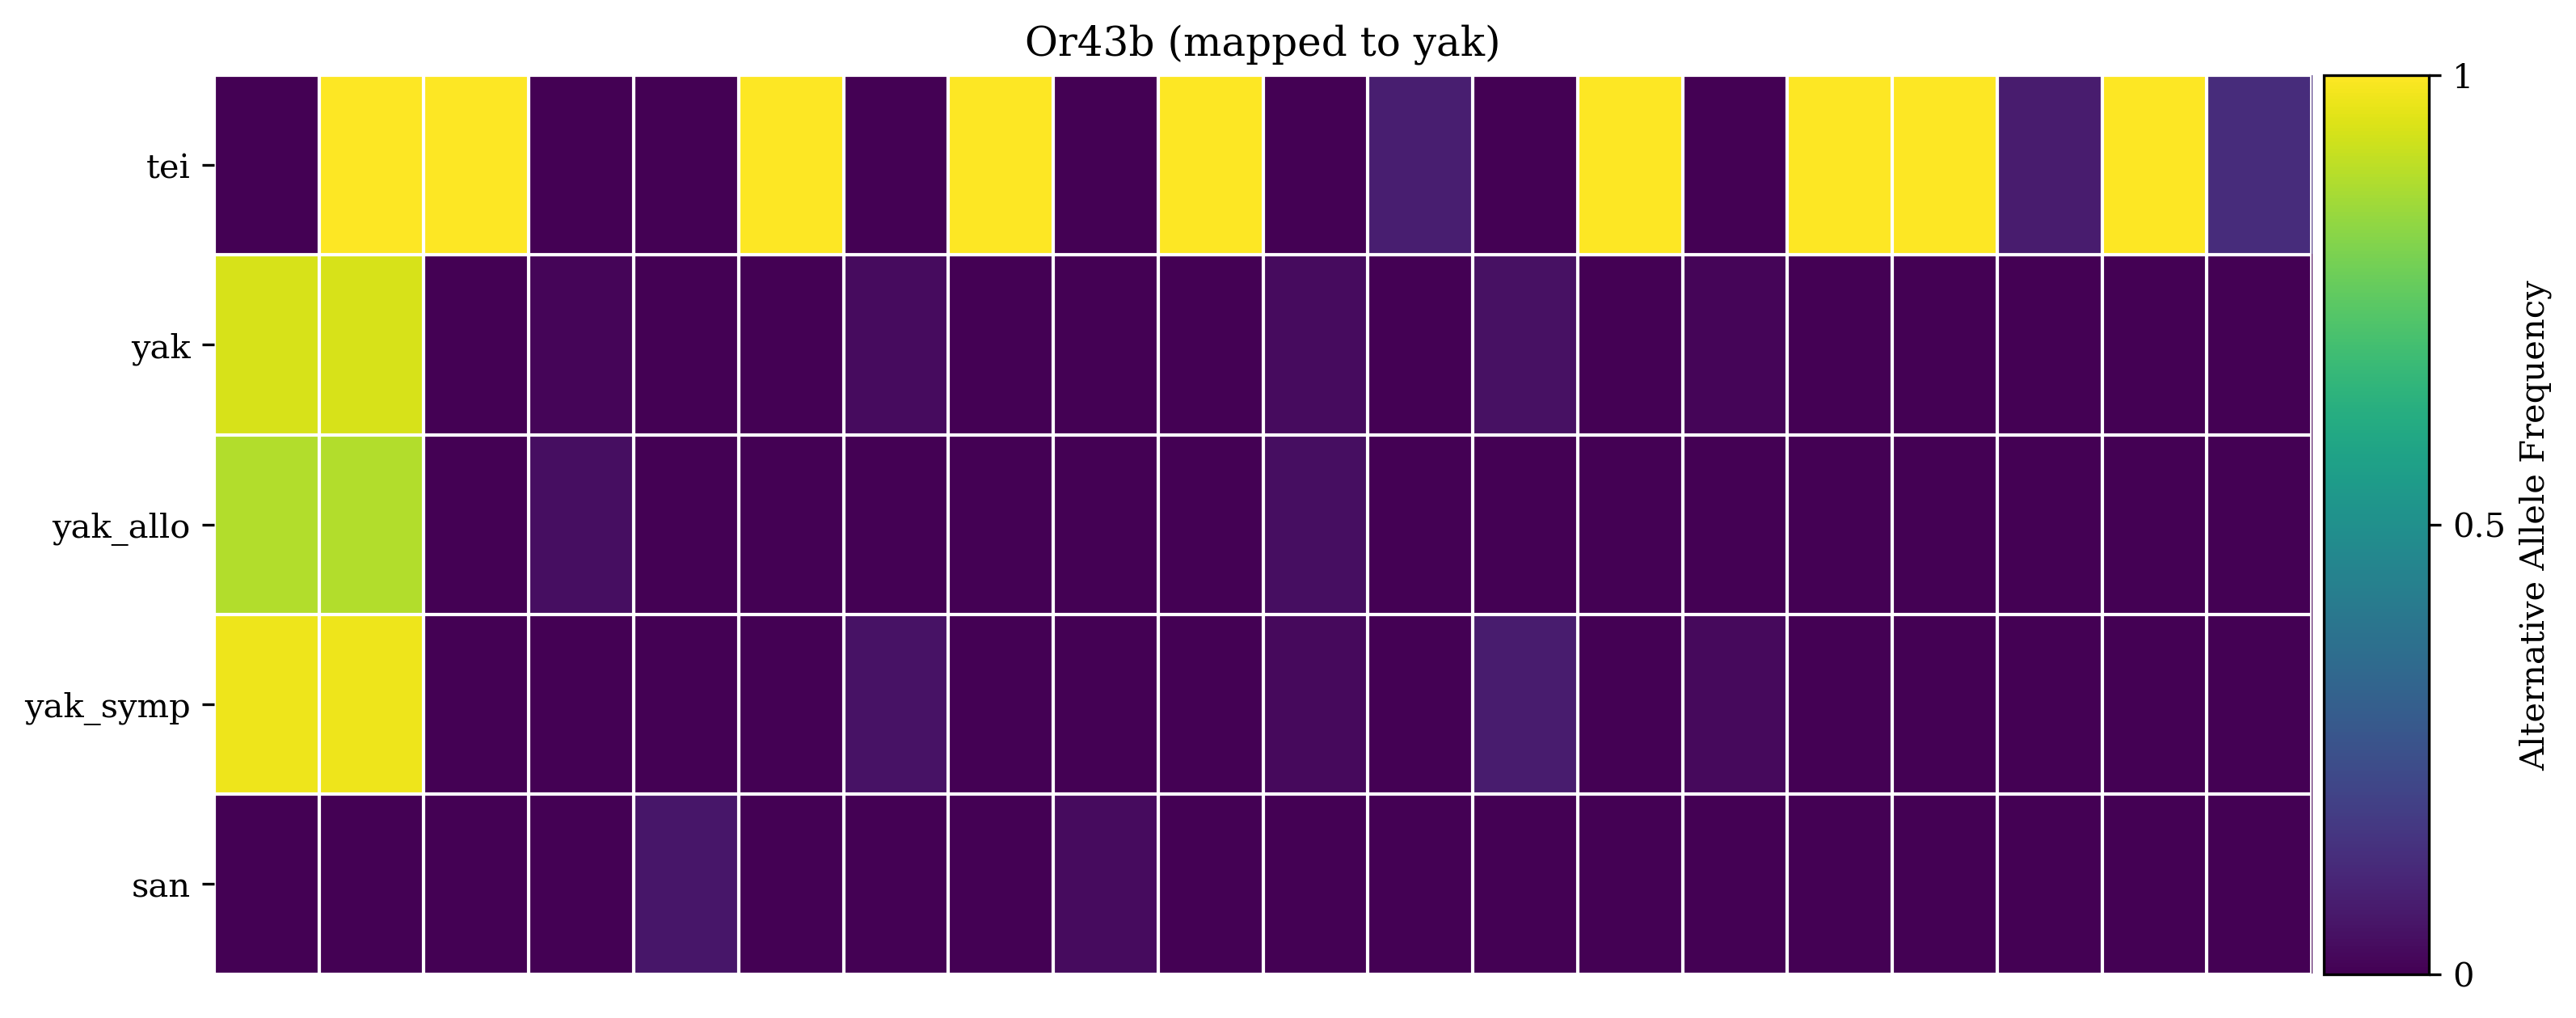

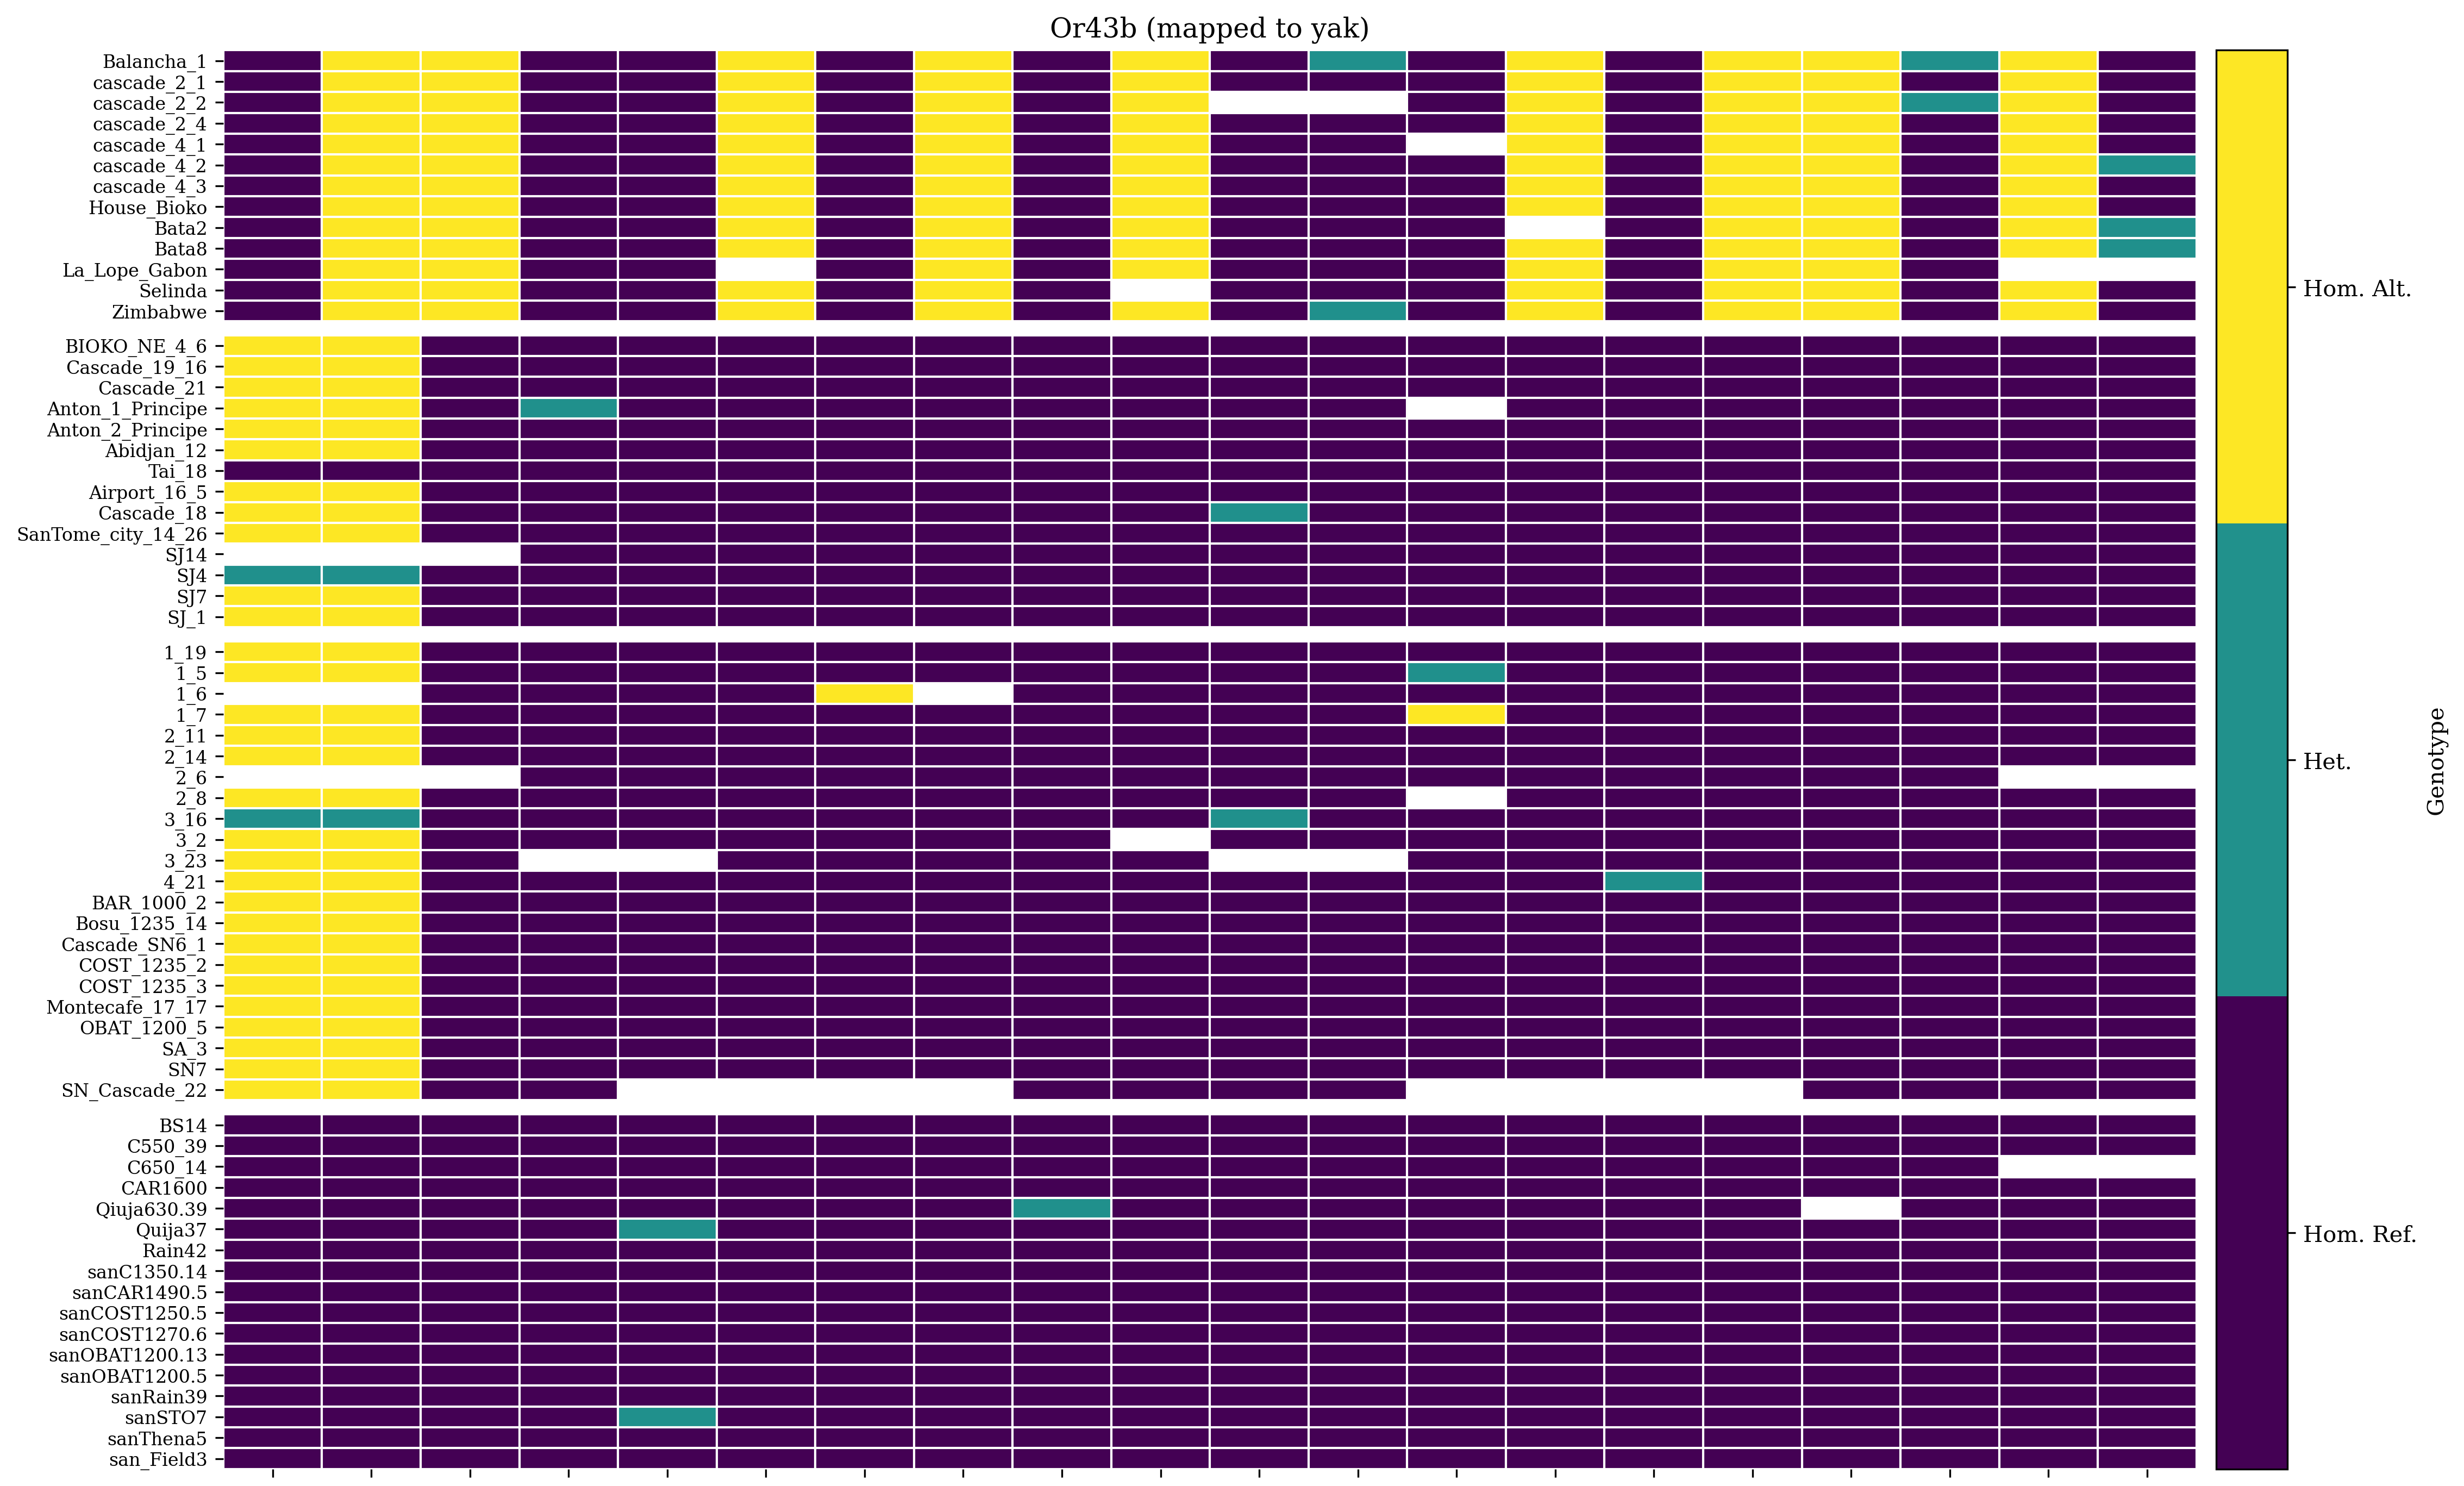

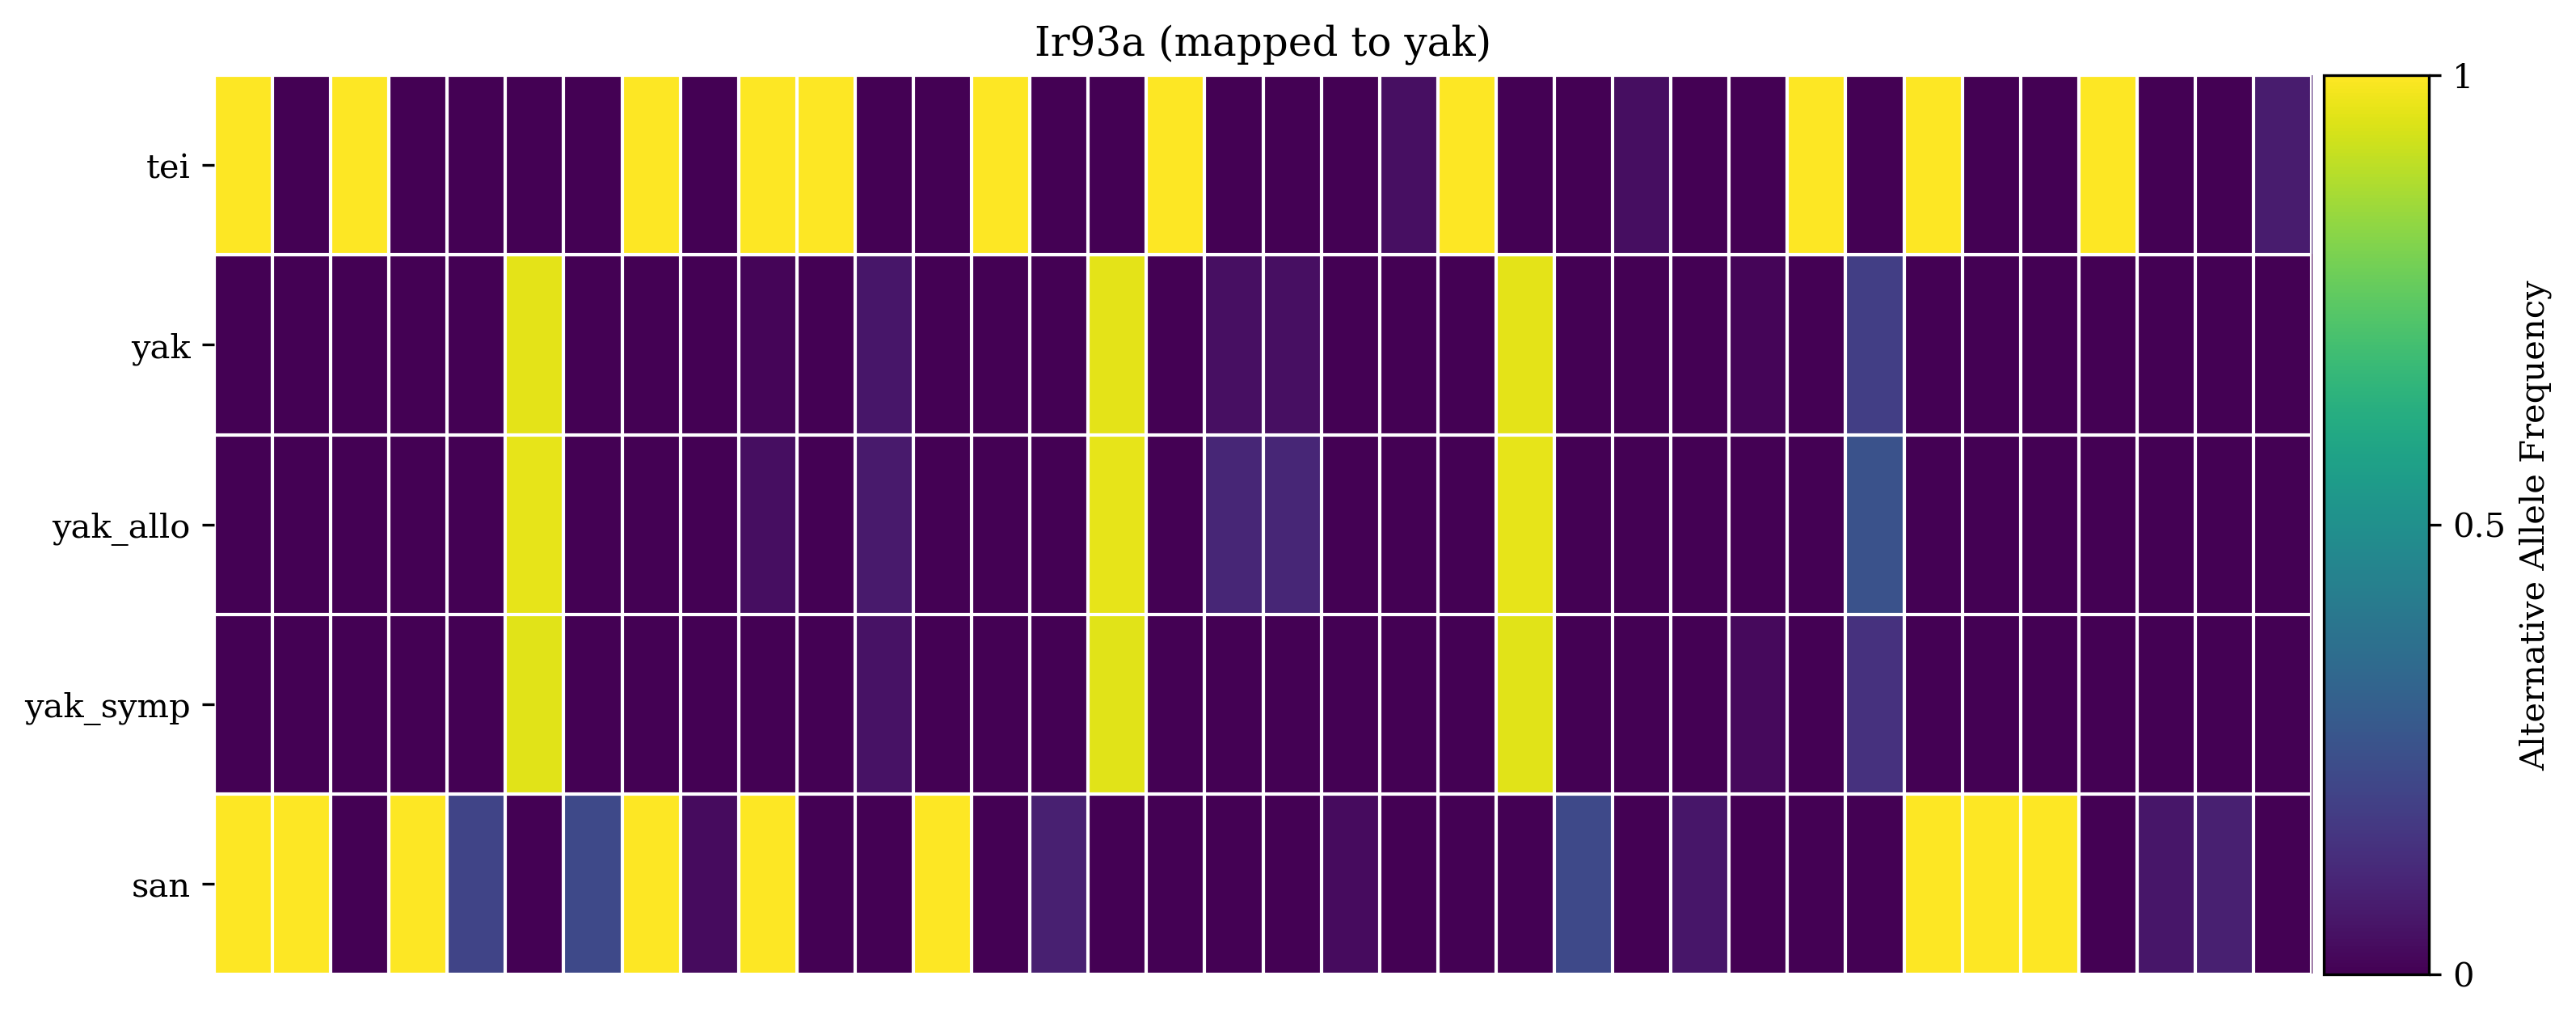

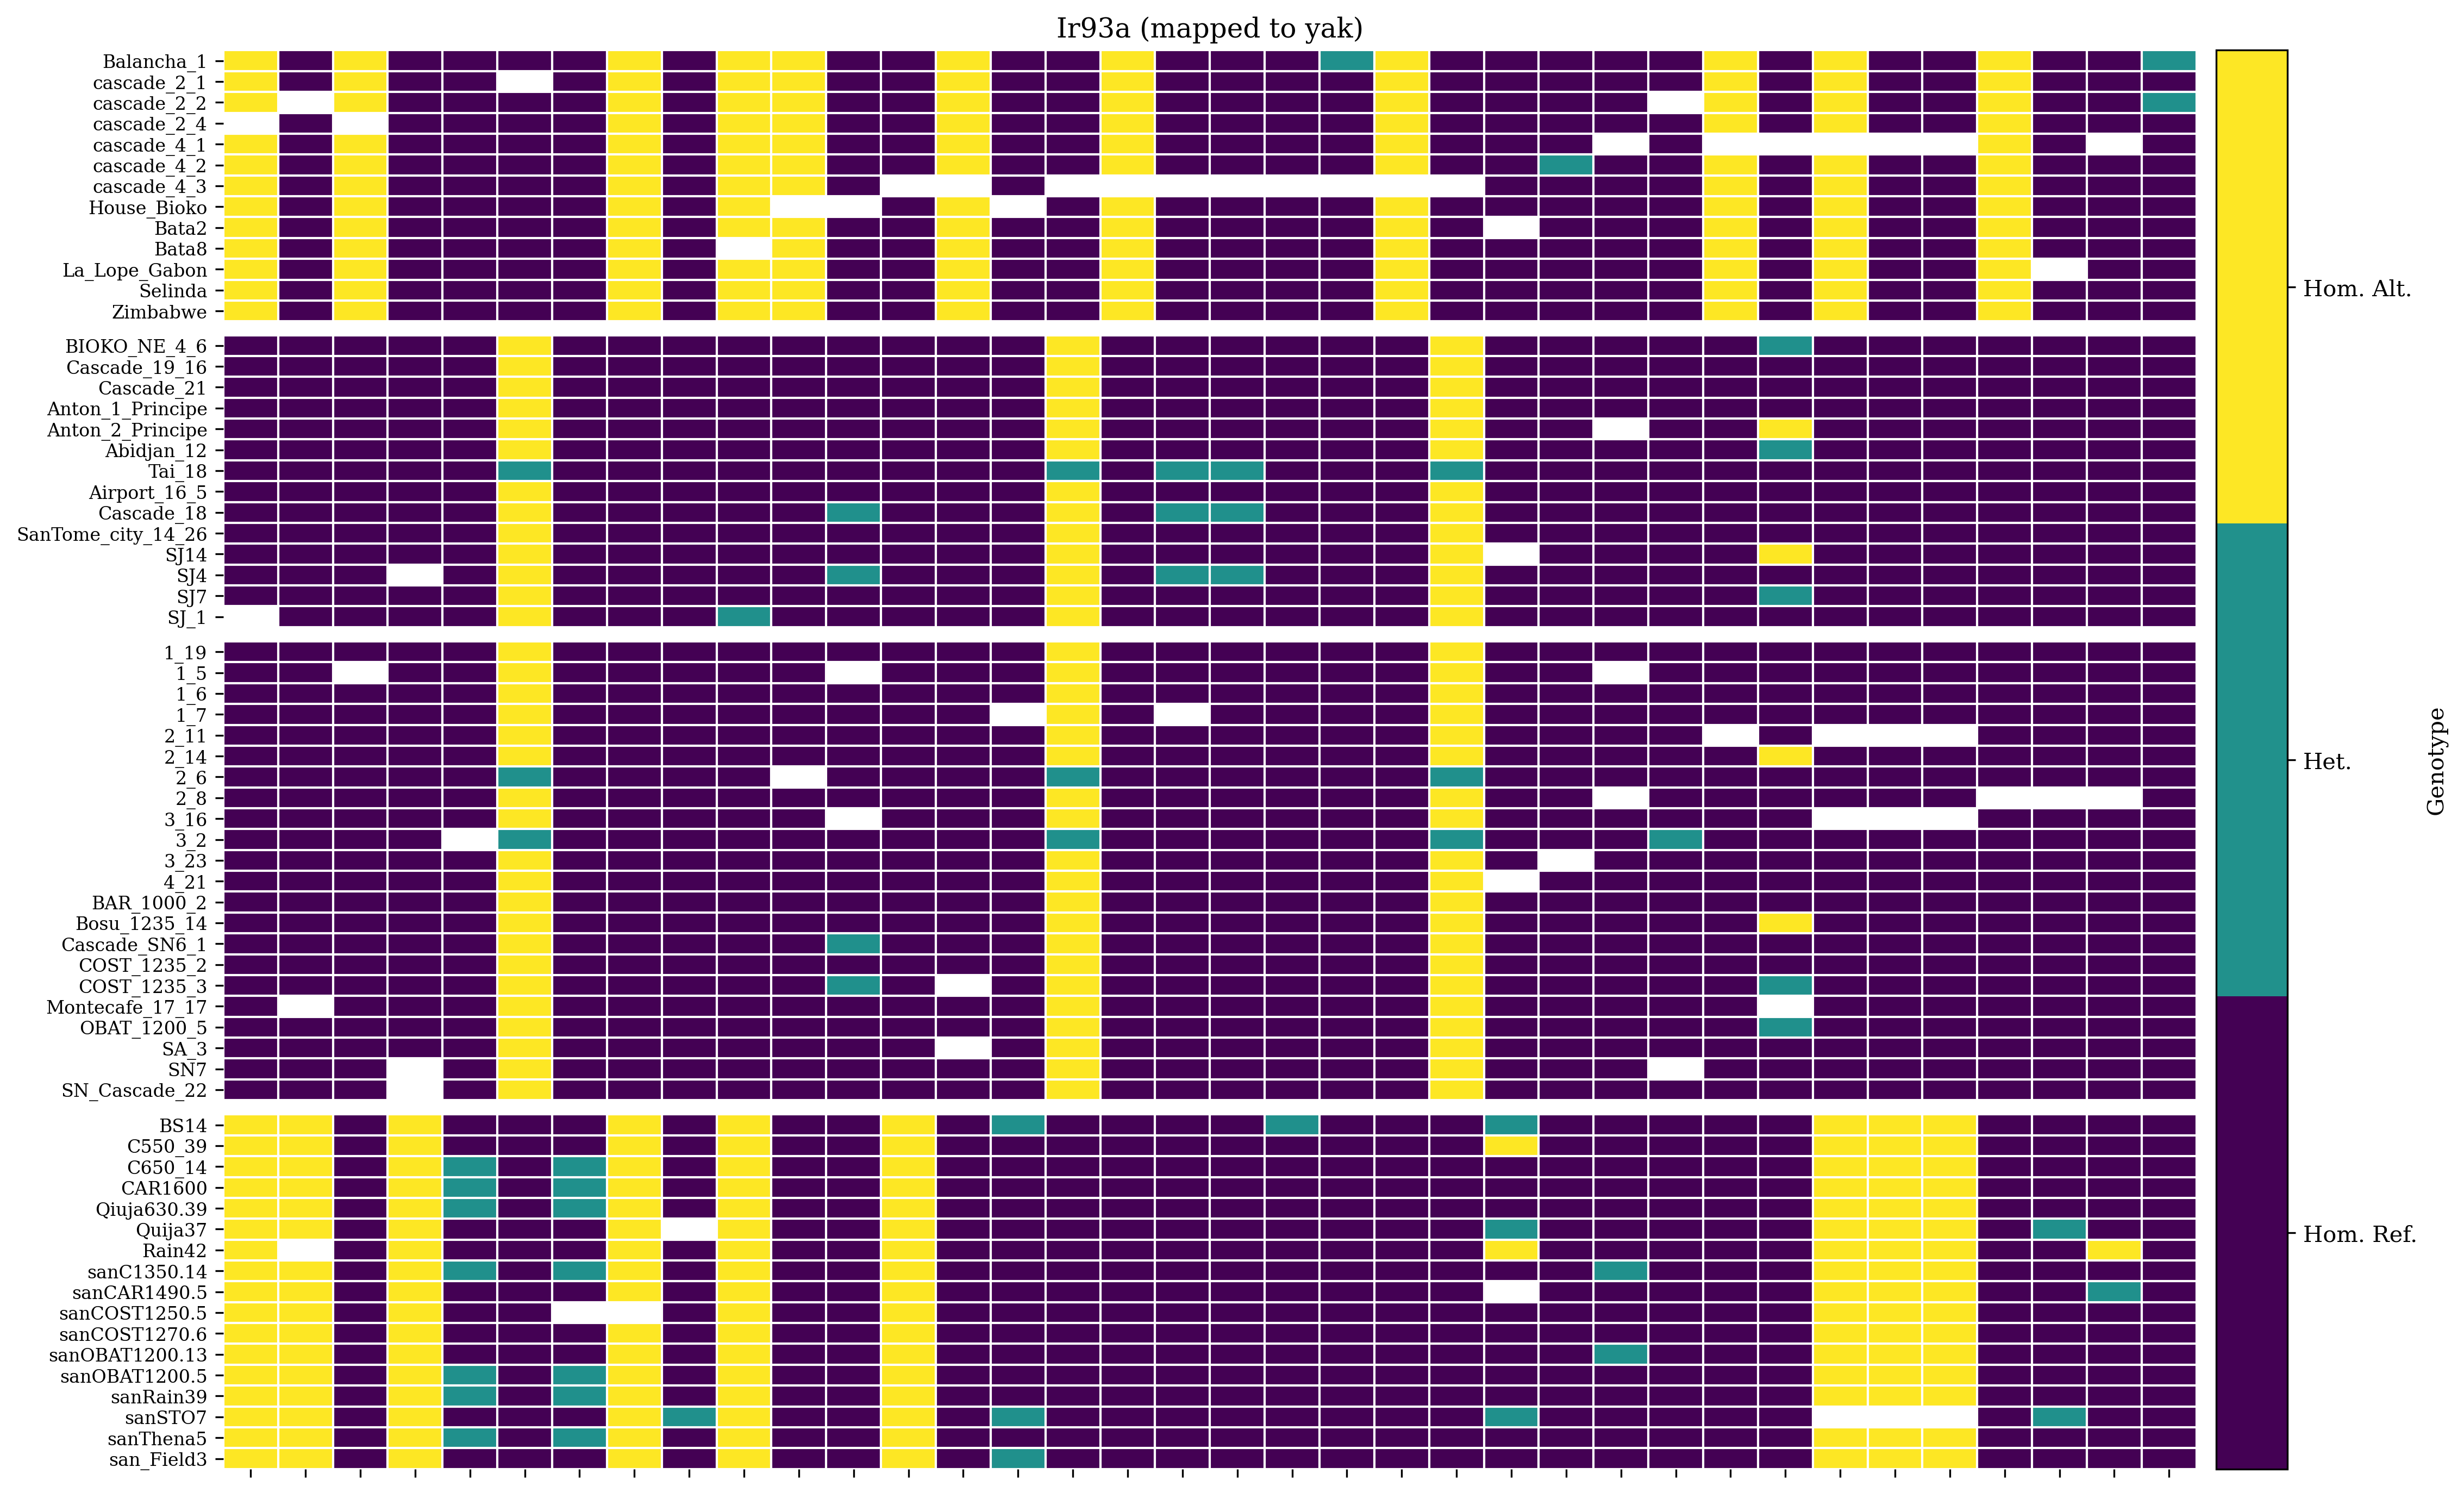

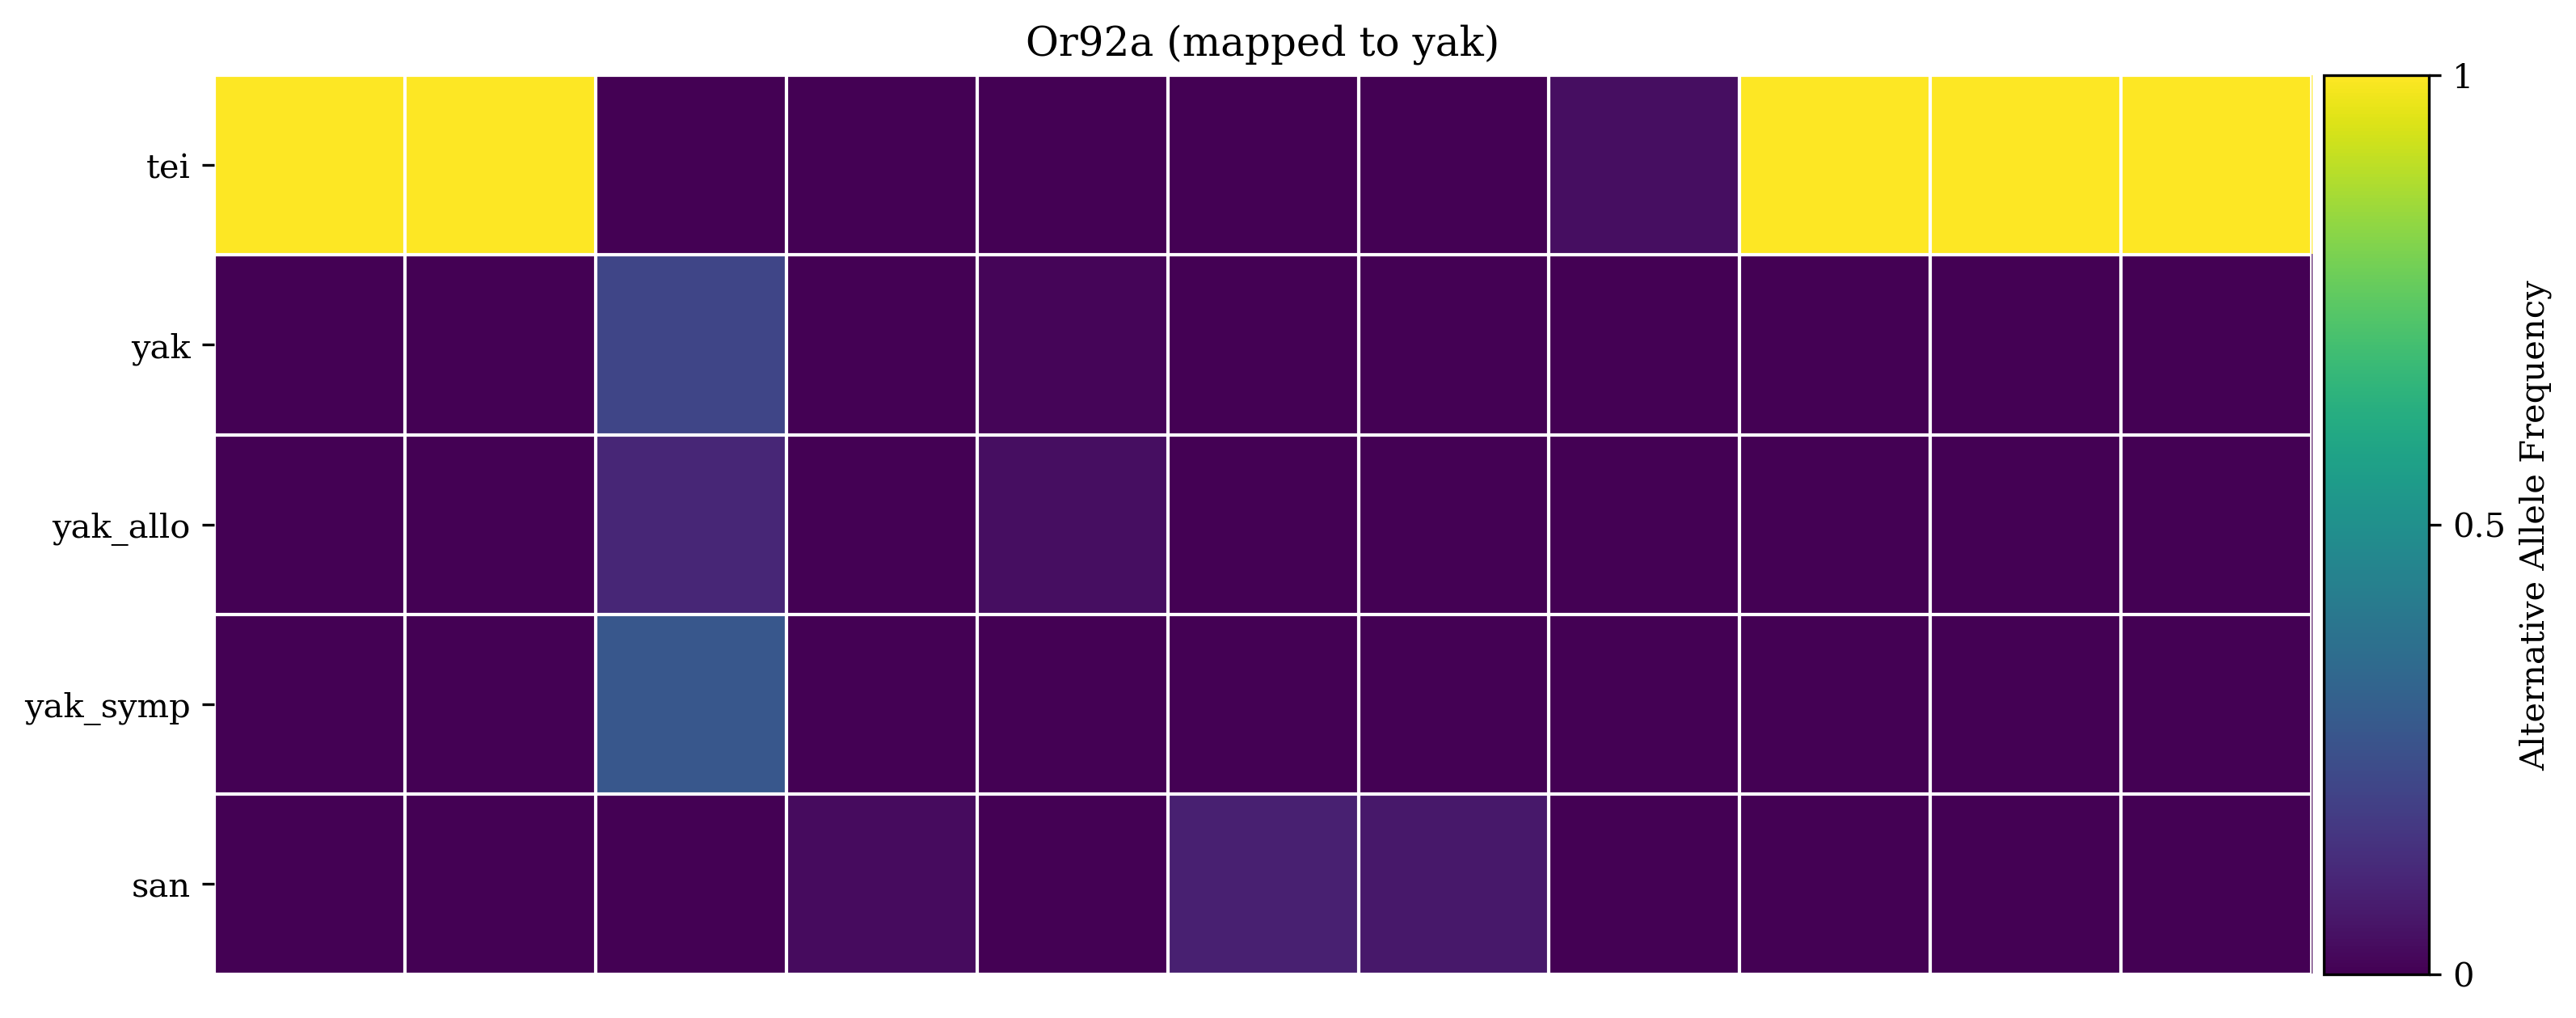

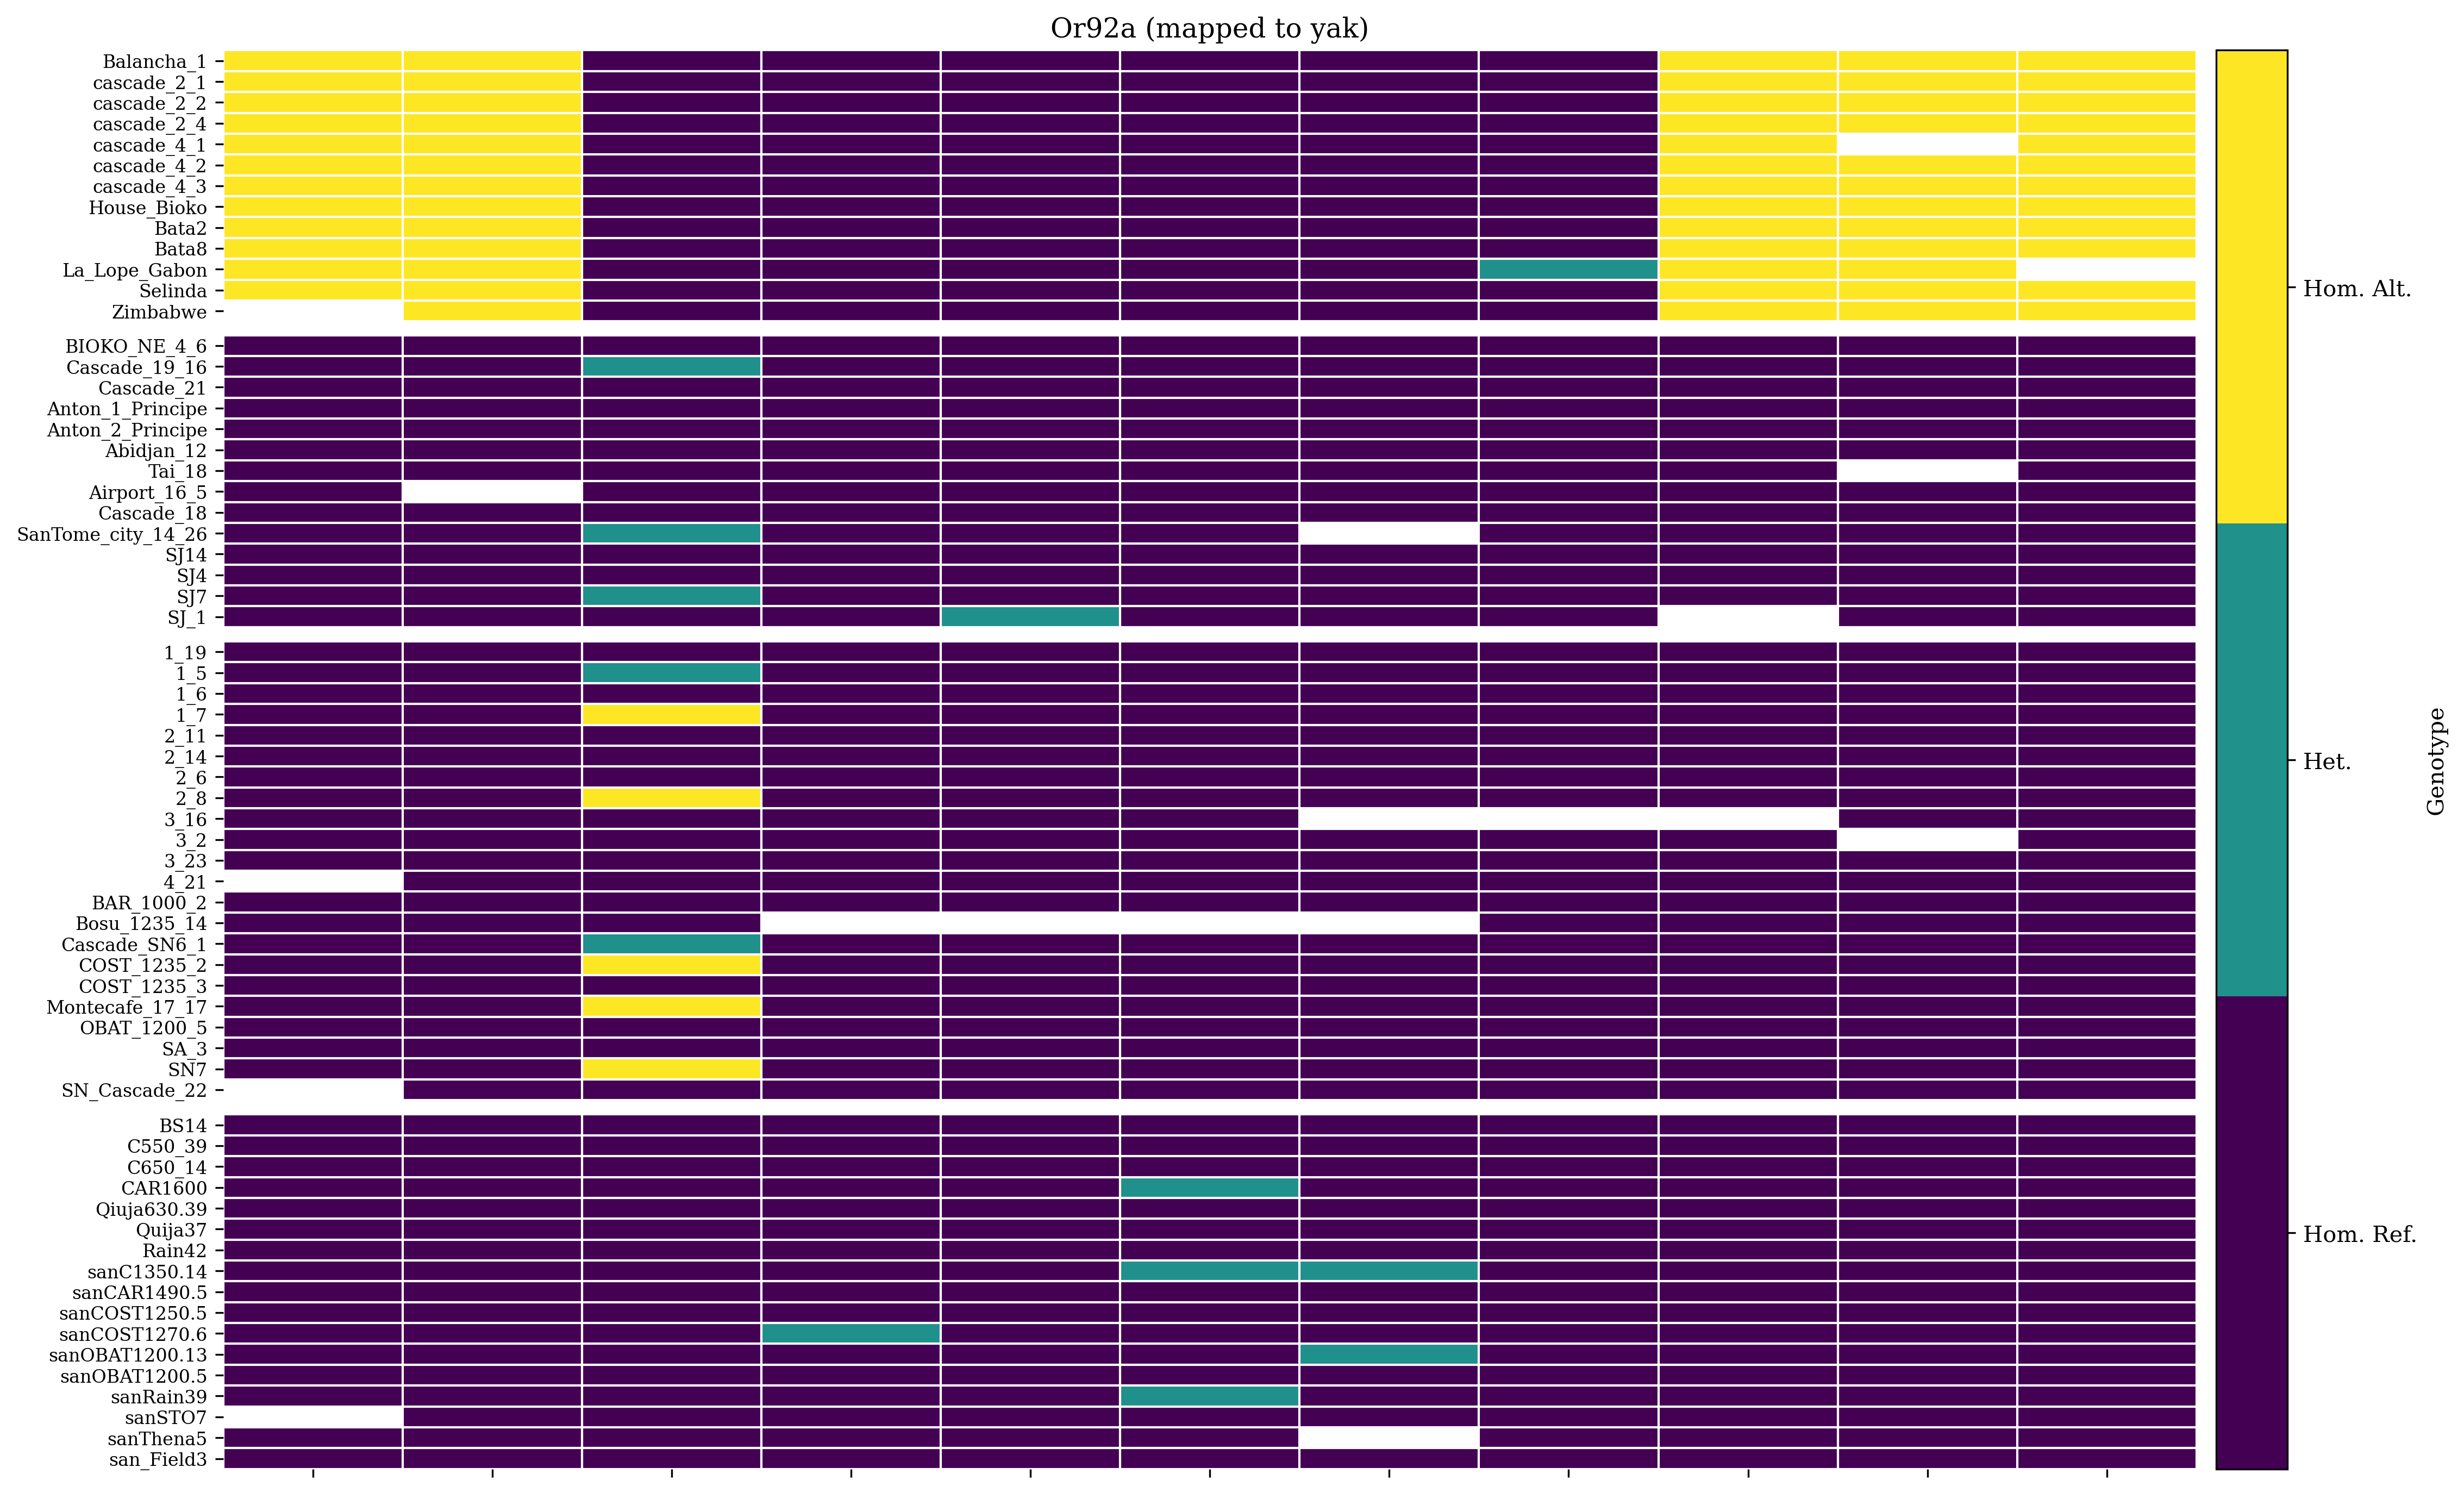

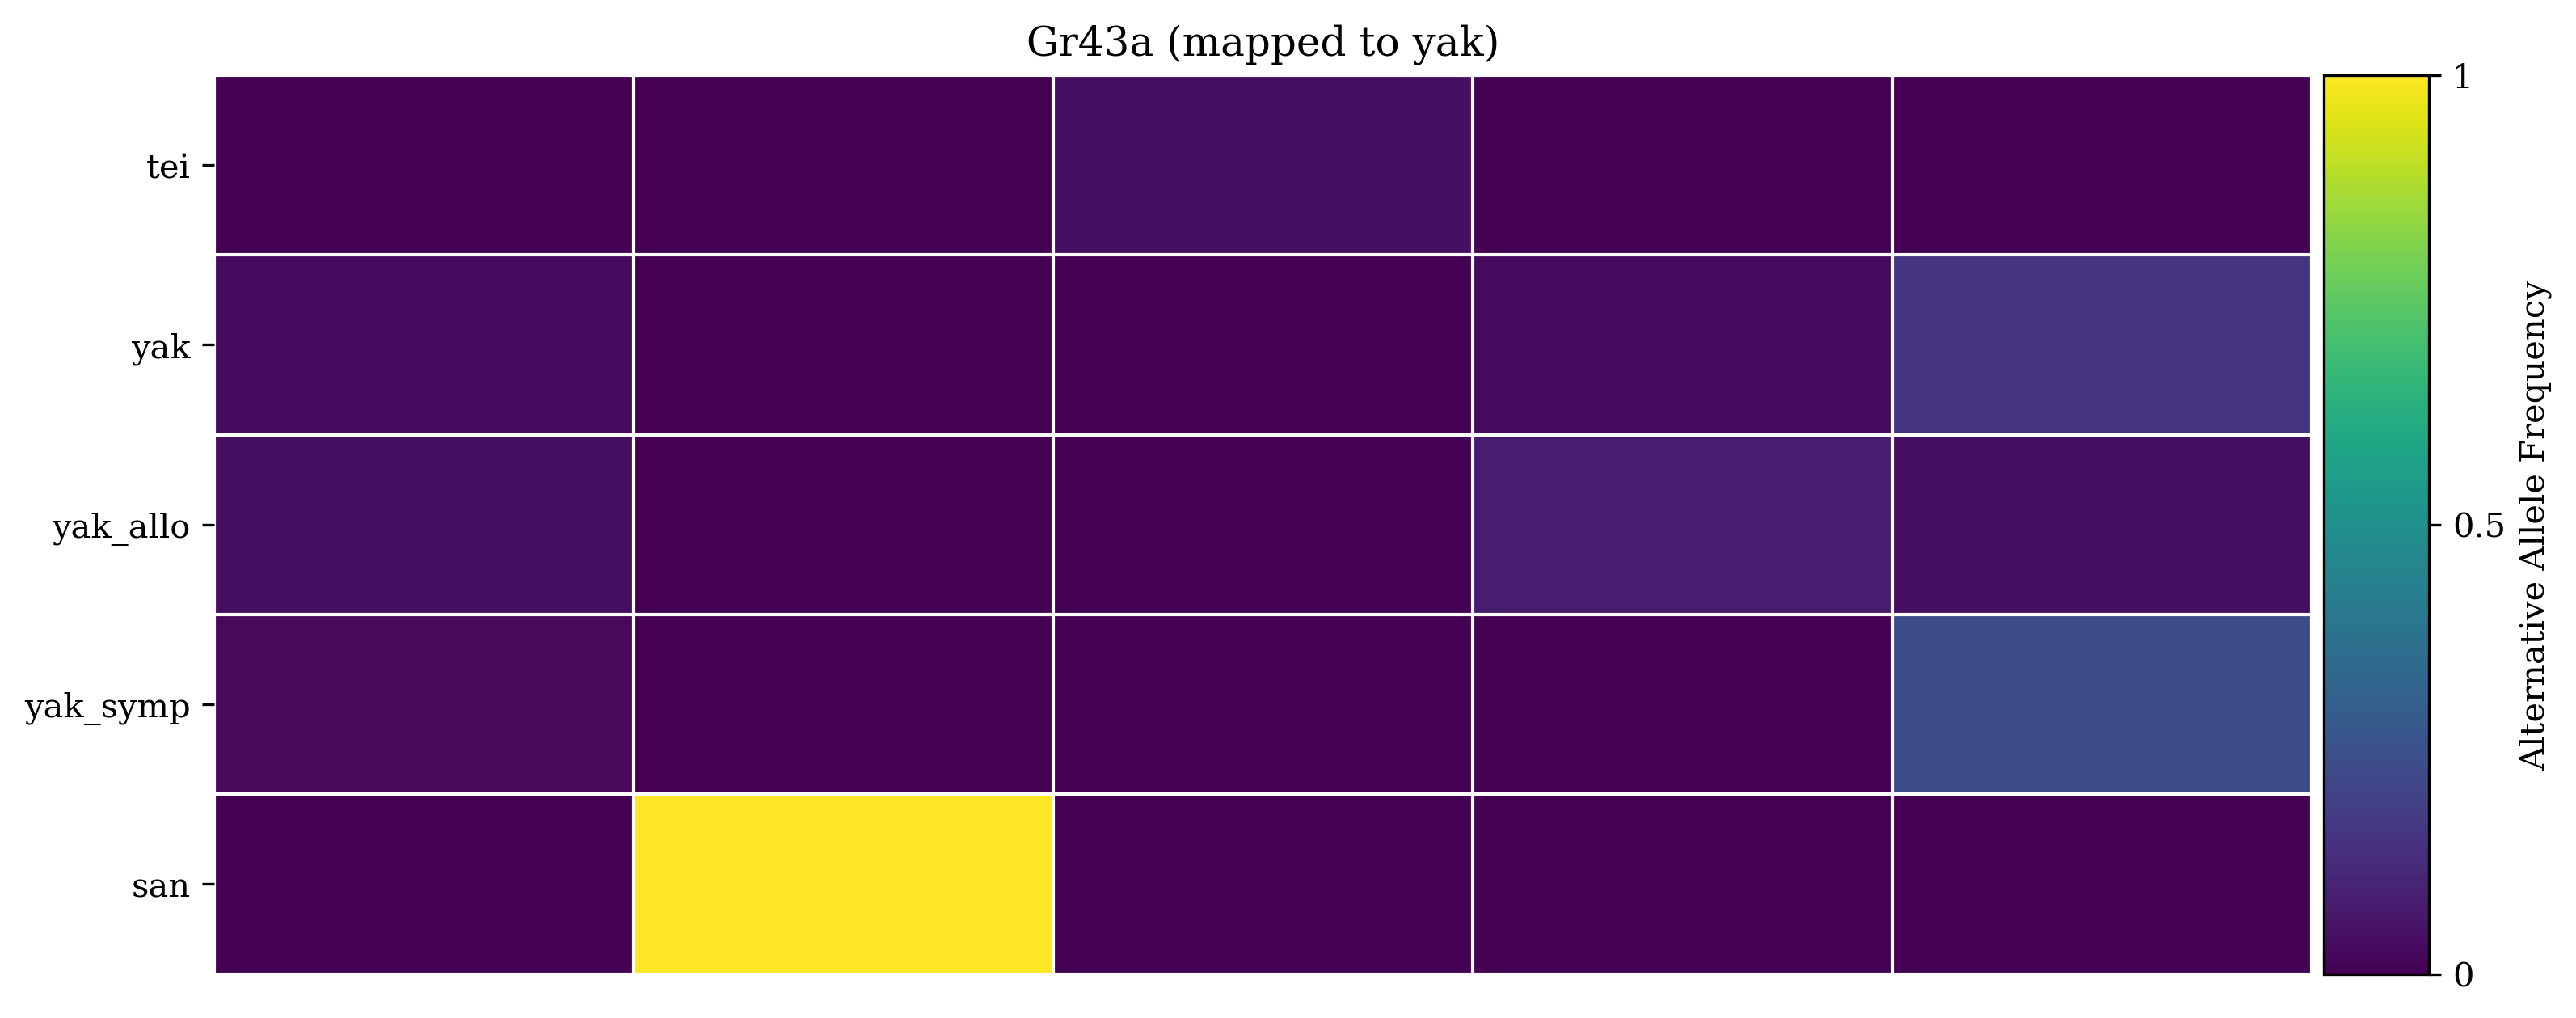

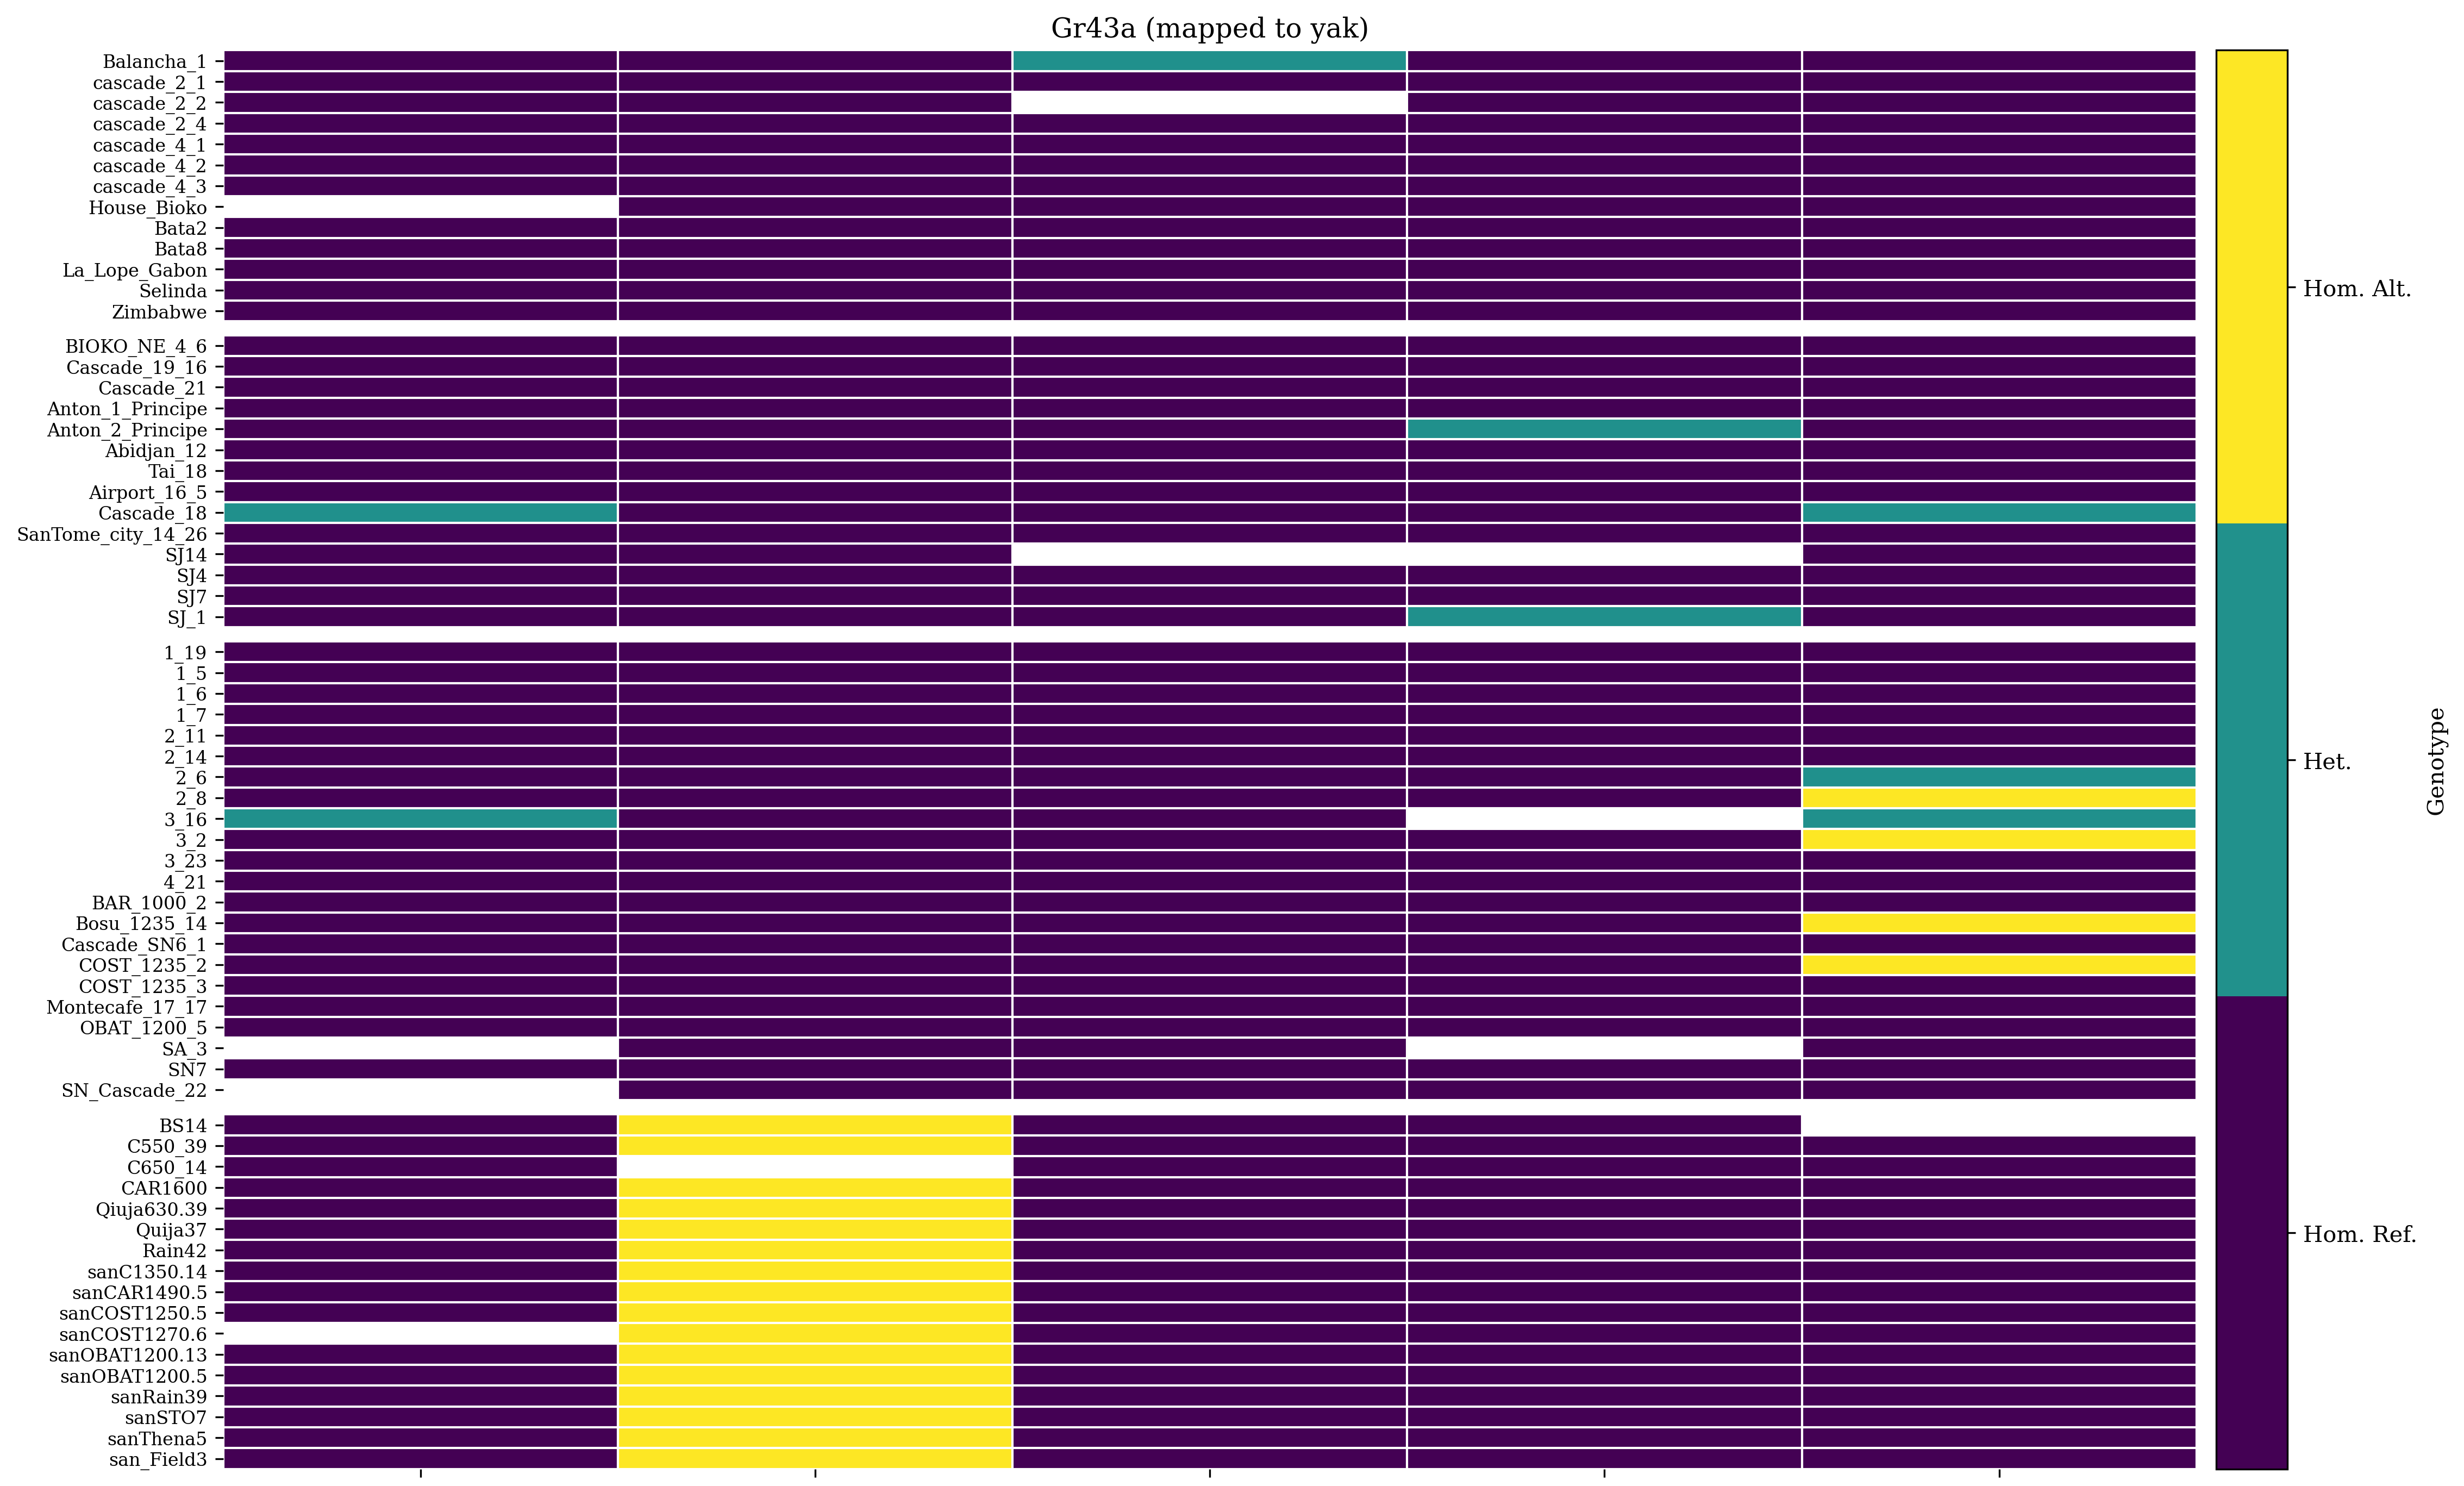

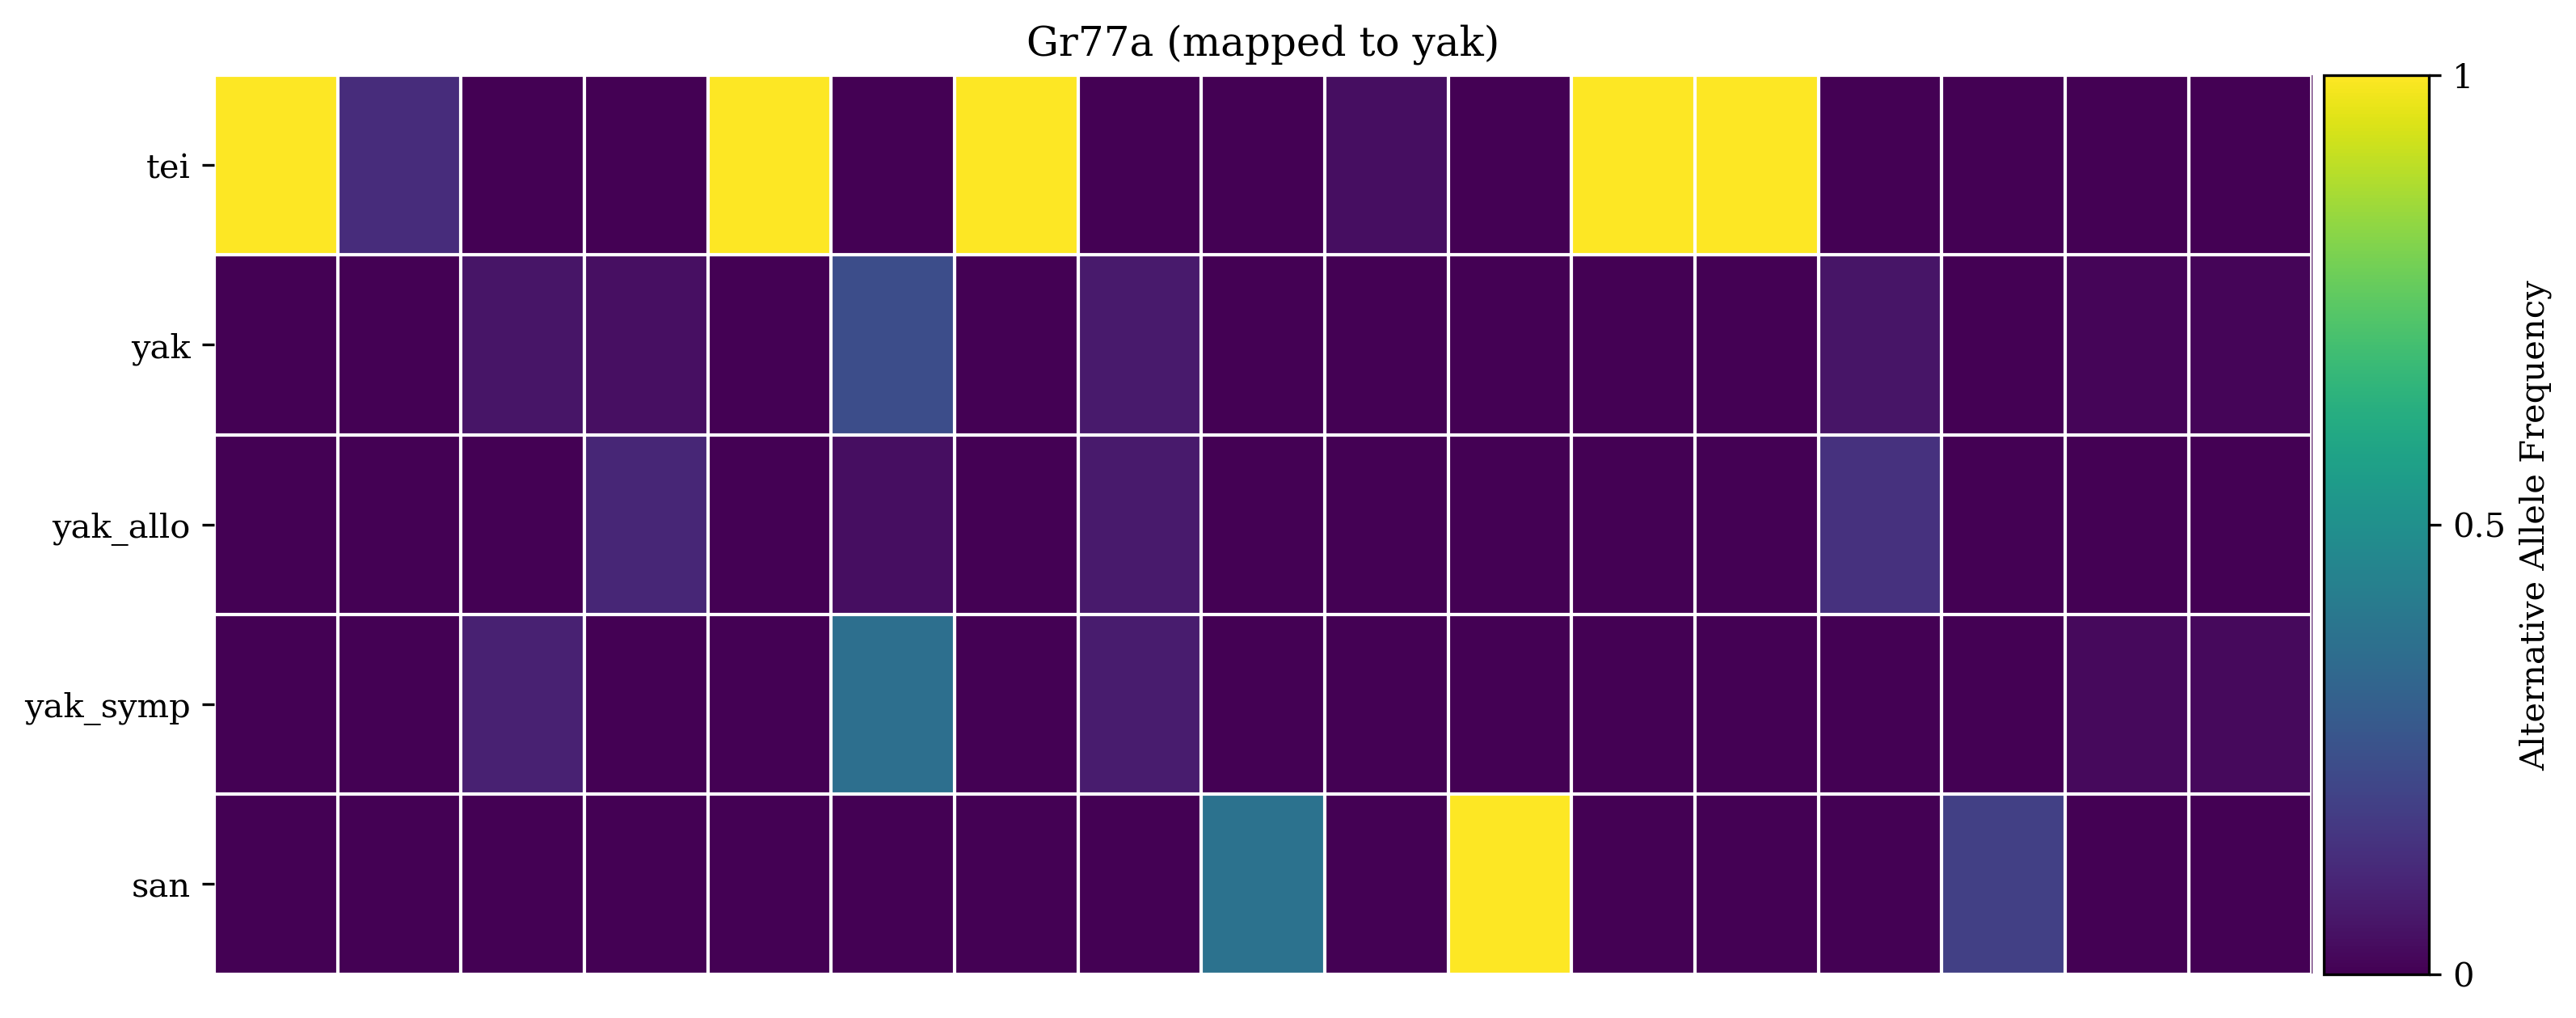

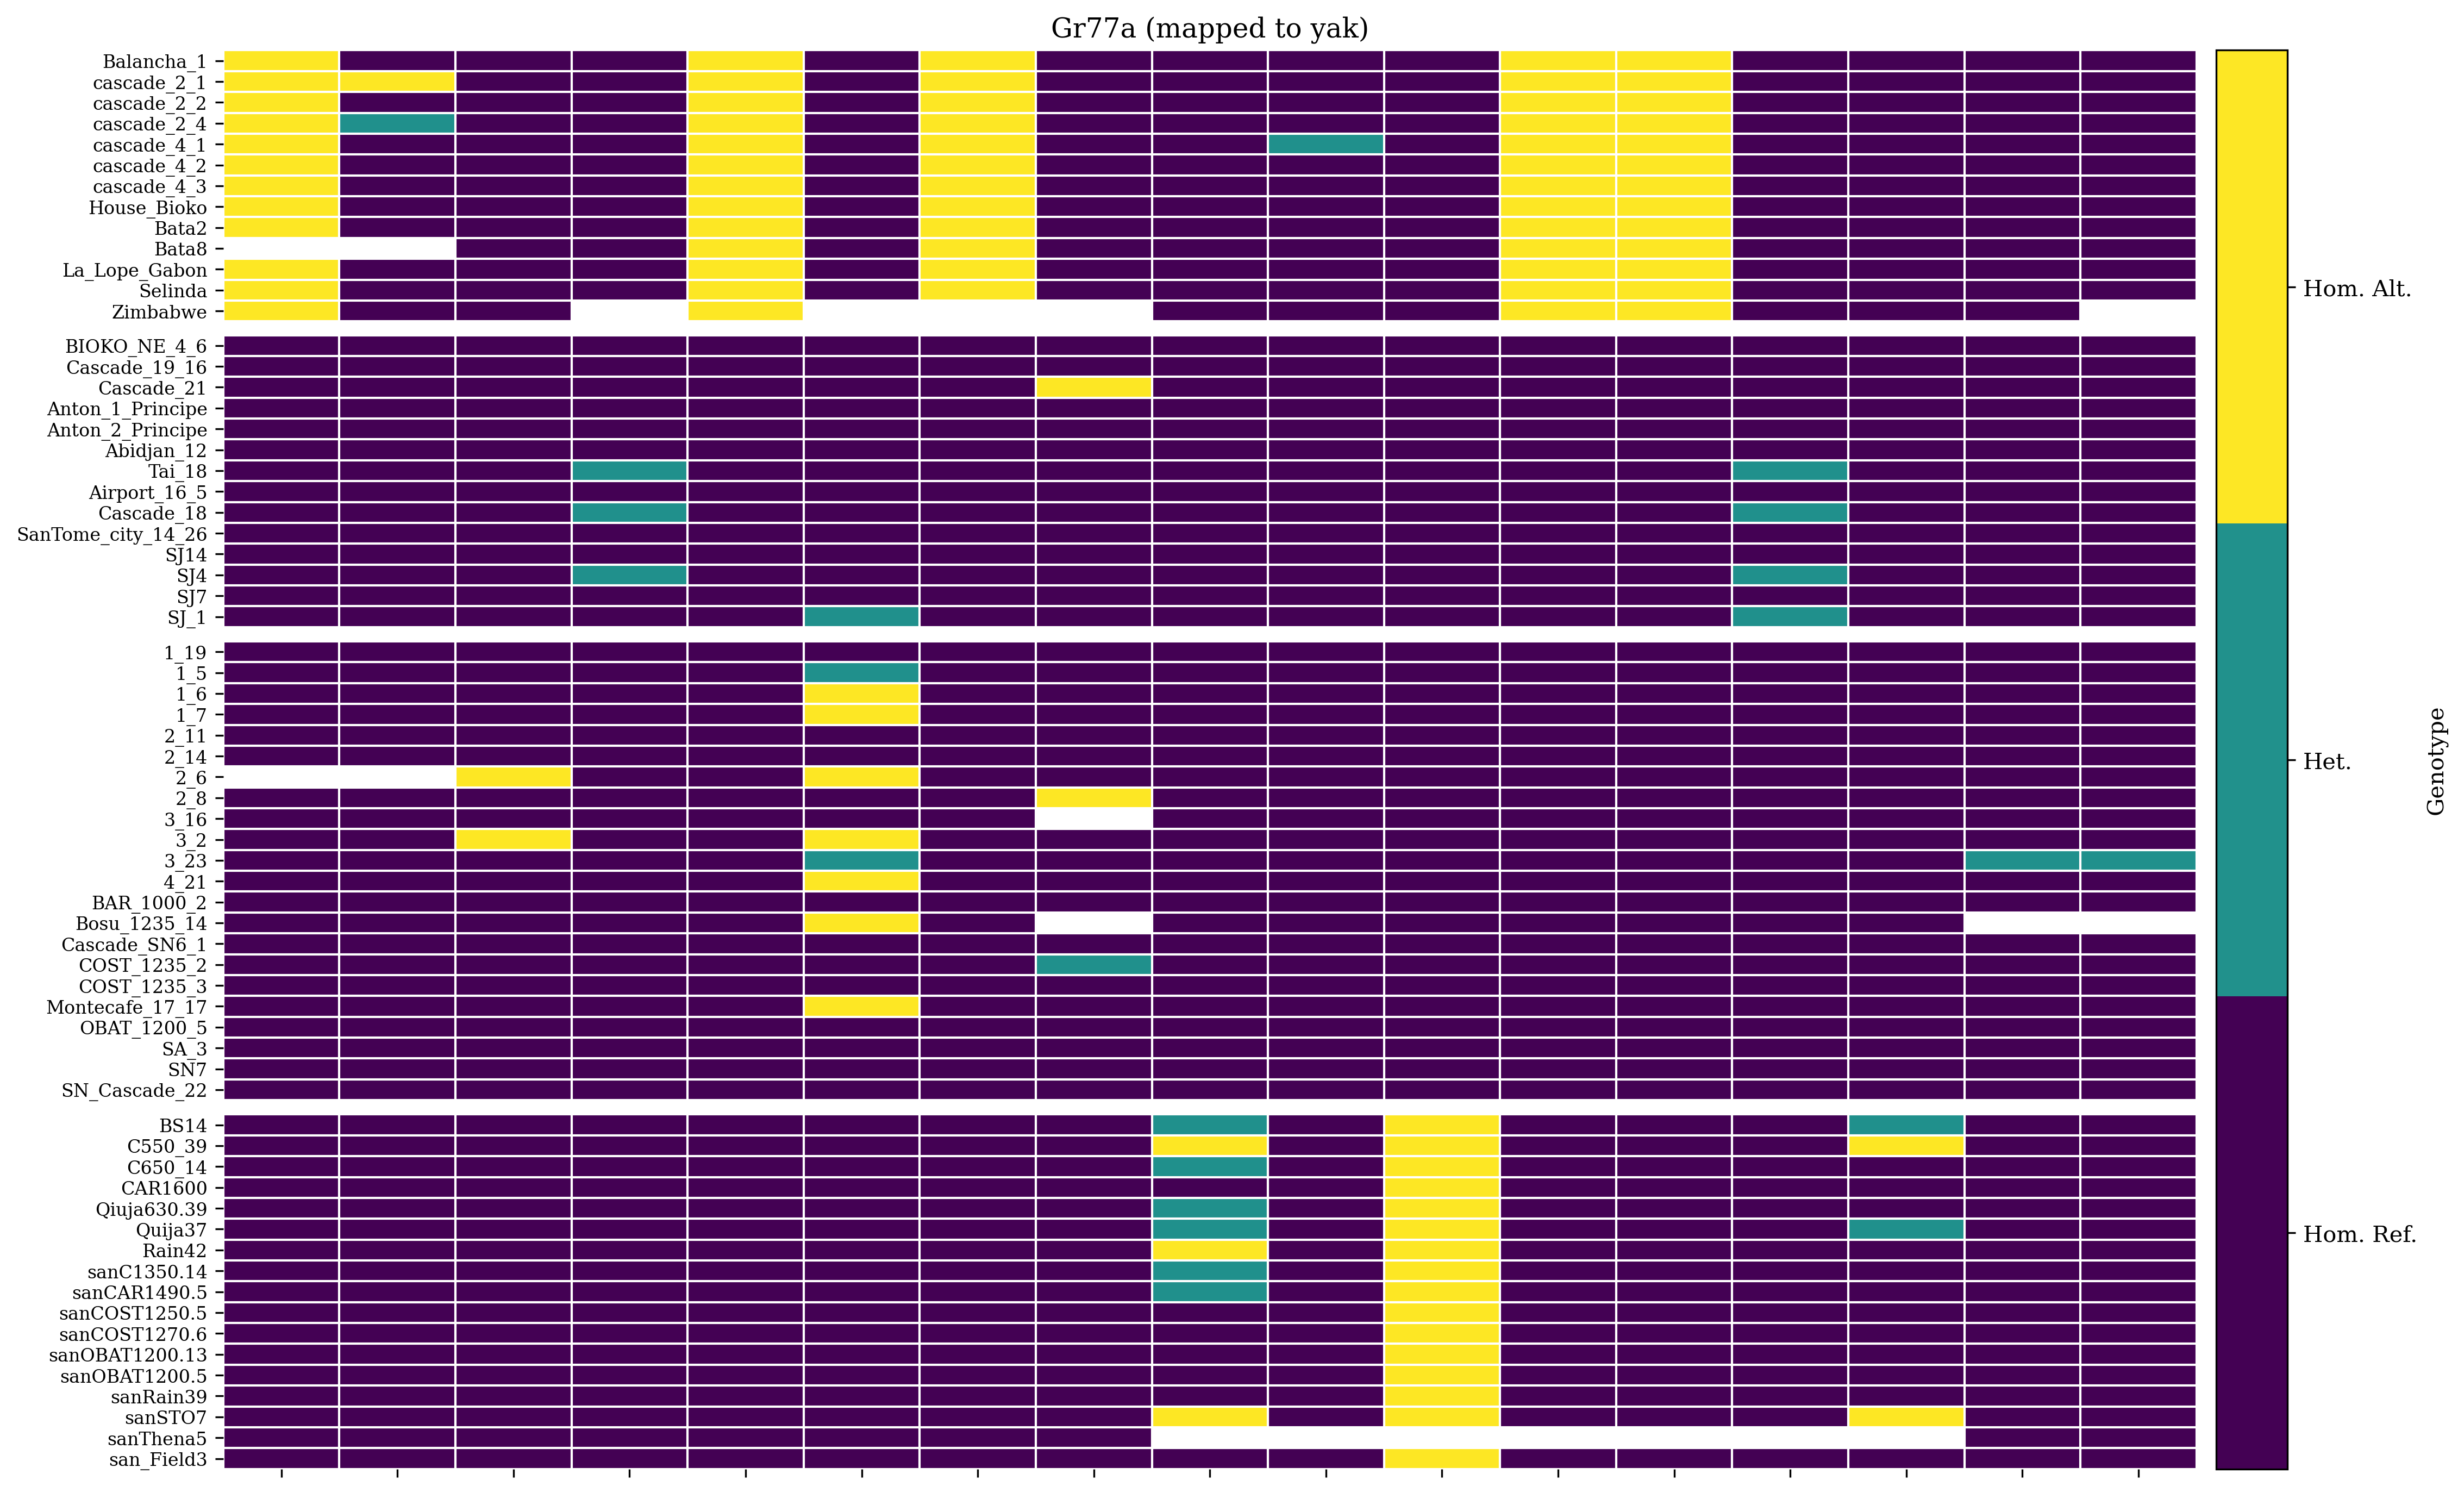

In [19]:
# For every canidate gene...
for can in can_genes:
    # Plot the results.
    plot_can_genes(can, 'yak', cans_map_yak_dicc)